<a href="https://colab.research.google.com/github/Wan0213/CE5001-Building-Lane-changing-Model-in-the-Weaving-Section-Through-Machine-Learning/blob/main/Joint_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:

#load the pre processed data
#LC_gap_LK = [DV1 DV2 DV3 Vlc G1 G2 G3 Dend LC_id_LK label_targetlane]
#LC_gap_LK = [0   1  2  3 4  5 6  7    8    9    ]
from google.colab import files
uploaded = files.upload()



Saving GapSimLKLCrandsmall_20.csv to GapSimLKLCrandsmall_20.csv
Saving GapSimLKLCrandsmall_20_10.csv to GapSimLKLCrandsmall_20_10.csv
Saving GapSimLKLCrandsmall_20_20.csv to GapSimLKLCrandsmall_20_20.csv
Saving GapSimLKLCrandsmall_20_30.csv to GapSimLKLCrandsmall_20_30.csv
Saving GapSimLKLCrandsmall_20_40.csv to GapSimLKLCrandsmall_20_40.csv
Saving GapSimLKLCrandsmall_20_60.csv to GapSimLKLCrandsmall_20_60.csv
Saving GapSimLKLCrandsmall_20_80.csv to GapSimLKLCrandsmall_20_80.csv
Saving GapSimLKLCrandsmall_20_90.csv to GapSimLKLCrandsmall_20_90.csv


In [ ]:
import torch.nn as nn

class Wide(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(9, 180)
        self.relu = nn.ReLU()
        self.output = nn.Linear(180, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

In [ ]:

class Deep(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(9, 60)
        self.act1 = nn.LeakyReLU()
        self.layer2 = nn.Linear(60, 60)
        self.act2 = nn.LeakyReLU()
        self.layer3 = nn.Linear(60, 60)
        self.act3 = nn.LeakyReLU()
        self.output = nn.Linear(60, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.act3(self.layer3(x))
        x = self.sigmoid(self.output(x))
        return x

In [ ]:

class Deep1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(9, 60)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(60, 60)
        self.act2 = nn.ReLU()
        self.layer3 = nn.Linear(60, 60)
        self.act3 = nn.ReLU()
        self.output = nn.Linear(60, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.act3(self.layer3(x))
        x = self.sigmoid(self.output(x))
        return x

In [ ]:
import pandas as pd

# Read data
data = pd.read_csv("GapSimLKLCrandsmall_20_10.csv")
print(data)
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]
print(X)
print(y)

          DV1       DV2       DV3          V         G1         G2  \
0    0.338328  5.669280  0.231648  11.999976   5.961583  40.393315   
1    0.167640  5.367528 -0.073152  12.100560   5.947258  39.836750   
2    0.088392  5.013960 -0.085344  12.146280   5.938418  39.313714   
3    0.042672  4.645152 -0.067056  12.170664   5.933237  38.833044   
4    4.349000  0.018000 -1.533000  12.180000  38.392400   5.932600   
..        ...       ...       ...        ...        ...        ...   
750  9.363400 -2.956600  3.032400   7.147600  24.017200  13.347800   
751  9.076900 -2.993100  2.755400   7.184100  23.084200  13.638800   
752  8.698800 -3.124200  2.624300   7.315200  22.187200  13.932800   
753  8.226800 -3.377200  2.611800   7.568200  21.332200  14.245800   
754  7.681200 -3.730800  2.600200   7.921800  20.538200  14.600800   

             G3        Dend     Carid  label_targetlane  
0     20.260361  159.195516  0.827646                 0  
1      5.966460  160.407706  0.827646      

In [ ]:
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32)
print(X.shape)
print(y.shape)

torch.Size([755, 9])
torch.Size([755, 1])


In [ ]:
import torch.nn as nn
class PBM(nn.Module):
    def __init__(self):
        super(PBM, self).__init__()
        
        # Define the trainable parameters
        #self.interceptfo = nn.Parameter(torch.tensor(100., requires_grad = True))
        #self.interceptlead = nn.Parameter(torch.tensor(100., requires_grad = True))
        #self.interceptlag = nn.Parameter(torch.tensor(100., requires_grad = True))
        self.betaDV1fo = nn.Parameter(torch.tensor(0., requires_grad = True))
        self.betaDV2lead = nn.Parameter(torch.tensor(0., requires_grad = True))
        self.betaDV3lag = nn.Parameter(torch.tensor(0., requires_grad = True))
        self.betaV = nn.Parameter(torch.tensor(0., requires_grad = True))
        self.betaG1 = nn.Parameter(torch.tensor(0.0255, requires_grad = True))
        self.betaG2 = nn.Parameter(torch.tensor(0.1175, requires_grad = True))
        self.betaG3 = nn.Parameter(torch.tensor(0.0291, requires_grad = True))
        
        self.alphaveh = nn.Parameter(torch.tensor(1., requires_grad = True))
        self.betaD = nn.Parameter(torch.tensor(0.0016, requires_grad = True))

        

    def forward(self, X):
        # Compute the utilities
        U_fo =  self.betaDV1fo * X[:, 0] + self.betaG1 * X[:, 4] + self.betaD * X[:, 7]
        U_lead =  self.betaDV2lead * X[:, 1] + self.betaG2 * X[:, 5] + self.betaD * X[:, 7]
        U_lag =  self.betaDV3lag * X[:, 2] + self.betaG3 * X[:, 6]  + self.betaD * X[:, 7]
        
        # Compute the gaps and probabilities
        Gfo = torch.log(X[:, 4]) - U_fo
        Glead = torch.log(X[:, 5]) - U_lead
        Glag = torch.log(X[:, 6]) - U_lag
        

        Gaplead = torch.distributions.normal.Normal(loc=0, scale=self.alphaveh).cdf(Glead / self.alphaveh)
        Gaplag = torch.distributions.normal.Normal(loc=0, scale=self.alphaveh).cdf(Glag / self.alphaveh)
        Gapfo = torch.distributions.normal.Normal(loc=0, scale=self.alphaveh).cdf(Gfo / self.alphaveh)
        P_LC = Gaplead * Gaplag * Gapfo
        
        # Generate the acceptance probabilities
        #rand_num = torch.rand(X.shape[0]).to(self.device)
        #P = torch.where(rand_num > P_LC, torch.ones_like(rand_num), torch.zeros_like(rand_num))
        
        return P_LC.reshape(-1, 1)


In [ ]:
import copy
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
from torch.nn.utils import clip_grad_norm_
import matplotlib.pyplot as plt
def model_train(model, X_train, X_val, y_train, y_val, alpha, lr_p, lr_mlp):

    p_model = PBM()
    mlp_model = model
    # loss function and optimizer
    loss_fn = nn.BCELoss()  # binary cross entropy
    optimizer_p = optim.Adam(p_model.parameters(), lr=lr_p)
    optimizer_mlp = optim.Adam(mlp_model.parameters(), lr=lr_mlp)

    n_epochs = 250  # number of epochs to run
    batch_size = 25  # size of each batch
    batch_start = torch.arange(0, len(X_train), batch_size)
    epoch_disp = 10

    #random x
    torch.manual_seed(2023) 
    
    collocX = torch.rand(X_train.shape)+torch.ones(X_train.shape)

    # Hold the best model
    best_acc = - np.inf   # init to negative infinity
    best_weights = None
    losses_p = []
    losses_mlp = []  # store training loss for each epoch
    val_accs = []  # store validation accuracy for each epoch
    for epoch in range(n_epochs):
        p_model.train()
        mlp_model.train()
        with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
            bar.set_description(f"Epoch {epoch}")
            for start in bar:
                # take a batch
                
                y_train_p = mlp_model(collocX)
                X_batch_p = collocX[start:start+batch_size]
                y_batch_p = y_train_p[start:start+batch_size]
                # backward pass
                optimizer_p.zero_grad()
                # forward pass
                y_pred_p = p_model(X_batch_p)
                #loss_p = loss_fn(y_pred_p, y_batch_p)

                

                
                #clip_grad_norm_(p_model.parameters(), max_norm=20, norm_type=2)


                X_batch_mlp = X_train[start:start+batch_size]
                y_batch_mlp = y_train[start:start+batch_size]
                # backward pass
                optimizer_mlp.zero_grad()
                # forward pass
                y_pred_mlp = mlp_model(X_batch_mlp)
                #print(y_pred_mlp)
                #print(y_batch_mlp)
                #print(alpha)
                #print(y_pred_p)
                #print(y_batch_p)
                loss_mlp = alpha*loss_fn(y_pred_mlp, y_batch_mlp) + (1-alpha)*loss_fn(y_pred_p, y_batch_p)
                loss_p = loss_fn(y_pred_p, y_batch_p)
                loss_mlp.backward(retain_graph=True)
                

                #loss_mlp.backward()
                clip_grad_norm_(mlp_model.parameters(), max_norm=20, norm_type=2)

                # update weights
                optimizer_p.step()
                optimizer_mlp.step()
                
                # print progress
                acc_p = (y_pred_p.round() == y_batch_p).float().mean()
                acc_mlp = (y_pred_mlp.round() == y_batch_mlp).float().mean()
                bar.set_postfix(
                    loss_p=float(loss_p),
                    acc_p=float(acc_p),
                    loss_mlp=float(loss_mlp),
                    acc_mlp=float(acc_mlp)
                )
        losses_p.append(loss_p.item())
        losses_mlp.append(loss_mlp.item())                

        print("Epoch: %d,loss p: %1.5f, loss joint: %1.5f" % (epoch,loss_p.item(), loss_mlp.item()))
        # evaluate accuracy at end of each epoch
        mlp_model.eval()
        y_pred = mlp_model(X_val)
        acc = (y_pred.round() == y_val).float().mean()
        acc = float(acc)
        val_accs.append(acc)
        print("Epoch: %d, acc joint: %1.5f" % (epoch, acc))
        if acc > best_acc:
            best_acc = acc
            best_weights = copy.deepcopy(mlp_model.state_dict())
    # restore model and return best accuracy
    mlp_model.load_state_dict(best_weights)
    plt.plot(losses_p, label='PBM loss')
    plt.plot(losses_mlp, label='MLP loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()  
    return best_acc



Epoch: 0,loss p: 0.90542, loss joint: 2.35808
Epoch: 0, acc joint: 0.54717
Epoch: 1,loss p: 0.90186, loss joint: 2.14637
Epoch: 1, acc joint: 0.54717
Epoch: 2,loss p: 0.89833, loss joint: 1.94089
Epoch: 2, acc joint: 0.54717
Epoch: 3,loss p: 0.89481, loss joint: 1.74213
Epoch: 3, acc joint: 0.58491
Epoch: 4,loss p: 0.89134, loss joint: 1.55469
Epoch: 4, acc joint: 0.64151
Epoch: 5,loss p: 0.88796, loss joint: 1.38396
Epoch: 5, acc joint: 0.62264
Epoch: 6,loss p: 0.88474, loss joint: 1.23304
Epoch: 6, acc joint: 0.62264
Epoch: 7,loss p: 0.88174, loss joint: 1.10723
Epoch: 7, acc joint: 0.61321
Epoch: 8,loss p: 0.87906, loss joint: 1.00940
Epoch: 8, acc joint: 0.60377
Epoch: 9,loss p: 0.87672, loss joint: 0.93742
Epoch: 9, acc joint: 0.63208
Epoch: 10,loss p: 0.87472, loss joint: 0.88617
Epoch: 10, acc joint: 0.64151
Epoch: 11,loss p: 0.87306, loss joint: 0.85024
Epoch: 11, acc joint: 0.64151
Epoch: 12,loss p: 0.87166, loss joint: 0.82372
Epoch: 12, acc joint: 0.64151
Epoch: 13,loss p: 0

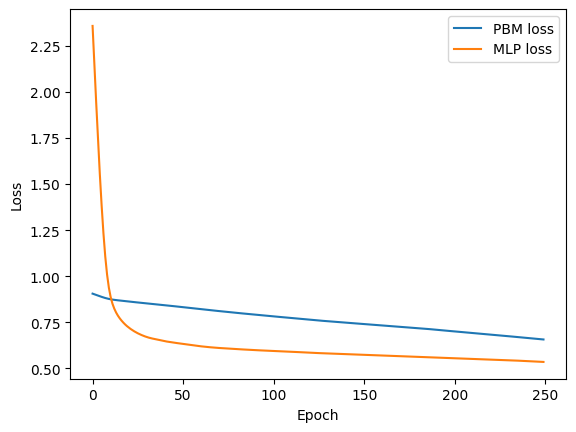

Accuracy (deep): 0.75
Epoch: 0,loss p: 0.85386, loss joint: 0.72033
Epoch: 0, acc joint: 0.53774
Epoch: 1,loss p: 0.85221, loss joint: 0.69188
Epoch: 1, acc joint: 0.63208
Epoch: 2,loss p: 0.85068, loss joint: 0.67005
Epoch: 2, acc joint: 0.64151
Epoch: 3,loss p: 0.84927, loss joint: 0.65347
Epoch: 3, acc joint: 0.67925
Epoch: 4,loss p: 0.84794, loss joint: 0.64089
Epoch: 4, acc joint: 0.67925
Epoch: 5,loss p: 0.84667, loss joint: 0.63123
Epoch: 5, acc joint: 0.68868
Epoch: 6,loss p: 0.84546, loss joint: 0.62350
Epoch: 6, acc joint: 0.71698
Epoch: 7,loss p: 0.84430, loss joint: 0.61699
Epoch: 7, acc joint: 0.72642
Epoch: 8,loss p: 0.84317, loss joint: 0.61149
Epoch: 8, acc joint: 0.73585
Epoch: 9,loss p: 0.84205, loss joint: 0.60689
Epoch: 9, acc joint: 0.74528
Epoch: 10,loss p: 0.84097, loss joint: 0.60311
Epoch: 10, acc joint: 0.74528
Epoch: 11,loss p: 0.83990, loss joint: 0.60003
Epoch: 11, acc joint: 0.74528
Epoch: 12,loss p: 0.83884, loss joint: 0.59739
Epoch: 12, acc joint: 0.745

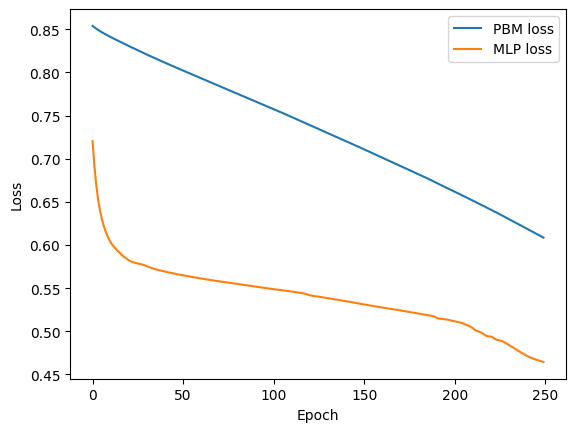

Accuracy (deep): 0.81
Epoch: 0,loss p: 0.85381, loss joint: 0.80872
Epoch: 0, acc joint: 0.53774
Epoch: 1,loss p: 0.85211, loss joint: 0.76795
Epoch: 1, acc joint: 0.62264
Epoch: 2,loss p: 0.85056, loss joint: 0.73811
Epoch: 2, acc joint: 0.62264
Epoch: 3,loss p: 0.84915, loss joint: 0.71635
Epoch: 3, acc joint: 0.64151
Epoch: 4,loss p: 0.84783, loss joint: 0.70026
Epoch: 4, acc joint: 0.65094
Epoch: 5,loss p: 0.84657, loss joint: 0.68761
Epoch: 5, acc joint: 0.66981
Epoch: 6,loss p: 0.84537, loss joint: 0.67704
Epoch: 6, acc joint: 0.69811
Epoch: 7,loss p: 0.84420, loss joint: 0.66832
Epoch: 7, acc joint: 0.73585
Epoch: 8,loss p: 0.84305, loss joint: 0.66102
Epoch: 8, acc joint: 0.73585
Epoch: 9,loss p: 0.84192, loss joint: 0.65482
Epoch: 9, acc joint: 0.73585
Epoch: 10,loss p: 0.84081, loss joint: 0.64952
Epoch: 10, acc joint: 0.74528
Epoch: 11,loss p: 0.83971, loss joint: 0.64505
Epoch: 11, acc joint: 0.75472
Epoch: 12,loss p: 0.83862, loss joint: 0.64087
Epoch: 12, acc joint: 0.754

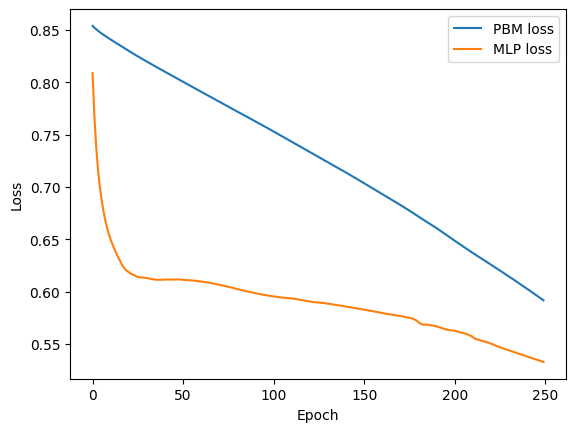

Accuracy (deep): 0.85
Epoch: 0,loss p: 0.85728, loss joint: 0.70076
Epoch: 0, acc joint: 0.57143
Epoch: 1,loss p: 0.85561, loss joint: 0.67161
Epoch: 1, acc joint: 0.66667
Epoch: 2,loss p: 0.85407, loss joint: 0.64907
Epoch: 2, acc joint: 0.67619
Epoch: 3,loss p: 0.85263, loss joint: 0.63160
Epoch: 3, acc joint: 0.75238
Epoch: 4,loss p: 0.85128, loss joint: 0.61768
Epoch: 4, acc joint: 0.76190
Epoch: 5,loss p: 0.85000, loss joint: 0.60643
Epoch: 5, acc joint: 0.77143
Epoch: 6,loss p: 0.84876, loss joint: 0.59714
Epoch: 6, acc joint: 0.79048
Epoch: 7,loss p: 0.84758, loss joint: 0.58937
Epoch: 7, acc joint: 0.80000
Epoch: 8,loss p: 0.84642, loss joint: 0.58268
Epoch: 8, acc joint: 0.80000
Epoch: 9,loss p: 0.84529, loss joint: 0.57677
Epoch: 9, acc joint: 0.80000
Epoch: 10,loss p: 0.84418, loss joint: 0.57167
Epoch: 10, acc joint: 0.80952
Epoch: 11,loss p: 0.84310, loss joint: 0.56732
Epoch: 11, acc joint: 0.80952
Epoch: 12,loss p: 0.84202, loss joint: 0.56331
Epoch: 12, acc joint: 0.809

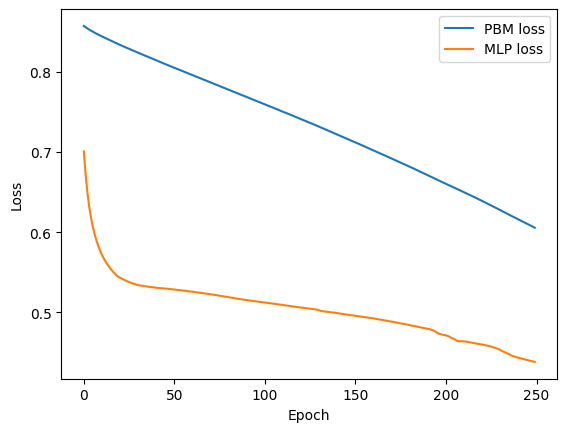

Accuracy (deep): 0.87
Epoch: 0,loss p: 0.84541, loss joint: 0.74529
Epoch: 0, acc joint: 0.72381
Epoch: 1,loss p: 0.84435, loss joint: 0.72402
Epoch: 1, acc joint: 0.76190
Epoch: 2,loss p: 0.84335, loss joint: 0.70878
Epoch: 2, acc joint: 0.76190
Epoch: 3,loss p: 0.84242, loss joint: 0.69789
Epoch: 3, acc joint: 0.74286
Epoch: 4,loss p: 0.84153, loss joint: 0.68970
Epoch: 4, acc joint: 0.72381
Epoch: 5,loss p: 0.84067, loss joint: 0.68314
Epoch: 5, acc joint: 0.72381
Epoch: 6,loss p: 0.83983, loss joint: 0.67760
Epoch: 6, acc joint: 0.72381
Epoch: 7,loss p: 0.83900, loss joint: 0.67271
Epoch: 7, acc joint: 0.72381
Epoch: 8,loss p: 0.83819, loss joint: 0.66814
Epoch: 8, acc joint: 0.72381
Epoch: 9,loss p: 0.83737, loss joint: 0.66393
Epoch: 9, acc joint: 0.72381
Epoch: 10,loss p: 0.83656, loss joint: 0.65999
Epoch: 10, acc joint: 0.72381
Epoch: 11,loss p: 0.83576, loss joint: 0.65633
Epoch: 11, acc joint: 0.72381
Epoch: 12,loss p: 0.83496, loss joint: 0.65293
Epoch: 12, acc joint: 0.723

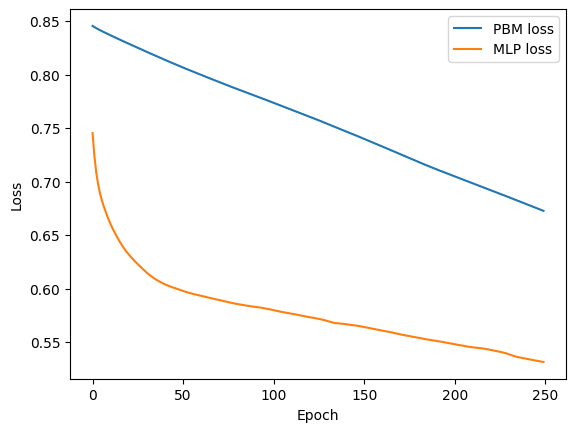

Accuracy (deep): 0.80
Joint: 81.64% (+/- 3.92%)


In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split

# train-test split: Hold out the test set for final model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
#print(y_train.shape)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores_joint = []
for train, test in kfold.split(X_train, y_train):
    # create model, train, and get accuracy
    lr_p = 0.00001
    lr_mlp = 0.00001
    alpha = 0.8
    model = Deep()
    acc = model_train(model, X_train[train], X_train[test],y_train[train], y_train[test], alpha, lr_p, lr_mlp)

    print("Accuracy (deep): %.2f" % acc)
    cv_scores_joint.append(acc)


# evaluate the model
joint_acc = np.mean(cv_scores_joint)
joint_std = np.std(cv_scores_joint)

print("Joint: %.2f%% (+/- %.2f%%)" % (joint_acc*100, joint_std*100))


Epoch: 0,loss p: 0.84208, loss joint: 0.62248
Epoch: 0, acc joint: 0.80189
Epoch: 1,loss p: 0.84092, loss joint: 0.60740
Epoch: 1, acc joint: 0.80189
Epoch: 2,loss p: 0.83990, loss joint: 0.59635
Epoch: 2, acc joint: 0.80189
Epoch: 3,loss p: 0.83895, loss joint: 0.58759
Epoch: 3, acc joint: 0.80189
Epoch: 4,loss p: 0.83805, loss joint: 0.58021
Epoch: 4, acc joint: 0.80189
Epoch: 5,loss p: 0.83717, loss joint: 0.57379
Epoch: 5, acc joint: 0.80189
Epoch: 6,loss p: 0.83630, loss joint: 0.56804
Epoch: 6, acc joint: 0.80189
Epoch: 7,loss p: 0.83544, loss joint: 0.56282
Epoch: 7, acc joint: 0.80189
Epoch: 8,loss p: 0.83459, loss joint: 0.55809
Epoch: 8, acc joint: 0.81132
Epoch: 9,loss p: 0.83375, loss joint: 0.55376
Epoch: 9, acc joint: 0.81132
Epoch: 10,loss p: 0.83292, loss joint: 0.54979
Epoch: 10, acc joint: 0.81132
Epoch: 11,loss p: 0.83209, loss joint: 0.54616
Epoch: 11, acc joint: 0.81132
Epoch: 12,loss p: 0.83125, loss joint: 0.54283
Epoch: 12, acc joint: 0.81132
Epoch: 13,loss p: 0

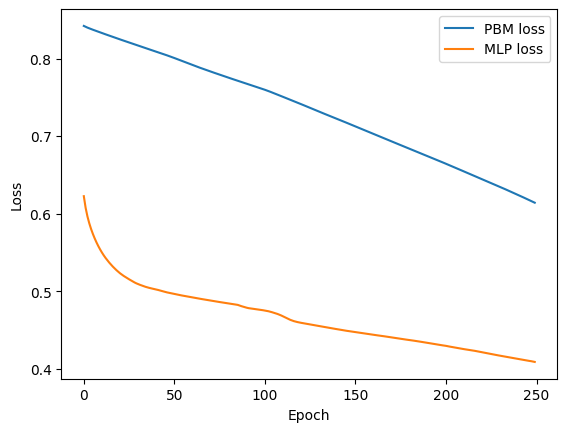

Accuracy (deep): 0.89
Epoch: 0,loss p: 0.85408, loss joint: 0.72127
Epoch: 0, acc joint: 0.57547
Epoch: 1,loss p: 0.85230, loss joint: 0.69330
Epoch: 1, acc joint: 0.62264
Epoch: 2,loss p: 0.85066, loss joint: 0.67191
Epoch: 2, acc joint: 0.64151
Epoch: 3,loss p: 0.84914, loss joint: 0.65530
Epoch: 3, acc joint: 0.70755
Epoch: 4,loss p: 0.84770, loss joint: 0.64208
Epoch: 4, acc joint: 0.73585
Epoch: 5,loss p: 0.84633, loss joint: 0.63125
Epoch: 5, acc joint: 0.75472
Epoch: 6,loss p: 0.84502, loss joint: 0.62207
Epoch: 6, acc joint: 0.77358
Epoch: 7,loss p: 0.84376, loss joint: 0.61423
Epoch: 7, acc joint: 0.79245
Epoch: 8,loss p: 0.84251, loss joint: 0.60746
Epoch: 8, acc joint: 0.79245
Epoch: 9,loss p: 0.84127, loss joint: 0.60180
Epoch: 9, acc joint: 0.78302
Epoch: 10,loss p: 0.84002, loss joint: 0.59618
Epoch: 10, acc joint: 0.78302
Epoch: 11,loss p: 0.83879, loss joint: 0.59082
Epoch: 11, acc joint: 0.78302
Epoch: 12,loss p: 0.83759, loss joint: 0.58595
Epoch: 12, acc joint: 0.801

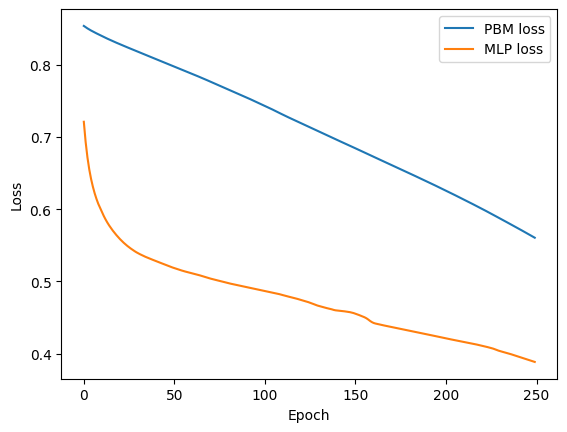

Accuracy (deep): 0.91
Epoch: 0,loss p: 0.85410, loss joint: 0.78381
Epoch: 0, acc joint: 0.50943
Epoch: 1,loss p: 0.85232, loss joint: 0.75026
Epoch: 1, acc joint: 0.58491
Epoch: 2,loss p: 0.85067, loss joint: 0.72415
Epoch: 2, acc joint: 0.59434
Epoch: 3,loss p: 0.84914, loss joint: 0.70414
Epoch: 3, acc joint: 0.63208
Epoch: 4,loss p: 0.84770, loss joint: 0.68849
Epoch: 4, acc joint: 0.63208
Epoch: 5,loss p: 0.84633, loss joint: 0.67578
Epoch: 5, acc joint: 0.64151
Epoch: 6,loss p: 0.84501, loss joint: 0.66555
Epoch: 6, acc joint: 0.66981
Epoch: 7,loss p: 0.84374, loss joint: 0.65715
Epoch: 7, acc joint: 0.68868
Epoch: 8,loss p: 0.84250, loss joint: 0.65010
Epoch: 8, acc joint: 0.68868
Epoch: 9,loss p: 0.84128, loss joint: 0.64400
Epoch: 9, acc joint: 0.69811
Epoch: 10,loss p: 0.84007, loss joint: 0.63871
Epoch: 10, acc joint: 0.69811
Epoch: 11,loss p: 0.83886, loss joint: 0.63404
Epoch: 11, acc joint: 0.70755
Epoch: 12,loss p: 0.83766, loss joint: 0.62946
Epoch: 12, acc joint: 0.726

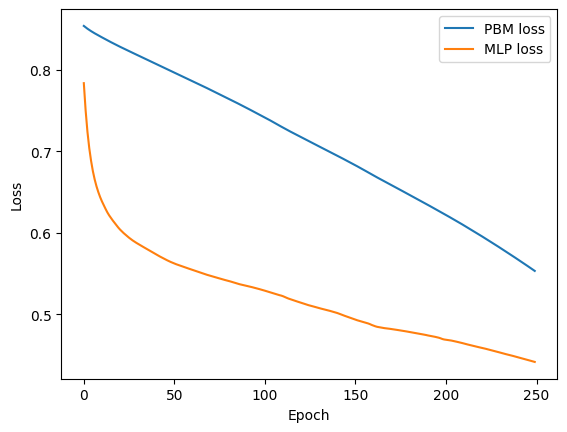

Accuracy (deep): 0.81
Epoch: 0,loss p: 0.85750, loss joint: 0.78017
Epoch: 0, acc joint: 0.48571
Epoch: 1,loss p: 0.85568, loss joint: 0.74712
Epoch: 1, acc joint: 0.56190
Epoch: 2,loss p: 0.85401, loss joint: 0.72191
Epoch: 2, acc joint: 0.57143
Epoch: 3,loss p: 0.85247, loss joint: 0.70259
Epoch: 3, acc joint: 0.60952
Epoch: 4,loss p: 0.85101, loss joint: 0.68759
Epoch: 4, acc joint: 0.63810
Epoch: 5,loss p: 0.84962, loss joint: 0.67573
Epoch: 5, acc joint: 0.68571
Epoch: 6,loss p: 0.84828, loss joint: 0.66584
Epoch: 6, acc joint: 0.70476
Epoch: 7,loss p: 0.84699, loss joint: 0.65750
Epoch: 7, acc joint: 0.70476
Epoch: 8,loss p: 0.84572, loss joint: 0.65024
Epoch: 8, acc joint: 0.70476
Epoch: 9,loss p: 0.84445, loss joint: 0.64372
Epoch: 9, acc joint: 0.70476
Epoch: 10,loss p: 0.84317, loss joint: 0.63722
Epoch: 10, acc joint: 0.69524
Epoch: 11,loss p: 0.84191, loss joint: 0.63129
Epoch: 11, acc joint: 0.68571
Epoch: 12,loss p: 0.84068, loss joint: 0.62635
Epoch: 12, acc joint: 0.704

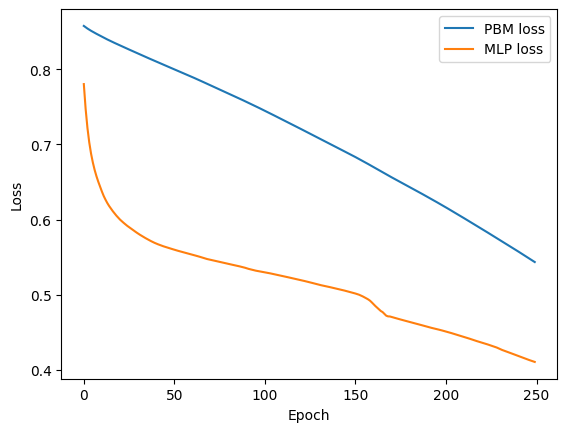

Accuracy (deep): 0.77
Epoch: 0,loss p: 0.84525, loss joint: 0.64347
Epoch: 0, acc joint: 0.72381
Epoch: 1,loss p: 0.84410, loss joint: 0.63014
Epoch: 1, acc joint: 0.72381
Epoch: 2,loss p: 0.84307, loss joint: 0.62091
Epoch: 2, acc joint: 0.71429
Epoch: 3,loss p: 0.84213, loss joint: 0.61413
Epoch: 3, acc joint: 0.71429
Epoch: 4,loss p: 0.84123, loss joint: 0.60863
Epoch: 4, acc joint: 0.71429
Epoch: 5,loss p: 0.84034, loss joint: 0.60393
Epoch: 5, acc joint: 0.71429
Epoch: 6,loss p: 0.83946, loss joint: 0.59971
Epoch: 6, acc joint: 0.71429
Epoch: 7,loss p: 0.83859, loss joint: 0.59598
Epoch: 7, acc joint: 0.71429
Epoch: 8,loss p: 0.83773, loss joint: 0.59261
Epoch: 8, acc joint: 0.71429
Epoch: 9,loss p: 0.83686, loss joint: 0.58952
Epoch: 9, acc joint: 0.71429
Epoch: 10,loss p: 0.83599, loss joint: 0.58650
Epoch: 10, acc joint: 0.71429
Epoch: 11,loss p: 0.83511, loss joint: 0.58367
Epoch: 11, acc joint: 0.71429
Epoch: 12,loss p: 0.83423, loss joint: 0.58111
Epoch: 12, acc joint: 0.714

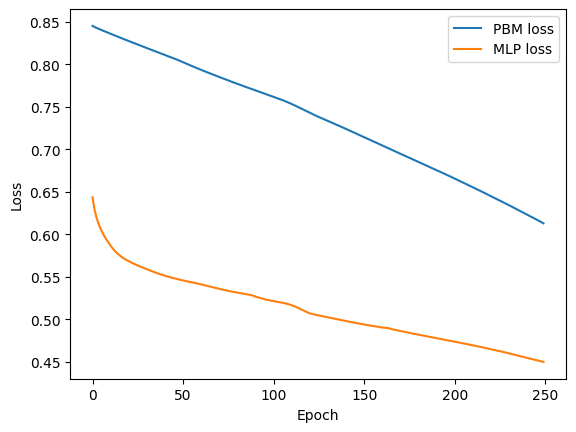

Accuracy (deep): 0.77
Joint: 82.93% (+/- 5.68%)


In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split

# train-test split: Hold out the test set for final model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
#print(y_train.shape)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores_joint = []
for train, test in kfold.split(X_train, y_train):
    # create model, train, and get accuracy
    lr_p = 0.00001
    lr_mlp = 0.00001
    alpha = 0.8
    model = Deep1()
    acc = model_train(model, X_train[train], X_train[test],y_train[train], y_train[test], alpha, lr_p, lr_mlp)

    print("Accuracy (deep): %.2f" % acc)
    cv_scores_joint.append(acc)


# evaluate the model
joint_acc = np.mean(cv_scores_joint)
joint_std = np.std(cv_scores_joint)

print("Joint: %.2f%% (+/- %.2f%%)" % (joint_acc*100, joint_std*100))


Epoch: 0,loss p: 0.86455, loss joint: 9.45117
Epoch: 0, acc joint: 0.46226
Epoch: 1,loss p: 0.86707, loss joint: 9.01827
Epoch: 1, acc joint: 0.46226
Epoch: 2,loss p: 0.86948, loss joint: 8.59107
Epoch: 2, acc joint: 0.46226
Epoch: 3,loss p: 0.87171, loss joint: 8.17049
Epoch: 3, acc joint: 0.44340
Epoch: 4,loss p: 0.87375, loss joint: 7.75674
Epoch: 4, acc joint: 0.45283
Epoch: 5,loss p: 0.87562, loss joint: 7.34902
Epoch: 5, acc joint: 0.42453
Epoch: 6,loss p: 0.87733, loss joint: 6.94598
Epoch: 6, acc joint: 0.41509
Epoch: 7,loss p: 0.87890, loss joint: 6.54651
Epoch: 7, acc joint: 0.38679
Epoch: 8,loss p: 0.88036, loss joint: 6.14988
Epoch: 8, acc joint: 0.35849
Epoch: 9,loss p: 0.88172, loss joint: 5.75591
Epoch: 9, acc joint: 0.34906
Epoch: 10,loss p: 0.88300, loss joint: 5.36525
Epoch: 10, acc joint: 0.32075
Epoch: 11,loss p: 0.88422, loss joint: 4.97990
Epoch: 11, acc joint: 0.30189
Epoch: 12,loss p: 0.88538, loss joint: 4.60227
Epoch: 12, acc joint: 0.31132
Epoch: 13,loss p: 0

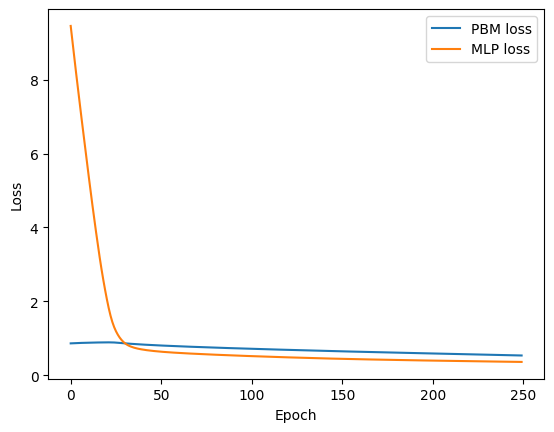

Accuracy (deep): 0.86
Epoch: 0,loss p: 0.97146, loss joint: 0.91897
Epoch: 0, acc joint: 0.43396
Epoch: 1,loss p: 0.97016, loss joint: 0.89334
Epoch: 1, acc joint: 0.53774
Epoch: 2,loss p: 0.96812, loss joint: 0.86988
Epoch: 2, acc joint: 0.58491
Epoch: 3,loss p: 0.96561, loss joint: 0.84584
Epoch: 3, acc joint: 0.60377
Epoch: 4,loss p: 0.96295, loss joint: 0.82307
Epoch: 4, acc joint: 0.62264
Epoch: 5,loss p: 0.96031, loss joint: 0.80254
Epoch: 5, acc joint: 0.62264
Epoch: 6,loss p: 0.95771, loss joint: 0.78409
Epoch: 6, acc joint: 0.62264
Epoch: 7,loss p: 0.95515, loss joint: 0.76754
Epoch: 7, acc joint: 0.62264
Epoch: 8,loss p: 0.95263, loss joint: 0.75271
Epoch: 8, acc joint: 0.63208
Epoch: 9,loss p: 0.95014, loss joint: 0.73944
Epoch: 9, acc joint: 0.63208
Epoch: 10,loss p: 0.94767, loss joint: 0.72759
Epoch: 10, acc joint: 0.64151
Epoch: 11,loss p: 0.94522, loss joint: 0.71697
Epoch: 11, acc joint: 0.65094
Epoch: 12,loss p: 0.94280, loss joint: 0.70744
Epoch: 12, acc joint: 0.650

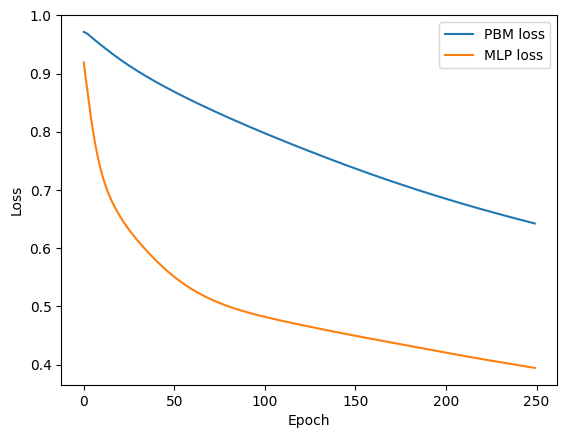

Accuracy (deep): 0.83
Epoch: 0,loss p: 0.97170, loss joint: 1.20395
Epoch: 0, acc joint: 0.39623
Epoch: 1,loss p: 0.96996, loss joint: 1.13740
Epoch: 1, acc joint: 0.49057
Epoch: 2,loss p: 0.96754, loss joint: 1.08086
Epoch: 2, acc joint: 0.52830
Epoch: 3,loss p: 0.96491, loss joint: 1.03181
Epoch: 3, acc joint: 0.53774
Epoch: 4,loss p: 0.96229, loss joint: 0.98829
Epoch: 4, acc joint: 0.53774
Epoch: 5,loss p: 0.95974, loss joint: 0.94929
Epoch: 5, acc joint: 0.55660
Epoch: 6,loss p: 0.95721, loss joint: 0.91455
Epoch: 6, acc joint: 0.55660
Epoch: 7,loss p: 0.95471, loss joint: 0.88395
Epoch: 7, acc joint: 0.54717
Epoch: 8,loss p: 0.95222, loss joint: 0.85715
Epoch: 8, acc joint: 0.54717
Epoch: 9,loss p: 0.94976, loss joint: 0.83380
Epoch: 9, acc joint: 0.54717
Epoch: 10,loss p: 0.94733, loss joint: 0.81348
Epoch: 10, acc joint: 0.54717
Epoch: 11,loss p: 0.94494, loss joint: 0.79579
Epoch: 11, acc joint: 0.55660
Epoch: 12,loss p: 0.94257, loss joint: 0.78036
Epoch: 12, acc joint: 0.575

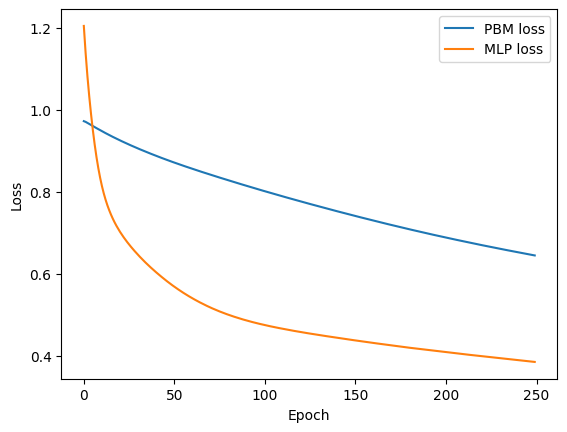

Accuracy (deep): 0.80
Epoch: 0,loss p: 0.97727, loss joint: 0.90987
Epoch: 0, acc joint: 0.46667
Epoch: 1,loss p: 0.97585, loss joint: 0.81751
Epoch: 1, acc joint: 0.53333
Epoch: 2,loss p: 0.97350, loss joint: 0.75635
Epoch: 2, acc joint: 0.55238
Epoch: 3,loss p: 0.97077, loss joint: 0.71228
Epoch: 3, acc joint: 0.57143
Epoch: 4,loss p: 0.96798, loss joint: 0.67697
Epoch: 4, acc joint: 0.59048
Epoch: 5,loss p: 0.96524, loss joint: 0.64683
Epoch: 5, acc joint: 0.60000
Epoch: 6,loss p: 0.96255, loss joint: 0.62114
Epoch: 6, acc joint: 0.60000
Epoch: 7,loss p: 0.95990, loss joint: 0.59964
Epoch: 7, acc joint: 0.60000
Epoch: 8,loss p: 0.95729, loss joint: 0.58189
Epoch: 8, acc joint: 0.60000
Epoch: 9,loss p: 0.95470, loss joint: 0.56737
Epoch: 9, acc joint: 0.61905
Epoch: 10,loss p: 0.95215, loss joint: 0.55559
Epoch: 10, acc joint: 0.62857
Epoch: 11,loss p: 0.94962, loss joint: 0.54610
Epoch: 11, acc joint: 0.65714
Epoch: 12,loss p: 0.94712, loss joint: 0.53852
Epoch: 12, acc joint: 0.657

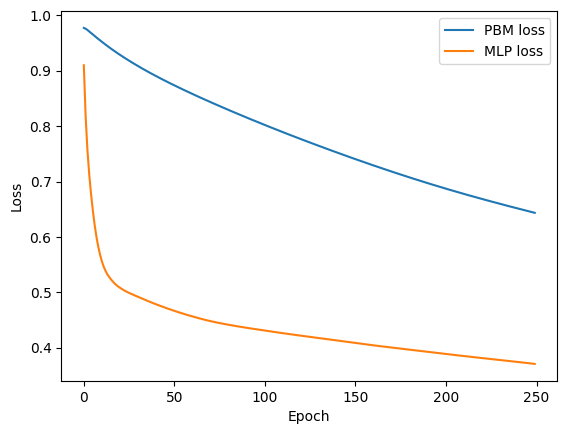

Accuracy (deep): 0.77
Epoch: 0,loss p: 0.86825, loss joint: 9.47259
Epoch: 0, acc joint: 0.45714
Epoch: 1,loss p: 0.87081, loss joint: 9.03136
Epoch: 1, acc joint: 0.45714
Epoch: 2,loss p: 0.87324, loss joint: 8.59725
Epoch: 2, acc joint: 0.44762
Epoch: 3,loss p: 0.87548, loss joint: 8.17173
Epoch: 3, acc joint: 0.43810
Epoch: 4,loss p: 0.87753, loss joint: 7.75534
Epoch: 4, acc joint: 0.41905
Epoch: 5,loss p: 0.87938, loss joint: 7.34718
Epoch: 5, acc joint: 0.39048
Epoch: 6,loss p: 0.88109, loss joint: 6.94562
Epoch: 6, acc joint: 0.34286
Epoch: 7,loss p: 0.88266, loss joint: 6.54937
Epoch: 7, acc joint: 0.28571
Epoch: 8,loss p: 0.88413, loss joint: 6.15751
Epoch: 8, acc joint: 0.26667
Epoch: 9,loss p: 0.88551, loss joint: 5.76972
Epoch: 9, acc joint: 0.26667
Epoch: 10,loss p: 0.88682, loss joint: 5.38653
Epoch: 10, acc joint: 0.21905
Epoch: 11,loss p: 0.88806, loss joint: 5.00975
Epoch: 11, acc joint: 0.21905
Epoch: 12,loss p: 0.88924, loss joint: 4.64164
Epoch: 12, acc joint: 0.209

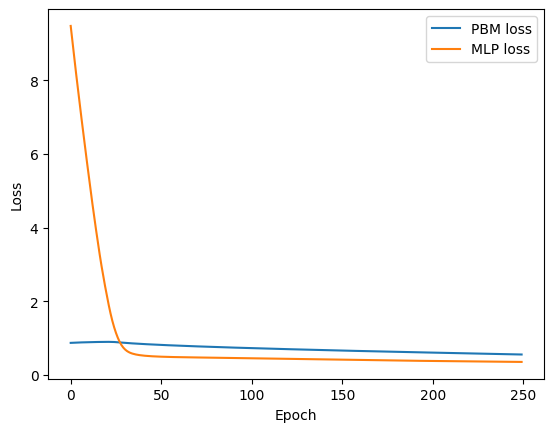

Accuracy (deep): 0.88
Joint: 82.76% (+/- 3.78%)


In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split

# train-test split: Hold out the test set for final model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
#print(y_train.shape)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores_joint = []
for train, test in kfold.split(X_train, y_train):
    # create model, train, and get accuracy
    lr_p = 0.00001
    lr_mlp = 0.00001
    alpha = 0.8
    model = Wide()
    acc = model_train(model, X_train[train], X_train[test],y_train[train], y_train[test], alpha, lr_p, lr_mlp)

    print("Accuracy (deep): %.2f" % acc)
    cv_scores_joint.append(acc)


# evaluate the model
joint_acc = np.mean(cv_scores_joint)
joint_std = np.std(cv_scores_joint)

print("Joint: %.2f%% (+/- %.2f%%)" % (joint_acc*100, joint_std*100))


In [ ]:
import pandas as pd

# Read data
data = pd.read_csv("GapSimLKLCrandsmall_20_20.csv")
print(data)
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]
print(X)
print(y)

        DV1    DV2    DV3       V       G1       G2        G3      Dend  \
0    -1.146  0.640 -5.520  18.943  39.3416  20.0882  257.3108   51.8348   
1    -1.155  0.689 -5.486  19.004  39.4426  20.0252  256.7608   53.7348   
2    -1.268  0.744 -5.474  19.044  39.5556  19.9502  256.2208   55.6348   
3    -1.387  0.765 -5.477  19.056  39.6956  19.8712  255.6708   57.5448   
4    -1.414  0.762 -5.486  19.056  39.8476  19.7942  255.1208   59.4448   
...     ...    ...    ...     ...      ...      ...       ...       ...   
1407  9.073 -0.927 -2.451  11.595  81.6480   6.6950  231.8328  122.5148   
1408  9.193 -0.966 -2.490  11.634  80.7190   6.7790  231.6028  123.6648   
1409  9.135 -1.125 -2.649  11.793  79.7850   6.8710  231.3528  124.8248   
1410  8.876 -1.390 -2.914  12.058  78.8660   6.9880  231.0828  126.0148   
1411  8.443 -1.701 -3.225  12.369  77.9850   7.1430  230.7728  127.2348   

         Carid  label_targetlane  
0     0.358781                 1  
1     0.358781               

In [ ]:
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32)
print(X.shape)
print(y.shape)

torch.Size([1412, 9])
torch.Size([1412, 1])


In [ ]:
import torch.nn as nn
class PBM(nn.Module):
    def __init__(self):
        super(PBM, self).__init__()
        
        # Define the trainable parameters
        #self.interceptfo = nn.Parameter(torch.tensor(100., requires_grad = True))
        #self.interceptlead = nn.Parameter(torch.tensor(100., requires_grad = True))
        #self.interceptlag = nn.Parameter(torch.tensor(100., requires_grad = True))
        self.betaDV1fo = nn.Parameter(torch.tensor(0., requires_grad = True))
        self.betaDV2lead = nn.Parameter(torch.tensor(0., requires_grad = True))
        self.betaDV3lag = nn.Parameter(torch.tensor(0., requires_grad = True))
        self.betaV = nn.Parameter(torch.tensor(0., requires_grad = True))
        self.betaG1 = nn.Parameter(torch.tensor(0., requires_grad = True))
        self.betaG2 = nn.Parameter(torch.tensor(0.0030, requires_grad = True))
        self.betaG3 = nn.Parameter(torch.tensor(0.01671, requires_grad = True))
        
        self.alphaveh = nn.Parameter(torch.tensor(1., requires_grad = True))
        self.betaD = nn.Parameter(torch.tensor(0.0042, requires_grad = True))

        

    def forward(self, X):
        # Compute the utilities
        U_fo =  self.betaDV1fo * X[:, 0] + self.betaG1 * X[:, 4] + self.betaD * X[:, 7]
        U_lead =  self.betaDV2lead * X[:, 1] + self.betaG2 * X[:, 5] + self.betaD * X[:, 7]
        U_lag =  self.betaDV3lag * X[:, 2] + self.betaG3 * X[:, 6]  + self.betaD * X[:, 7]
        
        # Compute the gaps and probabilities
        Gfo = torch.log(X[:, 4]) - U_fo
        Glead = torch.log(X[:, 5]) - U_lead
        Glag = torch.log(X[:, 6]) - U_lag
        

        Gaplead = torch.distributions.normal.Normal(loc=0, scale=self.alphaveh).cdf(Glead / self.alphaveh)
        Gaplag = torch.distributions.normal.Normal(loc=0, scale=self.alphaveh).cdf(Glag / self.alphaveh)
        Gapfo = torch.distributions.normal.Normal(loc=0, scale=self.alphaveh).cdf(Gfo / self.alphaveh)
        P_LC = Gaplead * Gaplag * Gapfo
        
        # Generate the acceptance probabilities
        #rand_num = torch.rand(X.shape[0]).to(self.device)
        #P = torch.where(rand_num > P_LC, torch.ones_like(rand_num), torch.zeros_like(rand_num))
        
        return P_LC.reshape(-1, 1)


Epoch: 0,loss p: 0.80279, loss joint: 0.63871
Epoch: 0, acc joint: 0.72222
Epoch: 1,loss p: 0.80132, loss joint: 0.63299
Epoch: 1, acc joint: 0.73737
Epoch: 2,loss p: 0.80009, loss joint: 0.62365
Epoch: 2, acc joint: 0.73737
Epoch: 3,loss p: 0.79894, loss joint: 0.61322
Epoch: 3, acc joint: 0.72727
Epoch: 4,loss p: 0.79783, loss joint: 0.60324
Epoch: 4, acc joint: 0.72222
Epoch: 5,loss p: 0.79673, loss joint: 0.59632
Epoch: 5, acc joint: 0.71717
Epoch: 6,loss p: 0.79562, loss joint: 0.59281
Epoch: 6, acc joint: 0.71212
Epoch: 7,loss p: 0.79449, loss joint: 0.59073
Epoch: 7, acc joint: 0.70202
Epoch: 8,loss p: 0.79339, loss joint: 0.58820
Epoch: 8, acc joint: 0.69697
Epoch: 9,loss p: 0.79231, loss joint: 0.58571
Epoch: 9, acc joint: 0.69192
Epoch: 10,loss p: 0.79127, loss joint: 0.58331
Epoch: 10, acc joint: 0.68182
Epoch: 11,loss p: 0.79023, loss joint: 0.58113
Epoch: 11, acc joint: 0.67677
Epoch: 12,loss p: 0.78921, loss joint: 0.57827
Epoch: 12, acc joint: 0.67677
Epoch: 13,loss p: 0

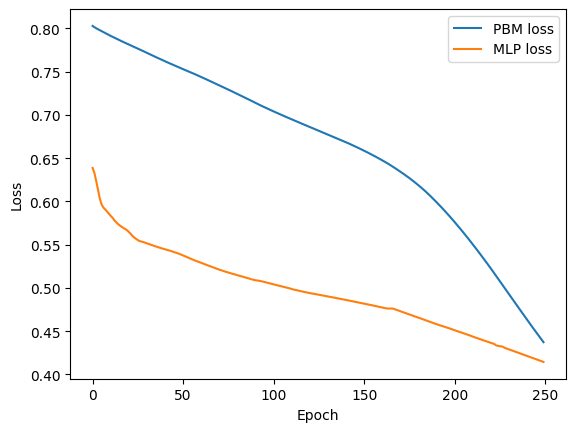

Accuracy (deep): 0.83
Epoch: 0,loss p: 0.81315, loss joint: 0.74931
Epoch: 0, acc joint: 0.72727
Epoch: 1,loss p: 0.81175, loss joint: 0.73186
Epoch: 1, acc joint: 0.73232
Epoch: 2,loss p: 0.81021, loss joint: 0.71954
Epoch: 2, acc joint: 0.73232
Epoch: 3,loss p: 0.80864, loss joint: 0.70797
Epoch: 3, acc joint: 0.73232
Epoch: 4,loss p: 0.80707, loss joint: 0.69703
Epoch: 4, acc joint: 0.73232
Epoch: 5,loss p: 0.80553, loss joint: 0.68687
Epoch: 5, acc joint: 0.72727
Epoch: 6,loss p: 0.80400, loss joint: 0.67749
Epoch: 6, acc joint: 0.72727
Epoch: 7,loss p: 0.80249, loss joint: 0.66911
Epoch: 7, acc joint: 0.73232
Epoch: 8,loss p: 0.80100, loss joint: 0.66115
Epoch: 8, acc joint: 0.74242
Epoch: 9,loss p: 0.79952, loss joint: 0.65392
Epoch: 9, acc joint: 0.75253
Epoch: 10,loss p: 0.79804, loss joint: 0.64742
Epoch: 10, acc joint: 0.76768
Epoch: 11,loss p: 0.79655, loss joint: 0.64068
Epoch: 11, acc joint: 0.77273
Epoch: 12,loss p: 0.79505, loss joint: 0.63398
Epoch: 12, acc joint: 0.772

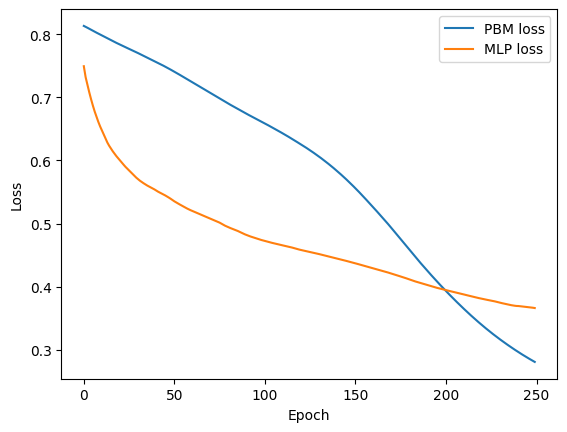

Accuracy (deep): 0.85
Epoch: 0,loss p: 0.81324, loss joint: 0.70481
Epoch: 0, acc joint: 0.70202
Epoch: 1,loss p: 0.81183, loss joint: 0.68986
Epoch: 1, acc joint: 0.71212
Epoch: 2,loss p: 0.81028, loss joint: 0.68060
Epoch: 2, acc joint: 0.71212
Epoch: 3,loss p: 0.80869, loss joint: 0.67174
Epoch: 3, acc joint: 0.71717
Epoch: 4,loss p: 0.80712, loss joint: 0.66284
Epoch: 4, acc joint: 0.72222
Epoch: 5,loss p: 0.80558, loss joint: 0.65458
Epoch: 5, acc joint: 0.72222
Epoch: 6,loss p: 0.80406, loss joint: 0.64673
Epoch: 6, acc joint: 0.72222
Epoch: 7,loss p: 0.80257, loss joint: 0.63970
Epoch: 7, acc joint: 0.72222
Epoch: 8,loss p: 0.80110, loss joint: 0.63306
Epoch: 8, acc joint: 0.73232
Epoch: 9,loss p: 0.79964, loss joint: 0.62703
Epoch: 9, acc joint: 0.73232
Epoch: 10,loss p: 0.79819, loss joint: 0.62131
Epoch: 10, acc joint: 0.74747
Epoch: 11,loss p: 0.79673, loss joint: 0.61605
Epoch: 11, acc joint: 0.75253
Epoch: 12,loss p: 0.79526, loss joint: 0.61087
Epoch: 12, acc joint: 0.762

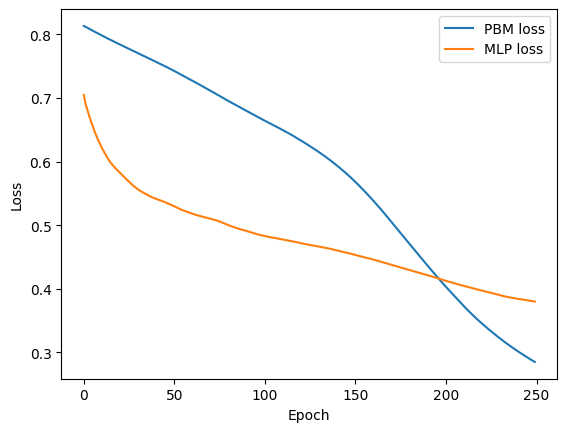

Accuracy (deep): 0.86
Epoch: 0,loss p: 0.80751, loss joint: 0.62889
Epoch: 0, acc joint: 0.74619
Epoch: 1,loss p: 0.80621, loss joint: 0.61719
Epoch: 1, acc joint: 0.75127
Epoch: 2,loss p: 0.80471, loss joint: 0.60813
Epoch: 2, acc joint: 0.75635
Epoch: 3,loss p: 0.80317, loss joint: 0.59979
Epoch: 3, acc joint: 0.75635
Epoch: 4,loss p: 0.80165, loss joint: 0.59215
Epoch: 4, acc joint: 0.75635
Epoch: 5,loss p: 0.80015, loss joint: 0.58521
Epoch: 5, acc joint: 0.75635
Epoch: 6,loss p: 0.79870, loss joint: 0.57884
Epoch: 6, acc joint: 0.75635
Epoch: 7,loss p: 0.79726, loss joint: 0.57286
Epoch: 7, acc joint: 0.75635
Epoch: 8,loss p: 0.79582, loss joint: 0.56718
Epoch: 8, acc joint: 0.75635
Epoch: 9,loss p: 0.79440, loss joint: 0.56168
Epoch: 9, acc joint: 0.76142
Epoch: 10,loss p: 0.79298, loss joint: 0.55611
Epoch: 10, acc joint: 0.77157
Epoch: 11,loss p: 0.79155, loss joint: 0.55016
Epoch: 11, acc joint: 0.77157
Epoch: 12,loss p: 0.79013, loss joint: 0.54521
Epoch: 12, acc joint: 0.771

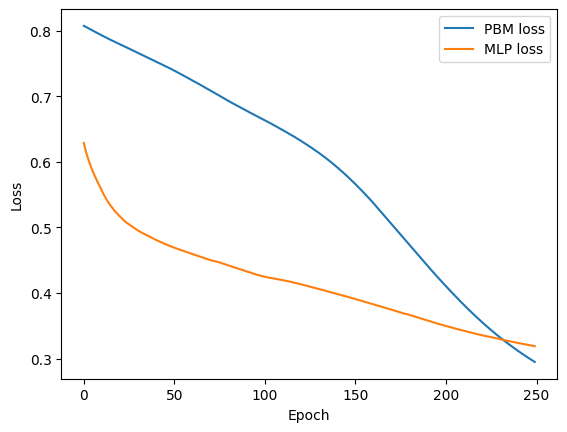

Accuracy (deep): 0.83
Epoch: 0,loss p: 0.84793, loss joint: 0.99569
Epoch: 0, acc joint: 0.53299
Epoch: 1,loss p: 0.84235, loss joint: 0.84570
Epoch: 1, acc joint: 0.53807
Epoch: 2,loss p: 0.83690, loss joint: 0.72849
Epoch: 2, acc joint: 0.55330
Epoch: 3,loss p: 0.83182, loss joint: 0.65869
Epoch: 3, acc joint: 0.60914
Epoch: 4,loss p: 0.82767, loss joint: 0.62606
Epoch: 4, acc joint: 0.58376
Epoch: 5,loss p: 0.82470, loss joint: 0.60690
Epoch: 5, acc joint: 0.59898
Epoch: 6,loss p: 0.82267, loss joint: 0.58603
Epoch: 6, acc joint: 0.62437
Epoch: 7,loss p: 0.82113, loss joint: 0.56419
Epoch: 7, acc joint: 0.64975
Epoch: 8,loss p: 0.81975, loss joint: 0.54638
Epoch: 8, acc joint: 0.67513
Epoch: 9,loss p: 0.81841, loss joint: 0.53314
Epoch: 9, acc joint: 0.70558
Epoch: 10,loss p: 0.81712, loss joint: 0.52312
Epoch: 10, acc joint: 0.73096
Epoch: 11,loss p: 0.81585, loss joint: 0.51549
Epoch: 11, acc joint: 0.73604
Epoch: 12,loss p: 0.81458, loss joint: 0.50962
Epoch: 12, acc joint: 0.730

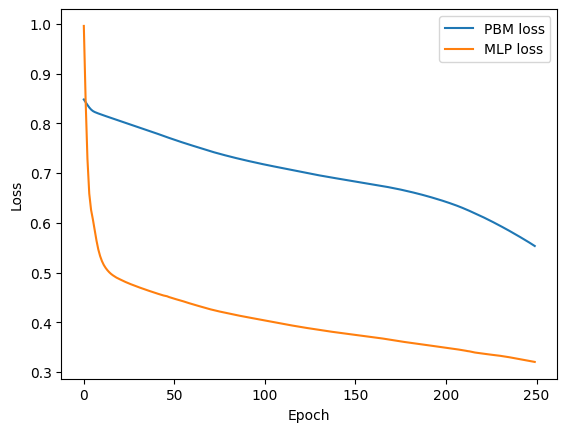

Accuracy (deep): 0.82
Joint: 83.90% (+/- 1.51%)


In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split

# train-test split: Hold out the test set for final model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
#print(y_train.shape)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores_joint = []
for train, test in kfold.split(X_train, y_train):
    # create model, train, and get accuracy
    lr_p = 0.00001
    lr_mlp = 0.00001
    alpha = 0.8
    model = Deep()
    acc = model_train(model, X_train[train], X_train[test],y_train[train], y_train[test], alpha, lr_p, lr_mlp)

    print("Accuracy (deep): %.2f" % acc)
    cv_scores_joint.append(acc)


# evaluate the model
joint_acc = np.mean(cv_scores_joint)
joint_std = np.std(cv_scores_joint)

print("Joint: %.2f%% (+/- %.2f%%)" % (joint_acc*100, joint_std*100))


Epoch: 0,loss p: 0.85398, loss joint: 1.05315
Epoch: 0, acc joint: 0.52020
Epoch: 1,loss p: 0.84779, loss joint: 0.87714
Epoch: 1, acc joint: 0.53030
Epoch: 2,loss p: 0.84172, loss joint: 0.72917
Epoch: 2, acc joint: 0.53030
Epoch: 3,loss p: 0.83596, loss joint: 0.63066
Epoch: 3, acc joint: 0.56566
Epoch: 4,loss p: 0.83112, loss joint: 0.59360
Epoch: 4, acc joint: 0.54040
Epoch: 5,loss p: 0.82778, loss joint: 0.59042
Epoch: 5, acc joint: 0.59596
Epoch: 6,loss p: 0.82570, loss joint: 0.58390
Epoch: 6, acc joint: 0.64141
Epoch: 7,loss p: 0.82411, loss joint: 0.57484
Epoch: 7, acc joint: 0.66162
Epoch: 8,loss p: 0.82262, loss joint: 0.56897
Epoch: 8, acc joint: 0.68687
Epoch: 9,loss p: 0.82115, loss joint: 0.56576
Epoch: 9, acc joint: 0.70707
Epoch: 10,loss p: 0.81968, loss joint: 0.56397
Epoch: 10, acc joint: 0.71212
Epoch: 11,loss p: 0.81822, loss joint: 0.56315
Epoch: 11, acc joint: 0.72727
Epoch: 12,loss p: 0.81677, loss joint: 0.56267
Epoch: 12, acc joint: 0.74242
Epoch: 13,loss p: 0

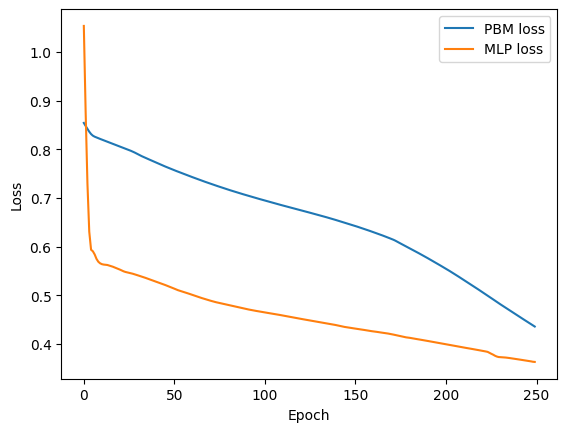

Accuracy (deep): 0.84
Epoch: 0,loss p: 0.81299, loss joint: 0.60413
Epoch: 0, acc joint: 0.68687
Epoch: 1,loss p: 0.81150, loss joint: 0.58722
Epoch: 1, acc joint: 0.69192
Epoch: 2,loss p: 0.80987, loss joint: 0.57838
Epoch: 2, acc joint: 0.69192
Epoch: 3,loss p: 0.80823, loss joint: 0.57017
Epoch: 3, acc joint: 0.69192
Epoch: 4,loss p: 0.80661, loss joint: 0.56210
Epoch: 4, acc joint: 0.69192
Epoch: 5,loss p: 0.80502, loss joint: 0.55462
Epoch: 5, acc joint: 0.69192
Epoch: 6,loss p: 0.80343, loss joint: 0.54807
Epoch: 6, acc joint: 0.69697
Epoch: 7,loss p: 0.80185, loss joint: 0.54225
Epoch: 7, acc joint: 0.69697
Epoch: 8,loss p: 0.80030, loss joint: 0.53713
Epoch: 8, acc joint: 0.69697
Epoch: 9,loss p: 0.79876, loss joint: 0.53229
Epoch: 9, acc joint: 0.69697
Epoch: 10,loss p: 0.79721, loss joint: 0.52730
Epoch: 10, acc joint: 0.70202
Epoch: 11,loss p: 0.79563, loss joint: 0.52187
Epoch: 11, acc joint: 0.71717
Epoch: 12,loss p: 0.79402, loss joint: 0.51633
Epoch: 12, acc joint: 0.717

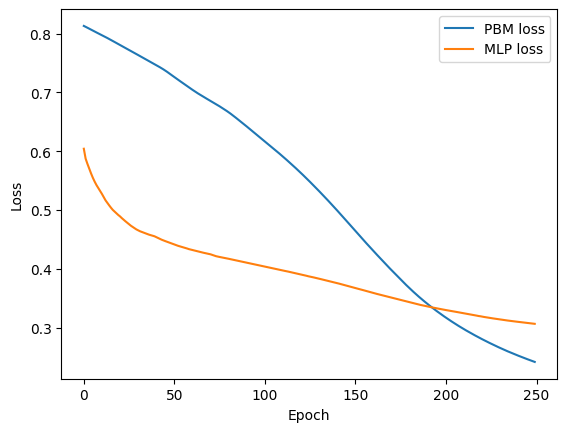

Accuracy (deep): 0.79
Epoch: 0,loss p: 0.81290, loss joint: 0.65528
Epoch: 0, acc joint: 0.75253
Epoch: 1,loss p: 0.81139, loss joint: 0.64361
Epoch: 1, acc joint: 0.76263
Epoch: 2,loss p: 0.80975, loss joint: 0.63543
Epoch: 2, acc joint: 0.76263
Epoch: 3,loss p: 0.80812, loss joint: 0.62690
Epoch: 3, acc joint: 0.75758
Epoch: 4,loss p: 0.80650, loss joint: 0.61883
Epoch: 4, acc joint: 0.76263
Epoch: 5,loss p: 0.80489, loss joint: 0.61123
Epoch: 5, acc joint: 0.76768
Epoch: 6,loss p: 0.80329, loss joint: 0.60481
Epoch: 6, acc joint: 0.76768
Epoch: 7,loss p: 0.80170, loss joint: 0.59840
Epoch: 7, acc joint: 0.77273
Epoch: 8,loss p: 0.80013, loss joint: 0.59218
Epoch: 8, acc joint: 0.76263
Epoch: 9,loss p: 0.79857, loss joint: 0.58648
Epoch: 9, acc joint: 0.76263
Epoch: 10,loss p: 0.79699, loss joint: 0.58136
Epoch: 10, acc joint: 0.76263
Epoch: 11,loss p: 0.79538, loss joint: 0.57660
Epoch: 11, acc joint: 0.76263
Epoch: 12,loss p: 0.79376, loss joint: 0.57169
Epoch: 12, acc joint: 0.772

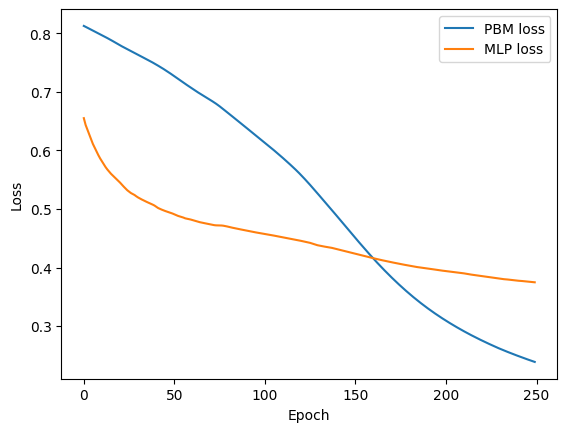

Accuracy (deep): 0.82
Epoch: 0,loss p: 0.80740, loss joint: 0.52373
Epoch: 0, acc joint: 0.68528
Epoch: 1,loss p: 0.80598, loss joint: 0.51656
Epoch: 1, acc joint: 0.69543
Epoch: 2,loss p: 0.80442, loss joint: 0.51327
Epoch: 2, acc joint: 0.70051
Epoch: 3,loss p: 0.80285, loss joint: 0.51033
Epoch: 3, acc joint: 0.70051
Epoch: 4,loss p: 0.80126, loss joint: 0.50653
Epoch: 4, acc joint: 0.70558
Epoch: 5,loss p: 0.79972, loss joint: 0.50259
Epoch: 5, acc joint: 0.70558
Epoch: 6,loss p: 0.79818, loss joint: 0.49861
Epoch: 6, acc joint: 0.70558
Epoch: 7,loss p: 0.79665, loss joint: 0.49559
Epoch: 7, acc joint: 0.70558
Epoch: 8,loss p: 0.79515, loss joint: 0.49233
Epoch: 8, acc joint: 0.70558
Epoch: 9,loss p: 0.79367, loss joint: 0.48905
Epoch: 9, acc joint: 0.71066
Epoch: 10,loss p: 0.79218, loss joint: 0.48588
Epoch: 10, acc joint: 0.71066
Epoch: 11,loss p: 0.79066, loss joint: 0.48204
Epoch: 11, acc joint: 0.71066
Epoch: 12,loss p: 0.78913, loss joint: 0.47857
Epoch: 12, acc joint: 0.710

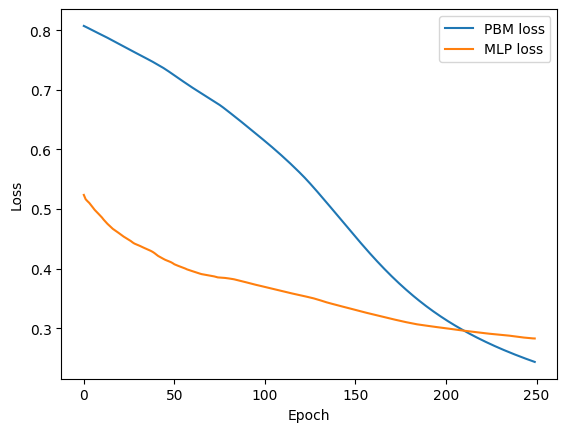

Accuracy (deep): 0.80
Epoch: 0,loss p: 0.84707, loss joint: 0.79803
Epoch: 0, acc joint: 0.52284
Epoch: 1,loss p: 0.84101, loss joint: 0.66923
Epoch: 1, acc joint: 0.52792
Epoch: 2,loss p: 0.83506, loss joint: 0.57969
Epoch: 2, acc joint: 0.53299
Epoch: 3,loss p: 0.82944, loss joint: 0.54957
Epoch: 3, acc joint: 0.54822
Epoch: 4,loss p: 0.82477, loss joint: 0.56718
Epoch: 4, acc joint: 0.55330
Epoch: 5,loss p: 0.82149, loss joint: 0.58783
Epoch: 5, acc joint: 0.57360
Epoch: 6,loss p: 0.81939, loss joint: 0.58206
Epoch: 6, acc joint: 0.60914
Epoch: 7,loss p: 0.81781, loss joint: 0.56439
Epoch: 7, acc joint: 0.64975
Epoch: 8,loss p: 0.81634, loss joint: 0.54995
Epoch: 8, acc joint: 0.68020
Epoch: 9,loss p: 0.81491, loss joint: 0.54043
Epoch: 9, acc joint: 0.72081
Epoch: 10,loss p: 0.81350, loss joint: 0.53429
Epoch: 10, acc joint: 0.72081
Epoch: 11,loss p: 0.81210, loss joint: 0.53033
Epoch: 11, acc joint: 0.72081
Epoch: 12,loss p: 0.81071, loss joint: 0.52708
Epoch: 12, acc joint: 0.725

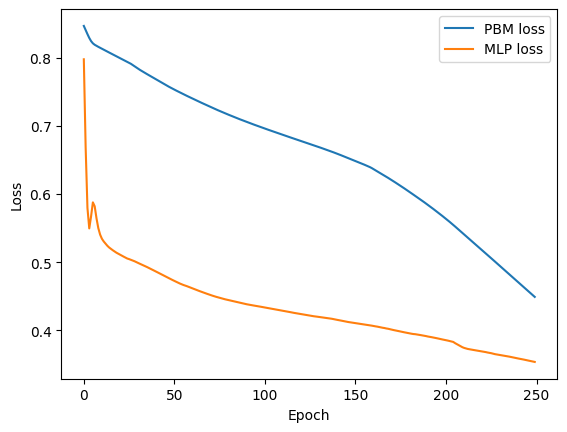

Accuracy (deep): 0.83
Joint: 81.48% (+/- 2.02%)


In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split

# train-test split: Hold out the test set for final model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
#print(y_train.shape)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores_joint = []
for train, test in kfold.split(X_train, y_train):
    # create model, train, and get accuracy
    lr_p = 0.00001
    lr_mlp = 0.00001
    alpha = 0.8
    model = Deep1()
    acc = model_train(model, X_train[train], X_train[test],y_train[train], y_train[test], alpha, lr_p, lr_mlp)

    print("Accuracy (deep): %.2f" % acc)
    cv_scores_joint.append(acc)


# evaluate the model
joint_acc = np.mean(cv_scores_joint)
joint_std = np.std(cv_scores_joint)

print("Joint: %.2f%% (+/- %.2f%%)" % (joint_acc*100, joint_std*100))


Epoch: 0,loss p: 0.79041, loss joint: 4.77043
Epoch: 0, acc joint: 0.37879
Epoch: 1,loss p: 0.78436, loss joint: 4.60642
Epoch: 1, acc joint: 0.37879
Epoch: 2,loss p: 0.77861, loss joint: 4.45549
Epoch: 2, acc joint: 0.37374
Epoch: 3,loss p: 0.77314, loss joint: 4.30388
Epoch: 3, acc joint: 0.35354
Epoch: 4,loss p: 0.76795, loss joint: 4.14932
Epoch: 4, acc joint: 0.37374
Epoch: 5,loss p: 0.76304, loss joint: 3.99004
Epoch: 5, acc joint: 0.39899
Epoch: 6,loss p: 0.75845, loss joint: 3.82206
Epoch: 6, acc joint: 0.41414
Epoch: 7,loss p: 0.75423, loss joint: 3.64107
Epoch: 7, acc joint: 0.40404
Epoch: 8,loss p: 0.75041, loss joint: 3.44283
Epoch: 8, acc joint: 0.41919
Epoch: 9,loss p: 0.74707, loss joint: 3.22671
Epoch: 9, acc joint: 0.42929
Epoch: 10,loss p: 0.74422, loss joint: 2.99684
Epoch: 10, acc joint: 0.42929
Epoch: 11,loss p: 0.74180, loss joint: 2.76016
Epoch: 11, acc joint: 0.42929
Epoch: 12,loss p: 0.73975, loss joint: 2.52516
Epoch: 12, acc joint: 0.43434
Epoch: 13,loss p: 0

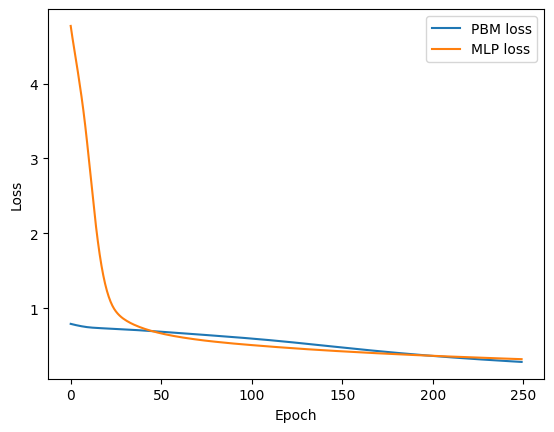

Accuracy (deep): 0.78
Epoch: 0,loss p: 0.65958, loss joint: 4.18439
Epoch: 0, acc joint: 0.49495
Epoch: 1,loss p: 0.66415, loss joint: 3.56147
Epoch: 1, acc joint: 0.49495
Epoch: 2,loss p: 0.66870, loss joint: 2.94427
Epoch: 2, acc joint: 0.49495
Epoch: 3,loss p: 0.67322, loss joint: 2.35557
Epoch: 3, acc joint: 0.51010
Epoch: 4,loss p: 0.67768, loss joint: 1.85213
Epoch: 4, acc joint: 0.56061
Epoch: 5,loss p: 0.68206, loss joint: 1.46996
Epoch: 5, acc joint: 0.59091
Epoch: 6,loss p: 0.68628, loss joint: 1.22566
Epoch: 6, acc joint: 0.64646
Epoch: 7,loss p: 0.69020, loss joint: 1.12059
Epoch: 7, acc joint: 0.64141
Epoch: 8,loss p: 0.69363, loss joint: 1.08510
Epoch: 8, acc joint: 0.67172
Epoch: 9,loss p: 0.69616, loss joint: 1.07287
Epoch: 9, acc joint: 0.67172
Epoch: 10,loss p: 0.69731, loss joint: 1.07195
Epoch: 10, acc joint: 0.71212
Epoch: 11,loss p: 0.69697, loss joint: 1.05987
Epoch: 11, acc joint: 0.72727
Epoch: 12,loss p: 0.69576, loss joint: 1.02944
Epoch: 12, acc joint: 0.747

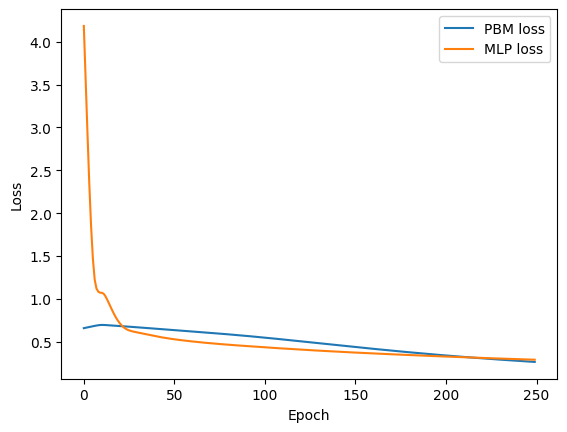

Accuracy (deep): 0.87
Epoch: 0,loss p: 0.65957, loss joint: 4.53614
Epoch: 0, acc joint: 0.48990
Epoch: 1,loss p: 0.66414, loss joint: 3.92653
Epoch: 1, acc joint: 0.49495
Epoch: 2,loss p: 0.66869, loss joint: 3.31983
Epoch: 2, acc joint: 0.49495
Epoch: 3,loss p: 0.67322, loss joint: 2.72741
Epoch: 3, acc joint: 0.51515
Epoch: 4,loss p: 0.67768, loss joint: 2.19262
Epoch: 4, acc joint: 0.53535
Epoch: 5,loss p: 0.68206, loss joint: 1.78276
Epoch: 5, acc joint: 0.56061
Epoch: 6,loss p: 0.68626, loss joint: 1.50349
Epoch: 6, acc joint: 0.61111
Epoch: 7,loss p: 0.69018, loss joint: 1.31917
Epoch: 7, acc joint: 0.59596
Epoch: 8,loss p: 0.69358, loss joint: 1.19467
Epoch: 8, acc joint: 0.64646
Epoch: 9,loss p: 0.69594, loss joint: 1.11081
Epoch: 9, acc joint: 0.66667
Epoch: 10,loss p: 0.69716, loss joint: 1.06571
Epoch: 10, acc joint: 0.66667
Epoch: 11,loss p: 0.69721, loss joint: 1.04311
Epoch: 11, acc joint: 0.68687
Epoch: 12,loss p: 0.69639, loss joint: 1.02077
Epoch: 12, acc joint: 0.696

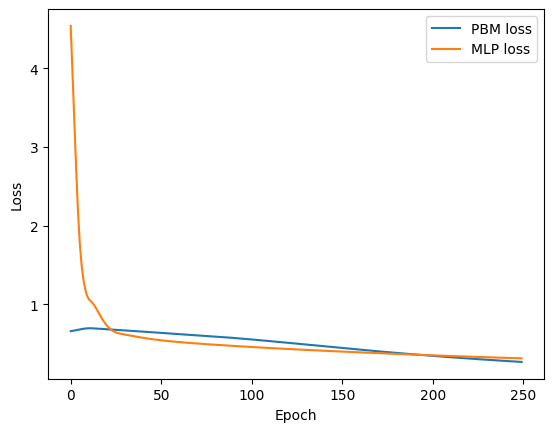

Accuracy (deep): 0.84
Epoch: 0,loss p: 0.65747, loss joint: 3.98838
Epoch: 0, acc joint: 0.49239
Epoch: 1,loss p: 0.66194, loss joint: 3.38721
Epoch: 1, acc joint: 0.50254
Epoch: 2,loss p: 0.66638, loss joint: 2.79101
Epoch: 2, acc joint: 0.50254
Epoch: 3,loss p: 0.67079, loss joint: 2.21830
Epoch: 3, acc joint: 0.51777
Epoch: 4,loss p: 0.67514, loss joint: 1.72637
Epoch: 4, acc joint: 0.56345
Epoch: 5,loss p: 0.67940, loss joint: 1.36946
Epoch: 5, acc joint: 0.58376
Epoch: 6,loss p: 0.68349, loss joint: 1.14765
Epoch: 6, acc joint: 0.62437
Epoch: 7,loss p: 0.68730, loss joint: 1.03678
Epoch: 7, acc joint: 0.60914
Epoch: 8,loss p: 0.69063, loss joint: 0.98711
Epoch: 8, acc joint: 0.63452
Epoch: 9,loss p: 0.69317, loss joint: 0.95687
Epoch: 9, acc joint: 0.65482
Epoch: 10,loss p: 0.69461, loss joint: 0.93816
Epoch: 10, acc joint: 0.63959
Epoch: 11,loss p: 0.69467, loss joint: 0.92161
Epoch: 11, acc joint: 0.63452
Epoch: 12,loss p: 0.69348, loss joint: 0.88897
Epoch: 12, acc joint: 0.614

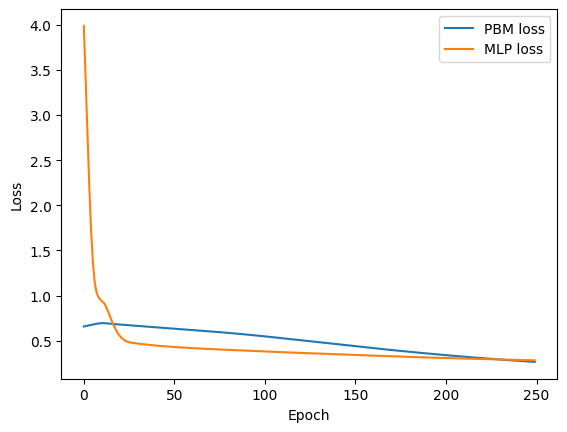

Accuracy (deep): 0.85
Epoch: 0,loss p: 0.78601, loss joint: 3.68229
Epoch: 0, acc joint: 0.42640
Epoch: 1,loss p: 0.78025, loss joint: 3.62963
Epoch: 1, acc joint: 0.42640
Epoch: 2,loss p: 0.77480, loss joint: 3.56657
Epoch: 2, acc joint: 0.41624
Epoch: 3,loss p: 0.76965, loss joint: 3.49457
Epoch: 3, acc joint: 0.40102
Epoch: 4,loss p: 0.76480, loss joint: 3.40994
Epoch: 4, acc joint: 0.38579
Epoch: 5,loss p: 0.76028, loss joint: 3.31349
Epoch: 5, acc joint: 0.40102
Epoch: 6,loss p: 0.75610, loss joint: 3.20485
Epoch: 6, acc joint: 0.42132
Epoch: 7,loss p: 0.75226, loss joint: 3.08388
Epoch: 7, acc joint: 0.43655
Epoch: 8,loss p: 0.74875, loss joint: 2.94929
Epoch: 8, acc joint: 0.44162
Epoch: 9,loss p: 0.74557, loss joint: 2.79997
Epoch: 9, acc joint: 0.44670
Epoch: 10,loss p: 0.74271, loss joint: 2.63561
Epoch: 10, acc joint: 0.43147
Epoch: 11,loss p: 0.74017, loss joint: 2.45790
Epoch: 11, acc joint: 0.43147
Epoch: 12,loss p: 0.73793, loss joint: 2.27100
Epoch: 12, acc joint: 0.461

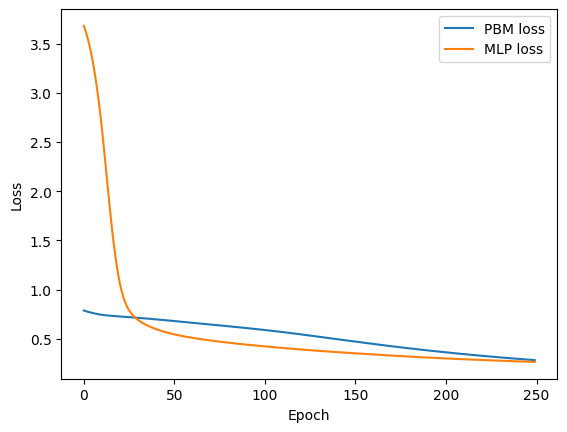

Accuracy (deep): 0.86
Joint: 84.01% (+/- 3.25%)


In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split

# train-test split: Hold out the test set for final model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
#print(y_train.shape)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores_joint = []
for train, test in kfold.split(X_train, y_train):
    # create model, train, and get accuracy
    lr_p = 0.00001
    lr_mlp = 0.00001
    alpha = 0.8
    model = Wide()
    acc = model_train(model, X_train[train], X_train[test],y_train[train], y_train[test], alpha, lr_p, lr_mlp)

    print("Accuracy (deep): %.2f" % acc)
    cv_scores_joint.append(acc)


# evaluate the model
joint_acc = np.mean(cv_scores_joint)
joint_std = np.std(cv_scores_joint)

print("Joint: %.2f%% (+/- %.2f%%)" % (joint_acc*100, joint_std*100))


In [ ]:
import pandas as pd

# Read data
data = pd.read_csv("GapSimLKLCrandsmall_20_30.csv")
print(data)
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]
print(X)
print(y)

           DV1       DV2       DV3          V          G1         G2  \
0    -0.039624 -0.704088 -6.842760  14.462760  162.190786  10.986211   
1     0.170688 -0.847344 -6.967728  14.587728  162.178594  11.059363   
2     0.240792 -1.033272 -7.135368  14.755368  162.138360  11.146841   
3     0.152400 -1.246632 -7.342632  14.962632  162.106966  11.261446   
4     0.006096 -1.420368 -7.516368  15.136368  162.101174  11.402873   
...        ...       ...       ...        ...         ...        ...   
2346 -0.871728  9.448800  5.599176   5.455920   10.931957  33.089393   
2347 -0.969264  9.217152  5.660136   5.620512   11.023397  32.158534   
2348 -1.054608  9.058656  5.562600   5.815584   11.126419  31.256630   
2349 -1.103376  9.015984  4.687824   5.980176   11.239805  30.364786   
2350 -1.109472  9.079992  4.593336   6.074664   11.353800  29.467454   

              G3        Dend     Carid  label_targetlane  
0     194.150894  156.831182 -1.513025                 0  
1     193.465094 

In [ ]:
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32)
print(X.shape)
print(y.shape)

torch.Size([2351, 9])
torch.Size([2351, 1])


In [ ]:
import torch.nn as nn
class PBM(nn.Module):
    def __init__(self):
        super(PBM, self).__init__()
        
        # Define the trainable parameters
        #self.interceptfo = nn.Parameter(torch.tensor(100., requires_grad = True))
        #self.interceptlead = nn.Parameter(torch.tensor(100., requires_grad = True))
        #self.interceptlag = nn.Parameter(torch.tensor(100., requires_grad = True))
        self.betaDV1fo = nn.Parameter(torch.tensor(0., requires_grad = True))
        self.betaDV2lead = nn.Parameter(torch.tensor(-0.0111, requires_grad = True))
        self.betaDV3lag = nn.Parameter(torch.tensor(0., requires_grad = True))
        self.betaV = nn.Parameter(torch.tensor(0.0159, requires_grad = True))
        self.betaG1 = nn.Parameter(torch.tensor(0.0921, requires_grad = True))
        self.betaG2 = nn.Parameter(torch.tensor(-0.0705, requires_grad = True))
        self.betaG3 = nn.Parameter(torch.tensor(-0.0488, requires_grad = True))
        
        self.alphaveh = nn.Parameter(torch.tensor(1., requires_grad = True))
        self.betaD = nn.Parameter(torch.tensor(0.0104, requires_grad = True))

        

    def forward(self, X):
        # Compute the utilities
        U_fo =  self.betaDV1fo * X[:, 0] + self.betaG1 * X[:, 4] + self.betaD * X[:, 7]
        U_lead =  self.betaDV2lead * X[:, 1] + self.betaG2 * X[:, 5] + self.betaD * X[:, 7]
        U_lag =  self.betaDV3lag * X[:, 2] + self.betaG3 * X[:, 6]  + self.betaD * X[:, 7]
        
        # Compute the gaps and probabilities
        Gfo = torch.log(X[:, 4]) - U_fo
        Glead = torch.log(X[:, 5]) - U_lead
        Glag = torch.log(X[:, 6]) - U_lag
        

        Gaplead = torch.distributions.normal.Normal(loc=0, scale=self.alphaveh).cdf(Glead / self.alphaveh)
        Gaplag = torch.distributions.normal.Normal(loc=0, scale=self.alphaveh).cdf(Glag / self.alphaveh)
        Gapfo = torch.distributions.normal.Normal(loc=0, scale=self.alphaveh).cdf(Gfo / self.alphaveh)
        P_LC = Gaplead * Gaplag * Gapfo
        
        # Generate the acceptance probabilities
        #rand_num = torch.rand(X.shape[0]).to(self.device)
        #P = torch.where(rand_num > P_LC, torch.ones_like(rand_num), torch.zeros_like(rand_num))
        
        return P_LC.reshape(-1, 1)


Epoch: 0,loss p: 0.82545, loss joint: 0.61326
Epoch: 0, acc joint: 0.52888
Epoch: 1,loss p: 0.82266, loss joint: 0.59756
Epoch: 1, acc joint: 0.56839
Epoch: 2,loss p: 0.82010, loss joint: 0.58778
Epoch: 2, acc joint: 0.58055
Epoch: 3,loss p: 0.81760, loss joint: 0.58023
Epoch: 3, acc joint: 0.60486
Epoch: 4,loss p: 0.81513, loss joint: 0.57377
Epoch: 4, acc joint: 0.62006
Epoch: 5,loss p: 0.81271, loss joint: 0.56798
Epoch: 5, acc joint: 0.64134
Epoch: 6,loss p: 0.81035, loss joint: 0.56310
Epoch: 6, acc joint: 0.64134
Epoch: 7,loss p: 0.80805, loss joint: 0.55897
Epoch: 7, acc joint: 0.64438
Epoch: 8,loss p: 0.80583, loss joint: 0.55579
Epoch: 8, acc joint: 0.64438
Epoch: 9,loss p: 0.80365, loss joint: 0.55308
Epoch: 9, acc joint: 0.64742
Epoch: 10,loss p: 0.80149, loss joint: 0.55062
Epoch: 10, acc joint: 0.65046
Epoch: 11,loss p: 0.79939, loss joint: 0.54831
Epoch: 11, acc joint: 0.65957
Epoch: 12,loss p: 0.79735, loss joint: 0.54623
Epoch: 12, acc joint: 0.67173
Epoch: 13,loss p: 0

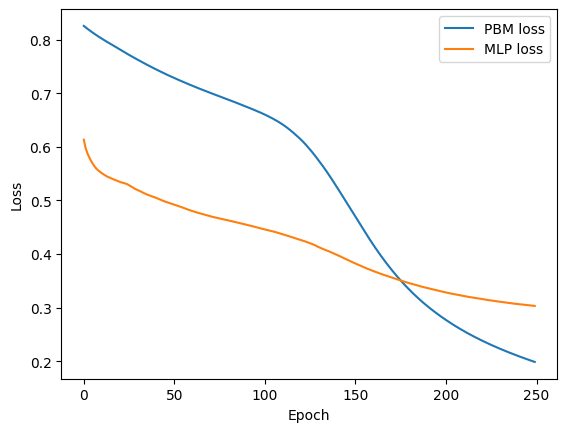

Accuracy (deep): 0.77
Epoch: 0,loss p: 0.82494, loss joint: 2.15528
Epoch: 0, acc joint: 0.51976
Epoch: 1,loss p: 0.82826, loss joint: 1.68020
Epoch: 1, acc joint: 0.51976
Epoch: 2,loss p: 0.83124, loss joint: 1.26722
Epoch: 2, acc joint: 0.51976
Epoch: 3,loss p: 0.83342, loss joint: 1.00932
Epoch: 3, acc joint: 0.53799
Epoch: 4,loss p: 0.83394, loss joint: 0.89455
Epoch: 4, acc joint: 0.46809
Epoch: 5,loss p: 0.83292, loss joint: 0.83370
Epoch: 5, acc joint: 0.43769
Epoch: 6,loss p: 0.83081, loss joint: 0.78568
Epoch: 6, acc joint: 0.47112
Epoch: 7,loss p: 0.82832, loss joint: 0.74581
Epoch: 7, acc joint: 0.49848
Epoch: 8,loss p: 0.82579, loss joint: 0.71314
Epoch: 8, acc joint: 0.54711
Epoch: 9,loss p: 0.82328, loss joint: 0.68791
Epoch: 9, acc joint: 0.59271
Epoch: 10,loss p: 0.82077, loss joint: 0.66903
Epoch: 10, acc joint: 0.61094
Epoch: 11,loss p: 0.81829, loss joint: 0.65494
Epoch: 11, acc joint: 0.62006
Epoch: 12,loss p: 0.81583, loss joint: 0.64381
Epoch: 12, acc joint: 0.644

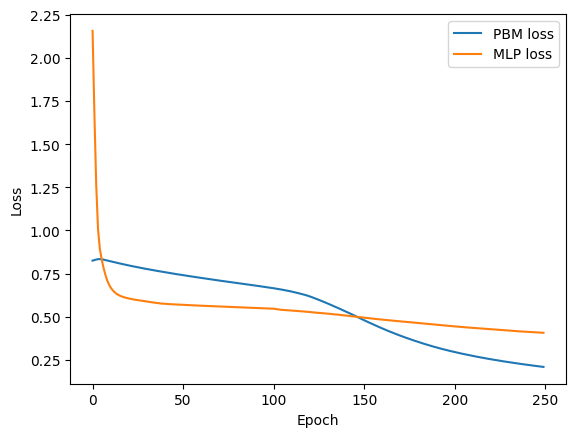

Accuracy (deep): 0.74
Epoch: 0,loss p: 0.82495, loss joint: 1.83791
Epoch: 0, acc joint: 0.51976
Epoch: 1,loss p: 0.82829, loss joint: 1.45205
Epoch: 1, acc joint: 0.51976
Epoch: 2,loss p: 0.83130, loss joint: 1.12400
Epoch: 2, acc joint: 0.51976
Epoch: 3,loss p: 0.83351, loss joint: 0.93589
Epoch: 3, acc joint: 0.50152
Epoch: 4,loss p: 0.83401, loss joint: 0.87707
Epoch: 4, acc joint: 0.45593
Epoch: 5,loss p: 0.83288, loss joint: 0.84865
Epoch: 5, acc joint: 0.40729
Epoch: 6,loss p: 0.83074, loss joint: 0.81372
Epoch: 6, acc joint: 0.44681
Epoch: 7,loss p: 0.82826, loss joint: 0.78048
Epoch: 7, acc joint: 0.48328
Epoch: 8,loss p: 0.82574, loss joint: 0.75283
Epoch: 8, acc joint: 0.56231
Epoch: 9,loss p: 0.82323, loss joint: 0.73184
Epoch: 9, acc joint: 0.59878
Epoch: 10,loss p: 0.82074, loss joint: 0.71636
Epoch: 10, acc joint: 0.62310
Epoch: 11,loss p: 0.81828, loss joint: 0.70480
Epoch: 11, acc joint: 0.60486
Epoch: 12,loss p: 0.81583, loss joint: 0.69572
Epoch: 12, acc joint: 0.632

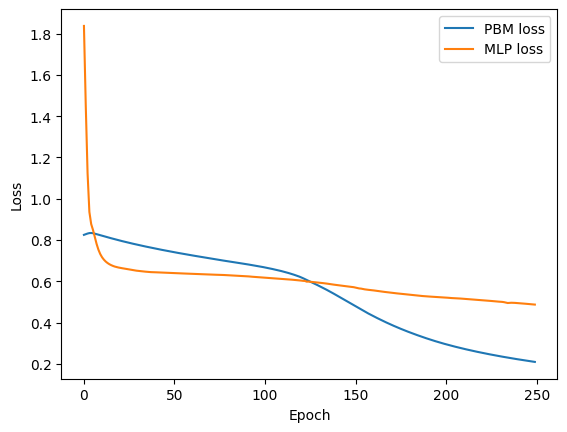

Accuracy (deep): 0.79
Epoch: 0,loss p: 0.82495, loss joint: 1.99192
Epoch: 0, acc joint: 0.51976
Epoch: 1,loss p: 0.82832, loss joint: 1.52922
Epoch: 1, acc joint: 0.51976
Epoch: 2,loss p: 0.83134, loss joint: 1.13424
Epoch: 2, acc joint: 0.51976
Epoch: 3,loss p: 0.83351, loss joint: 0.89434
Epoch: 3, acc joint: 0.53495
Epoch: 4,loss p: 0.83404, loss joint: 0.80793
Epoch: 4, acc joint: 0.46201
Epoch: 5,loss p: 0.83292, loss joint: 0.77597
Epoch: 5, acc joint: 0.44073
Epoch: 6,loss p: 0.83080, loss joint: 0.74854
Epoch: 6, acc joint: 0.52888
Epoch: 7,loss p: 0.82831, loss joint: 0.72471
Epoch: 7, acc joint: 0.55623
Epoch: 8,loss p: 0.82578, loss joint: 0.70518
Epoch: 8, acc joint: 0.58967
Epoch: 9,loss p: 0.82326, loss joint: 0.69075
Epoch: 9, acc joint: 0.63526
Epoch: 10,loss p: 0.82077, loss joint: 0.68079
Epoch: 10, acc joint: 0.65350
Epoch: 11,loss p: 0.81829, loss joint: 0.67398
Epoch: 11, acc joint: 0.65653
Epoch: 12,loss p: 0.81583, loss joint: 0.66841
Epoch: 12, acc joint: 0.653

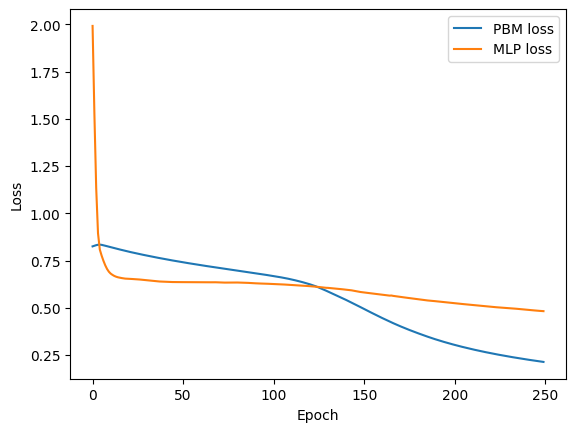

Accuracy (deep): 0.81
Epoch: 0,loss p: 0.82500, loss joint: 2.15817
Epoch: 0, acc joint: 0.52280
Epoch: 1,loss p: 0.82840, loss joint: 1.69041
Epoch: 1, acc joint: 0.52280
Epoch: 2,loss p: 0.83145, loss joint: 1.28344
Epoch: 2, acc joint: 0.51976
Epoch: 3,loss p: 0.83367, loss joint: 1.02725
Epoch: 3, acc joint: 0.49848
Epoch: 4,loss p: 0.83420, loss joint: 0.91925
Epoch: 4, acc joint: 0.47112
Epoch: 5,loss p: 0.83302, loss joint: 0.86596
Epoch: 5, acc joint: 0.47416
Epoch: 6,loss p: 0.83083, loss joint: 0.82177
Epoch: 6, acc joint: 0.50760
Epoch: 7,loss p: 0.82832, loss joint: 0.78381
Epoch: 7, acc joint: 0.54103
Epoch: 8,loss p: 0.82578, loss joint: 0.75269
Epoch: 8, acc joint: 0.57751
Epoch: 9,loss p: 0.82325, loss joint: 0.72783
Epoch: 9, acc joint: 0.61702
Epoch: 10,loss p: 0.82075, loss joint: 0.70798
Epoch: 10, acc joint: 0.63830
Epoch: 11,loss p: 0.81826, loss joint: 0.69288
Epoch: 11, acc joint: 0.63830
Epoch: 12,loss p: 0.81580, loss joint: 0.68104
Epoch: 12, acc joint: 0.671

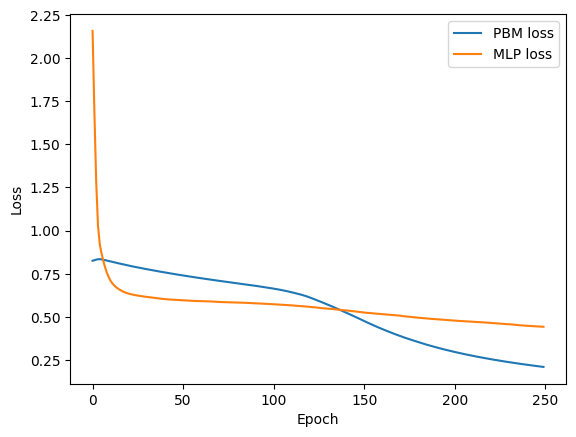

Accuracy (deep): 0.79
Joint: 78.05% (+/- 2.50%)


In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split

# train-test split: Hold out the test set for final model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
#print(y_train.shape)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores_joint = []
for train, test in kfold.split(X_train, y_train):
    # create model, train, and get accuracy
    lr_p = 0.00001
    lr_mlp = 0.00001
    alpha = 0.8
    model = Deep()
    acc = model_train(model, X_train[train], X_train[test],y_train[train], y_train[test], alpha, lr_p, lr_mlp)

    print("Accuracy (deep): %.2f" % acc)
    cv_scores_joint.append(acc)


# evaluate the model
joint_acc = np.mean(cv_scores_joint)
joint_std = np.std(cv_scores_joint)

print("Joint: %.2f%% (+/- %.2f%%)" % (joint_acc*100, joint_std*100))


Epoch: 0,loss p: 0.82444, loss joint: 2.37756
Epoch: 0, acc joint: 0.51368
Epoch: 1,loss p: 0.82716, loss joint: 1.83736
Epoch: 1, acc joint: 0.51368
Epoch: 2,loss p: 0.82954, loss joint: 1.36071
Epoch: 2, acc joint: 0.51672
Epoch: 3,loss p: 0.83119, loss joint: 1.04209
Epoch: 3, acc joint: 0.51976
Epoch: 4,loss p: 0.83138, loss joint: 0.89219
Epoch: 4, acc joint: 0.46809
Epoch: 5,loss p: 0.82998, loss joint: 0.81976
Epoch: 5, acc joint: 0.37386
Epoch: 6,loss p: 0.82755, loss joint: 0.76875
Epoch: 6, acc joint: 0.45593
Epoch: 7,loss p: 0.82483, loss joint: 0.72478
Epoch: 7, acc joint: 0.47112
Epoch: 8,loss p: 0.82207, loss joint: 0.69116
Epoch: 8, acc joint: 0.49848
Epoch: 9,loss p: 0.81934, loss joint: 0.66644
Epoch: 9, acc joint: 0.51976
Epoch: 10,loss p: 0.81666, loss joint: 0.64795
Epoch: 10, acc joint: 0.56839
Epoch: 11,loss p: 0.81405, loss joint: 0.63385
Epoch: 11, acc joint: 0.58055
Epoch: 12,loss p: 0.81148, loss joint: 0.62269
Epoch: 12, acc joint: 0.57751
Epoch: 13,loss p: 0

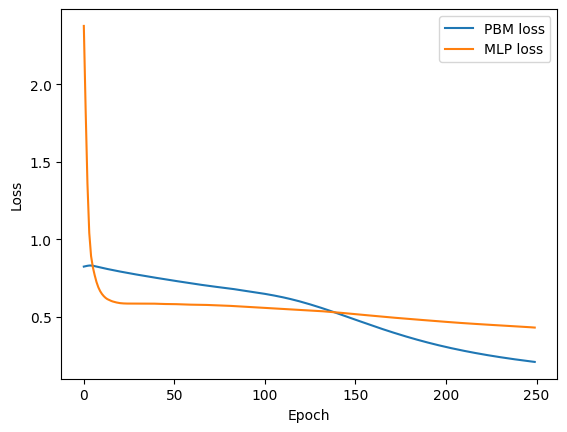

Accuracy (deep): 0.74
Epoch: 0,loss p: 0.82442, loss joint: 2.26379
Epoch: 0, acc joint: 0.51368
Epoch: 1,loss p: 0.82715, loss joint: 1.76350
Epoch: 1, acc joint: 0.51368
Epoch: 2,loss p: 0.82955, loss joint: 1.31698
Epoch: 2, acc joint: 0.51064
Epoch: 3,loss p: 0.83124, loss joint: 1.00463
Epoch: 3, acc joint: 0.49848
Epoch: 4,loss p: 0.83145, loss joint: 0.85748
Epoch: 4, acc joint: 0.43465
Epoch: 5,loss p: 0.83003, loss joint: 0.79460
Epoch: 5, acc joint: 0.40426
Epoch: 6,loss p: 0.82758, loss joint: 0.75220
Epoch: 6, acc joint: 0.49848
Epoch: 7,loss p: 0.82483, loss joint: 0.71771
Epoch: 7, acc joint: 0.54407
Epoch: 8,loss p: 0.82204, loss joint: 0.69043
Epoch: 8, acc joint: 0.56535
Epoch: 9,loss p: 0.81930, loss joint: 0.67028
Epoch: 9, acc joint: 0.61094
Epoch: 10,loss p: 0.81663, loss joint: 0.65524
Epoch: 10, acc joint: 0.64134
Epoch: 11,loss p: 0.81403, loss joint: 0.64407
Epoch: 11, acc joint: 0.65653
Epoch: 12,loss p: 0.81149, loss joint: 0.63573
Epoch: 12, acc joint: 0.671

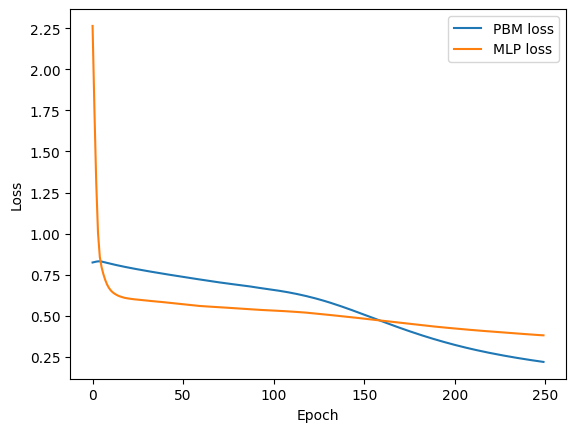

Accuracy (deep): 0.78
Epoch: 0,loss p: 0.82449, loss joint: 3.15811
Epoch: 0, acc joint: 0.51672
Epoch: 1,loss p: 0.82727, loss joint: 2.42036
Epoch: 1, acc joint: 0.51672
Epoch: 2,loss p: 0.82968, loss joint: 1.74190
Epoch: 2, acc joint: 0.51368
Epoch: 3,loss p: 0.83140, loss joint: 1.21961
Epoch: 3, acc joint: 0.50760
Epoch: 4,loss p: 0.83156, loss joint: 0.93470
Epoch: 4, acc joint: 0.48632
Epoch: 5,loss p: 0.83006, loss joint: 0.80741
Epoch: 5, acc joint: 0.44073
Epoch: 6,loss p: 0.82760, loss joint: 0.74323
Epoch: 6, acc joint: 0.50760
Epoch: 7,loss p: 0.82488, loss joint: 0.70195
Epoch: 7, acc joint: 0.52584
Epoch: 8,loss p: 0.82213, loss joint: 0.67251
Epoch: 8, acc joint: 0.55319
Epoch: 9,loss p: 0.81943, loss joint: 0.65126
Epoch: 9, acc joint: 0.58359
Epoch: 10,loss p: 0.81681, loss joint: 0.63519
Epoch: 10, acc joint: 0.61702
Epoch: 11,loss p: 0.81427, loss joint: 0.62269
Epoch: 11, acc joint: 0.60790
Epoch: 12,loss p: 0.81179, loss joint: 0.61283
Epoch: 12, acc joint: 0.623

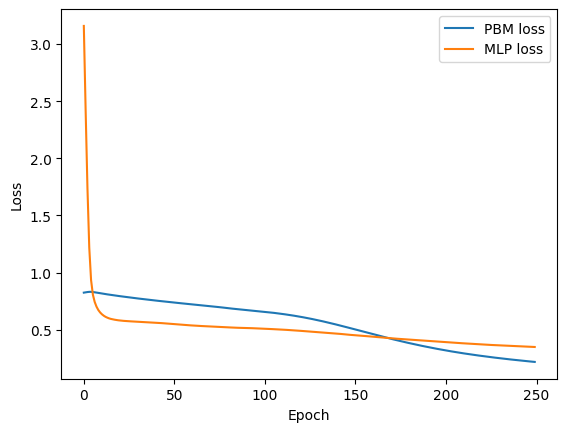

Accuracy (deep): 0.79
Epoch: 0,loss p: 0.82445, loss joint: 2.35006
Epoch: 0, acc joint: 0.51672
Epoch: 1,loss p: 0.82720, loss joint: 1.82122
Epoch: 1, acc joint: 0.51672
Epoch: 2,loss p: 0.82958, loss joint: 1.35805
Epoch: 2, acc joint: 0.52280
Epoch: 3,loss p: 0.83128, loss joint: 1.05355
Epoch: 3, acc joint: 0.48936
Epoch: 4,loss p: 0.83149, loss joint: 0.92182
Epoch: 4, acc joint: 0.48024
Epoch: 5,loss p: 0.83006, loss joint: 0.85935
Epoch: 5, acc joint: 0.46201
Epoch: 6,loss p: 0.82761, loss joint: 0.80967
Epoch: 6, acc joint: 0.50760
Epoch: 7,loss p: 0.82486, loss joint: 0.76369
Epoch: 7, acc joint: 0.51672
Epoch: 8,loss p: 0.82209, loss joint: 0.72438
Epoch: 8, acc joint: 0.53191
Epoch: 9,loss p: 0.81934, loss joint: 0.69317
Epoch: 9, acc joint: 0.58055
Epoch: 10,loss p: 0.81663, loss joint: 0.66849
Epoch: 10, acc joint: 0.59878
Epoch: 11,loss p: 0.81399, loss joint: 0.64901
Epoch: 11, acc joint: 0.60182
Epoch: 12,loss p: 0.81140, loss joint: 0.63291
Epoch: 12, acc joint: 0.607

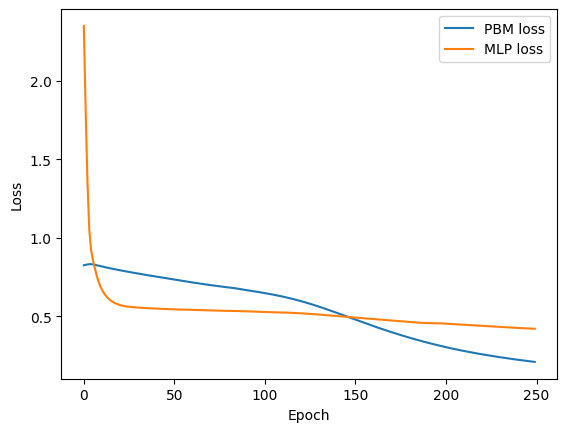

Accuracy (deep): 0.76
Epoch: 0,loss p: 0.82446, loss joint: 2.54575
Epoch: 0, acc joint: 0.51672
Epoch: 1,loss p: 0.82718, loss joint: 2.01142
Epoch: 1, acc joint: 0.51672
Epoch: 2,loss p: 0.82956, loss joint: 1.52411
Epoch: 2, acc joint: 0.51976
Epoch: 3,loss p: 0.83125, loss joint: 1.17014
Epoch: 3, acc joint: 0.51368
Epoch: 4,loss p: 0.83146, loss joint: 0.97916
Epoch: 4, acc joint: 0.48328
Epoch: 5,loss p: 0.82997, loss joint: 0.88259
Epoch: 5, acc joint: 0.46201
Epoch: 6,loss p: 0.82752, loss joint: 0.81542
Epoch: 6, acc joint: 0.52888
Epoch: 7,loss p: 0.82479, loss joint: 0.75963
Epoch: 7, acc joint: 0.56839
Epoch: 8,loss p: 0.82204, loss joint: 0.71543
Epoch: 8, acc joint: 0.57751
Epoch: 9,loss p: 0.81935, loss joint: 0.68265
Epoch: 9, acc joint: 0.60486
Epoch: 10,loss p: 0.81671, loss joint: 0.65750
Epoch: 10, acc joint: 0.62918
Epoch: 11,loss p: 0.81413, loss joint: 0.63786
Epoch: 11, acc joint: 0.63526
Epoch: 12,loss p: 0.81158, loss joint: 0.62220
Epoch: 12, acc joint: 0.671

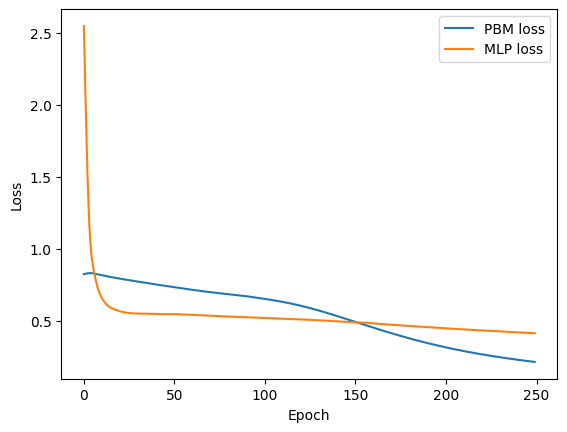

Accuracy (deep): 0.76
Joint: 76.35% (+/- 1.95%)


In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split

# train-test split: Hold out the test set for final model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
#print(y_train.shape)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores_joint = []
for train, test in kfold.split(X_train, y_train):
    # create model, train, and get accuracy
    lr_p = 0.00001
    lr_mlp = 0.00001
    alpha = 0.8
    model = Deep1()
    acc = model_train(model, X_train[train], X_train[test],y_train[train], y_train[test], alpha, lr_p, lr_mlp)

    print("Accuracy (deep): %.2f" % acc)
    cv_scores_joint.append(acc)


# evaluate the model
joint_acc = np.mean(cv_scores_joint)
joint_std = np.std(cv_scores_joint)

print("Joint: %.2f%% (+/- %.2f%%)" % (joint_acc*100, joint_std*100))


Epoch: 0,loss p: 0.93240, loss joint: 31.13807
Epoch: 0, acc joint: 0.48632
Epoch: 1,loss p: 0.91839, loss joint: 30.93685
Epoch: 1, acc joint: 0.48632
Epoch: 2,loss p: 0.90445, loss joint: 22.17089
Epoch: 2, acc joint: 0.48632
Epoch: 3,loss p: 0.89094, loss joint: 8.90214
Epoch: 3, acc joint: 0.48632
Epoch: 4,loss p: 0.87817, loss joint: 3.64191
Epoch: 4, acc joint: 0.48936
Epoch: 5,loss p: 0.86605, loss joint: 2.45812
Epoch: 5, acc joint: 0.48328
Epoch: 6,loss p: 0.85427, loss joint: 1.42630
Epoch: 6, acc joint: 0.53799
Epoch: 7,loss p: 0.84279, loss joint: 0.83147
Epoch: 7, acc joint: 0.54103
Epoch: 8,loss p: 0.83532, loss joint: 0.75537
Epoch: 8, acc joint: 0.61094
Epoch: 9,loss p: 0.83054, loss joint: 0.73341
Epoch: 9, acc joint: 0.61398
Epoch: 10,loss p: 0.82550, loss joint: 0.72346
Epoch: 10, acc joint: 0.57447
Epoch: 11,loss p: 0.82059, loss joint: 0.71724
Epoch: 11, acc joint: 0.55319
Epoch: 12,loss p: 0.81581, loss joint: 0.71262
Epoch: 12, acc joint: 0.54711
Epoch: 13,loss p

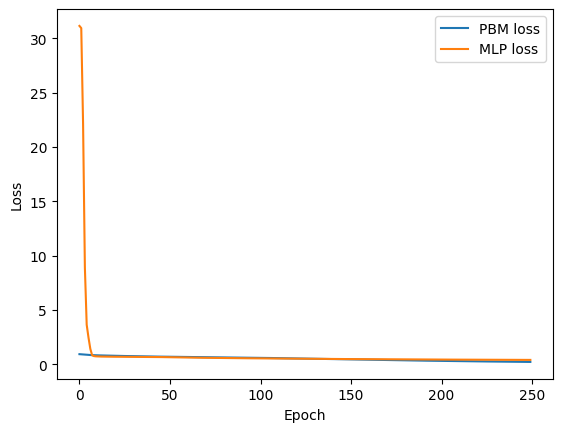

Accuracy (deep): 0.73
Epoch: 0,loss p: 0.93245, loss joint: 35.70187
Epoch: 0, acc joint: 0.48632
Epoch: 1,loss p: 0.91844, loss joint: 35.59788
Epoch: 1, acc joint: 0.48632
Epoch: 2,loss p: 0.90456, loss joint: 31.21190
Epoch: 2, acc joint: 0.48632
Epoch: 3,loss p: 0.89103, loss joint: 14.10073
Epoch: 3, acc joint: 0.48632
Epoch: 4,loss p: 0.87825, loss joint: 4.71165
Epoch: 4, acc joint: 0.48632
Epoch: 5,loss p: 0.86613, loss joint: 3.34267
Epoch: 5, acc joint: 0.49848
Epoch: 6,loss p: 0.85439, loss joint: 2.08104
Epoch: 6, acc joint: 0.55623
Epoch: 7,loss p: 0.84300, loss joint: 1.11874
Epoch: 7, acc joint: 0.55927
Epoch: 8,loss p: 0.83605, loss joint: 0.88271
Epoch: 8, acc joint: 0.59878
Epoch: 9,loss p: 0.83187, loss joint: 0.84200
Epoch: 9, acc joint: 0.57143
Epoch: 10,loss p: 0.82742, loss joint: 0.81474
Epoch: 10, acc joint: 0.55927
Epoch: 11,loss p: 0.82294, loss joint: 0.79540
Epoch: 11, acc joint: 0.55927
Epoch: 12,loss p: 0.81847, loss joint: 0.78029
Epoch: 12, acc joint: 0

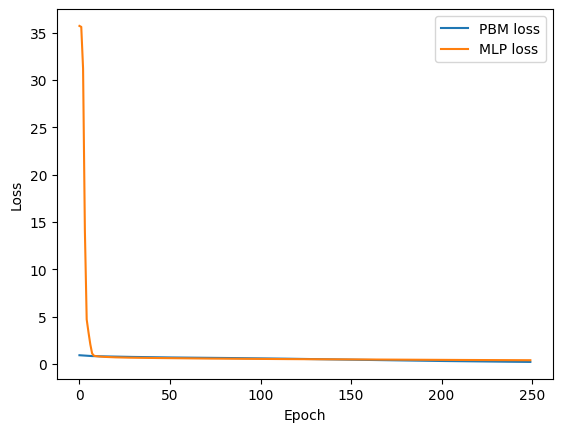

Accuracy (deep): 0.76
Epoch: 0,loss p: 0.93210, loss joint: 31.13481
Epoch: 0, acc joint: 0.48632
Epoch: 1,loss p: 0.91783, loss joint: 30.93087
Epoch: 1, acc joint: 0.48632
Epoch: 2,loss p: 0.90382, loss joint: 30.73155
Epoch: 2, acc joint: 0.48632
Epoch: 3,loss p: 0.89029, loss joint: 9.34259
Epoch: 3, acc joint: 0.48632
Epoch: 4,loss p: 0.87753, loss joint: 4.03761
Epoch: 4, acc joint: 0.49544
Epoch: 5,loss p: 0.86542, loss joint: 2.79672
Epoch: 5, acc joint: 0.50152
Epoch: 6,loss p: 0.85363, loss joint: 1.68510
Epoch: 6, acc joint: 0.58055
Epoch: 7,loss p: 0.84262, loss joint: 0.88091
Epoch: 7, acc joint: 0.57751
Epoch: 8,loss p: 0.83596, loss joint: 0.72160
Epoch: 8, acc joint: 0.59574
Epoch: 9,loss p: 0.83150, loss joint: 0.69867
Epoch: 9, acc joint: 0.58663
Epoch: 10,loss p: 0.82679, loss joint: 0.68606
Epoch: 10, acc joint: 0.58663
Epoch: 11,loss p: 0.82208, loss joint: 0.67844
Epoch: 11, acc joint: 0.59574
Epoch: 12,loss p: 0.81741, loss joint: 0.67272
Epoch: 12, acc joint: 0.

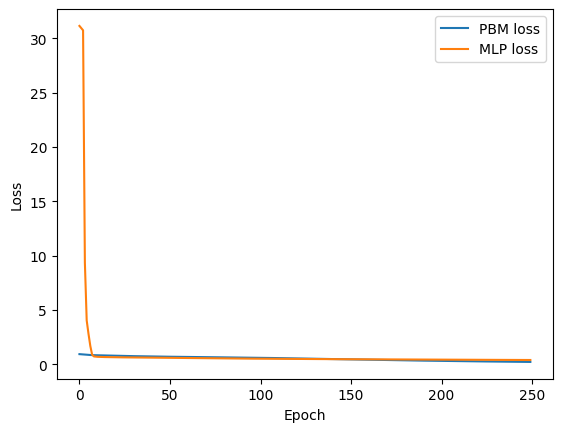

Accuracy (deep): 0.76
Epoch: 0,loss p: 0.93229, loss joint: 41.13783
Epoch: 0, acc joint: 0.48632
Epoch: 1,loss p: 0.91824, loss joint: 40.93727
Epoch: 1, acc joint: 0.48632
Epoch: 2,loss p: 0.90432, loss joint: 36.45623
Epoch: 2, acc joint: 0.48632
Epoch: 3,loss p: 0.89078, loss joint: 14.92394
Epoch: 3, acc joint: 0.48632
Epoch: 4,loss p: 0.87802, loss joint: 5.26505
Epoch: 4, acc joint: 0.48936
Epoch: 5,loss p: 0.86594, loss joint: 3.67315
Epoch: 5, acc joint: 0.50152
Epoch: 6,loss p: 0.85421, loss joint: 2.21902
Epoch: 6, acc joint: 0.57447
Epoch: 7,loss p: 0.84279, loss joint: 1.04910
Epoch: 7, acc joint: 0.55927
Epoch: 8,loss p: 0.83502, loss joint: 0.71322
Epoch: 8, acc joint: 0.56231
Epoch: 9,loss p: 0.83062, loss joint: 0.69362
Epoch: 9, acc joint: 0.57751
Epoch: 10,loss p: 0.82596, loss joint: 0.67117
Epoch: 10, acc joint: 0.55927
Epoch: 11,loss p: 0.82130, loss joint: 0.65488
Epoch: 11, acc joint: 0.53799
Epoch: 12,loss p: 0.81668, loss joint: 0.64172
Epoch: 12, acc joint: 0

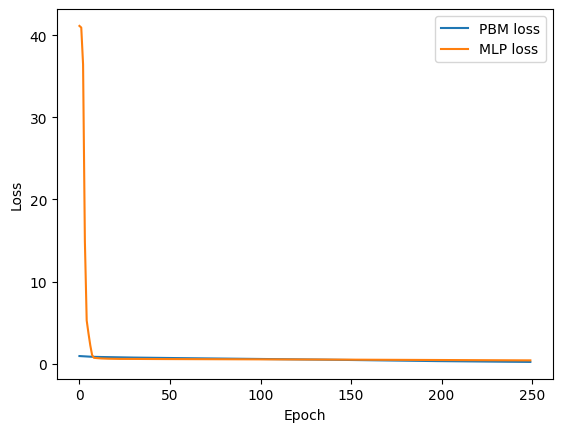

Accuracy (deep): 0.77
Epoch: 0,loss p: 0.93228, loss joint: 31.09645
Epoch: 0, acc joint: 0.48632
Epoch: 1,loss p: 0.91827, loss joint: 30.89197
Epoch: 1, acc joint: 0.48632
Epoch: 2,loss p: 0.90439, loss joint: 22.12506
Epoch: 2, acc joint: 0.48632
Epoch: 3,loss p: 0.89093, loss joint: 8.82962
Epoch: 3, acc joint: 0.48632
Epoch: 4,loss p: 0.87811, loss joint: 3.58024
Epoch: 4, acc joint: 0.48632
Epoch: 5,loss p: 0.86595, loss joint: 2.39275
Epoch: 5, acc joint: 0.49240
Epoch: 6,loss p: 0.85411, loss joint: 1.35119
Epoch: 6, acc joint: 0.54407
Epoch: 7,loss p: 0.84259, loss joint: 0.71365
Epoch: 7, acc joint: 0.54103
Epoch: 8,loss p: 0.83596, loss joint: 0.65439
Epoch: 8, acc joint: 0.59271
Epoch: 9,loss p: 0.83169, loss joint: 0.64892
Epoch: 9, acc joint: 0.57143
Epoch: 10,loss p: 0.82720, loss joint: 0.64780
Epoch: 10, acc joint: 0.58055
Epoch: 11,loss p: 0.82260, loss joint: 0.64704
Epoch: 11, acc joint: 0.58055
Epoch: 12,loss p: 0.81801, loss joint: 0.64541
Epoch: 12, acc joint: 0.

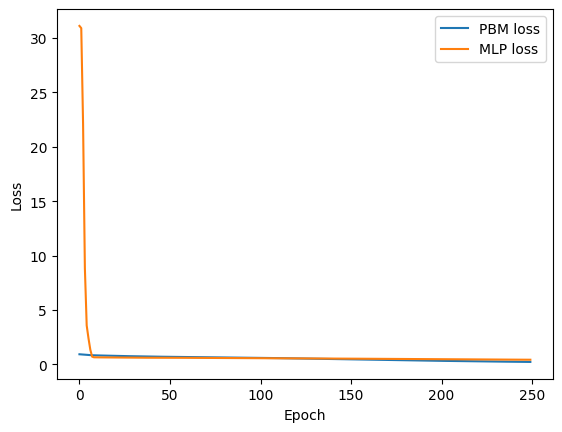

Accuracy (deep): 0.75
Joint: 75.20% (+/- 1.41%)


In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split

# train-test split: Hold out the test set for final model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
#print(y_train.shape)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores_joint = []
for train, test in kfold.split(X_train, y_train):
    # create model, train, and get accuracy
    lr_p = 0.00001
    lr_mlp = 0.00001
    alpha = 0.8
    model = Wide()
    acc = model_train(model, X_train[train], X_train[test],y_train[train], y_train[test], alpha, lr_p, lr_mlp)

    print("Accuracy (deep): %.2f" % acc)
    cv_scores_joint.append(acc)


# evaluate the model
joint_acc = np.mean(cv_scores_joint)
joint_std = np.std(cv_scores_joint)

print("Joint: %.2f%% (+/- %.2f%%)" % (joint_acc*100, joint_std*100))


In [ ]:
import pandas as pd

# Read data
data = pd.read_csv("GapSimLKLCrandsmall_20_40.csv")
print(data)
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]
print(X)
print(y)

         DV1     DV2     DV3        V       G1       G2        G3      Dend  \
0     5.6510 -0.0180 -1.8500  12.0180  51.8584   5.6738  189.2200  170.6648   
1     5.4410  0.0740 -1.7310  12.0270  51.2894   5.6618  189.0500  171.8648   
2     5.0990  0.0850 -1.6550  12.0610  50.7544   5.6498  188.8700  173.0648   
3     4.7120  0.0670 -1.5520  12.1040  50.2644   5.6398  188.7200  174.2748   
4     0.0400  0.0580 -1.4930  12.1400   5.6348  17.3586  188.5700  175.4848   
...      ...     ...     ...      ...      ...      ...       ...       ...   
3057 -0.7955 -4.8341 -0.7193   9.4061  36.9568  17.3330  173.3328  176.5948   
3058 -0.9632 -5.0170 -0.4023   9.5890  37.0358  17.8170  173.2828  177.5448   
3059 -1.1979 -5.2578 -0.2713   9.8298  37.1398  18.3290  173.2528  178.5048   
3060 -1.4329 -5.5020 -0.3052  10.0740  37.2758  18.8690  173.2328  179.5048   
3061 -1.6306 -5.7210 -0.4541  10.2930  37.4328  19.4320  173.2028  180.5248   

         Carid  label_targetlane  
0     1.555776  

In [ ]:
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32)
print(X.shape)
print(y.shape)

torch.Size([3062, 9])
torch.Size([3062, 1])


In [ ]:
import torch.nn as nn
class PBM(nn.Module):
    def __init__(self):
        super(PBM, self).__init__()
        
        # Define the trainable parameters
        #self.interceptfo = nn.Parameter(torch.tensor(100., requires_grad = True))
        #self.interceptlead = nn.Parameter(torch.tensor(100., requires_grad = True))
        #self.interceptlag = nn.Parameter(torch.tensor(100., requires_grad = True))
        self.betaDV1fo = nn.Parameter(torch.tensor(0.0418, requires_grad = True))
        self.betaDV2lead = nn.Parameter(torch.tensor(-0.4001, requires_grad = True))
        self.betaDV3lag = nn.Parameter(torch.tensor(-0.0188, requires_grad = True))
        self.betaV = nn.Parameter(torch.tensor(-0.0367, requires_grad = True))
        self.betaG1 = nn.Parameter(torch.tensor(0.0498, requires_grad = True))
        self.betaG2 = nn.Parameter(torch.tensor(0.0301, requires_grad = True))
        self.betaG3 = nn.Parameter(torch.tensor(-0.0121, requires_grad = True))
        
        self.alphaveh = nn.Parameter(torch.tensor(1., requires_grad = True))
        self.betaD = nn.Parameter(torch.tensor(-0.0021, requires_grad = True))

        

    def forward(self, X):
        # Compute the utilities
        U_fo =  self.betaDV1fo * X[:, 0] + self.betaG1 * X[:, 4] + self.betaD * X[:, 7]
        U_lead =  self.betaDV2lead * X[:, 1] + self.betaG2 * X[:, 5] + self.betaD * X[:, 7]
        U_lag =  self.betaDV3lag * X[:, 2] + self.betaG3 * X[:, 6]  + self.betaD * X[:, 7]
        
        # Compute the gaps and probabilities
        Gfo = torch.log(X[:, 4]) - U_fo
        Glead = torch.log(X[:, 5]) - U_lead
        Glag = torch.log(X[:, 6]) - U_lag
        

        Gaplead = torch.distributions.normal.Normal(loc=0, scale=self.alphaveh).cdf(Glead / self.alphaveh)
        Gaplag = torch.distributions.normal.Normal(loc=0, scale=self.alphaveh).cdf(Glag / self.alphaveh)
        Gapfo = torch.distributions.normal.Normal(loc=0, scale=self.alphaveh).cdf(Gfo / self.alphaveh)
        P_LC = Gaplead * Gaplag * Gapfo
        
        # Generate the acceptance probabilities
        #rand_num = torch.rand(X.shape[0]).to(self.device)
        #P = torch.where(rand_num > P_LC, torch.ones_like(rand_num), torch.zeros_like(rand_num))
        
        return P_LC.reshape(-1, 1)


Epoch: 0,loss p: 0.76341, loss joint: 2.42445
Epoch: 0, acc joint: 0.48485
Epoch: 1,loss p: 0.76630, loss joint: 1.78952
Epoch: 1, acc joint: 0.48485
Epoch: 2,loss p: 0.76859, loss joint: 1.23907
Epoch: 2, acc joint: 0.46154
Epoch: 3,loss p: 0.76935, loss joint: 0.91938
Epoch: 3, acc joint: 0.42657
Epoch: 4,loss p: 0.76824, loss joint: 0.81246
Epoch: 4, acc joint: 0.52214
Epoch: 5,loss p: 0.76630, loss joint: 0.76656
Epoch: 5, acc joint: 0.58275
Epoch: 6,loss p: 0.76414, loss joint: 0.73635
Epoch: 6, acc joint: 0.62704
Epoch: 7,loss p: 0.76202, loss joint: 0.71639
Epoch: 7, acc joint: 0.62937
Epoch: 8,loss p: 0.75996, loss joint: 0.70420
Epoch: 8, acc joint: 0.65035
Epoch: 9,loss p: 0.75795, loss joint: 0.69560
Epoch: 9, acc joint: 0.64569
Epoch: 10,loss p: 0.75598, loss joint: 0.68908
Epoch: 10, acc joint: 0.64569
Epoch: 11,loss p: 0.75405, loss joint: 0.68324
Epoch: 11, acc joint: 0.65501
Epoch: 12,loss p: 0.75215, loss joint: 0.67854
Epoch: 12, acc joint: 0.65734
Epoch: 13,loss p: 0

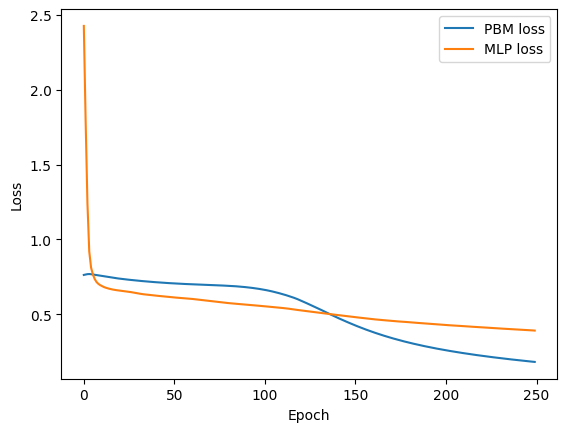

Accuracy (deep): 0.78
Epoch: 0,loss p: 0.76885, loss joint: 0.88142
Epoch: 0, acc joint: 0.48718
Epoch: 1,loss p: 0.76948, loss joint: 0.74322
Epoch: 1, acc joint: 0.48718
Epoch: 2,loss p: 0.76915, loss joint: 0.68232
Epoch: 2, acc joint: 0.51515
Epoch: 3,loss p: 0.76771, loss joint: 0.66566
Epoch: 3, acc joint: 0.48951
Epoch: 4,loss p: 0.76556, loss joint: 0.65866
Epoch: 4, acc joint: 0.57343
Epoch: 5,loss p: 0.76308, loss joint: 0.65177
Epoch: 5, acc joint: 0.64336
Epoch: 6,loss p: 0.76051, loss joint: 0.64494
Epoch: 6, acc joint: 0.65501
Epoch: 7,loss p: 0.75789, loss joint: 0.63873
Epoch: 7, acc joint: 0.65268
Epoch: 8,loss p: 0.75541, loss joint: 0.63332
Epoch: 8, acc joint: 0.66900
Epoch: 9,loss p: 0.75303, loss joint: 0.62939
Epoch: 9, acc joint: 0.67599
Epoch: 10,loss p: 0.75072, loss joint: 0.62674
Epoch: 10, acc joint: 0.69697
Epoch: 11,loss p: 0.74846, loss joint: 0.62562
Epoch: 11, acc joint: 0.69930
Epoch: 12,loss p: 0.74625, loss joint: 0.62455
Epoch: 12, acc joint: 0.701

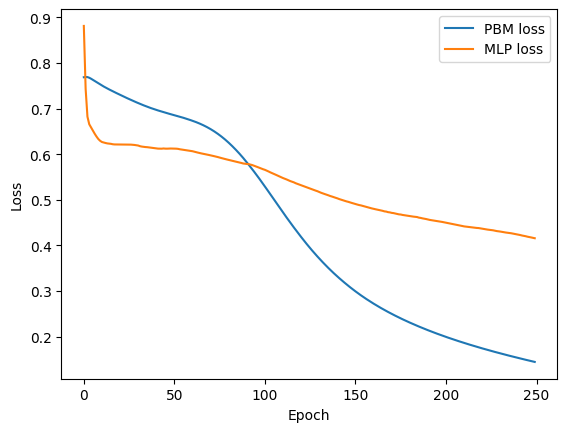

Accuracy (deep): 0.81
Epoch: 0,loss p: 0.76889, loss joint: 0.98349
Epoch: 0, acc joint: 0.48718
Epoch: 1,loss p: 0.76954, loss joint: 0.80006
Epoch: 1, acc joint: 0.48718
Epoch: 2,loss p: 0.76921, loss joint: 0.71160
Epoch: 2, acc joint: 0.51515
Epoch: 3,loss p: 0.76778, loss joint: 0.68024
Epoch: 3, acc joint: 0.47552
Epoch: 4,loss p: 0.76563, loss joint: 0.66502
Epoch: 4, acc joint: 0.55012
Epoch: 5,loss p: 0.76315, loss joint: 0.65320
Epoch: 5, acc joint: 0.63403
Epoch: 6,loss p: 0.76058, loss joint: 0.64366
Epoch: 6, acc joint: 0.66200
Epoch: 7,loss p: 0.75799, loss joint: 0.63608
Epoch: 7, acc joint: 0.65967
Epoch: 8,loss p: 0.75550, loss joint: 0.63031
Epoch: 8, acc joint: 0.65734
Epoch: 9,loss p: 0.75312, loss joint: 0.62630
Epoch: 9, acc joint: 0.67599
Epoch: 10,loss p: 0.75082, loss joint: 0.62333
Epoch: 10, acc joint: 0.68998
Epoch: 11,loss p: 0.74857, loss joint: 0.62137
Epoch: 11, acc joint: 0.69930
Epoch: 12,loss p: 0.74637, loss joint: 0.61908
Epoch: 12, acc joint: 0.708

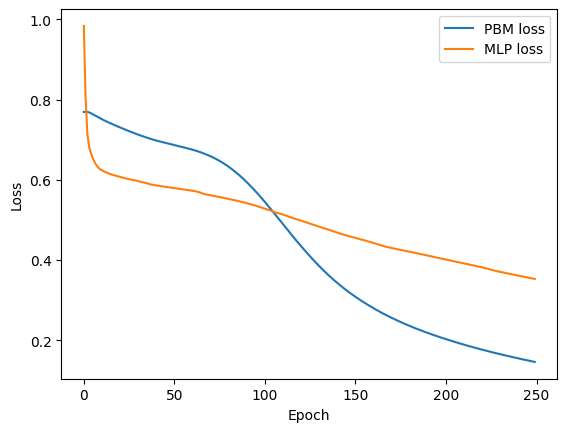

Accuracy (deep): 0.79
Epoch: 0,loss p: 0.76760, loss joint: 0.70069
Epoch: 0, acc joint: 0.48598
Epoch: 1,loss p: 0.76821, loss joint: 0.60896
Epoch: 1, acc joint: 0.48598
Epoch: 2,loss p: 0.76790, loss joint: 0.58731
Epoch: 2, acc joint: 0.48598
Epoch: 3,loss p: 0.76650, loss joint: 0.59930
Epoch: 3, acc joint: 0.46729
Epoch: 4,loss p: 0.76438, loss joint: 0.61257
Epoch: 4, acc joint: 0.57710
Epoch: 5,loss p: 0.76192, loss joint: 0.62103
Epoch: 5, acc joint: 0.62850
Epoch: 6,loss p: 0.75936, loss joint: 0.62575
Epoch: 6, acc joint: 0.64252
Epoch: 7,loss p: 0.75677, loss joint: 0.62923
Epoch: 7, acc joint: 0.65187
Epoch: 8,loss p: 0.75428, loss joint: 0.63214
Epoch: 8, acc joint: 0.64720
Epoch: 9,loss p: 0.75191, loss joint: 0.63554
Epoch: 9, acc joint: 0.64019
Epoch: 10,loss p: 0.74962, loss joint: 0.63926
Epoch: 10, acc joint: 0.67991
Epoch: 11,loss p: 0.74738, loss joint: 0.64287
Epoch: 11, acc joint: 0.69393
Epoch: 12,loss p: 0.74521, loss joint: 0.64596
Epoch: 12, acc joint: 0.698

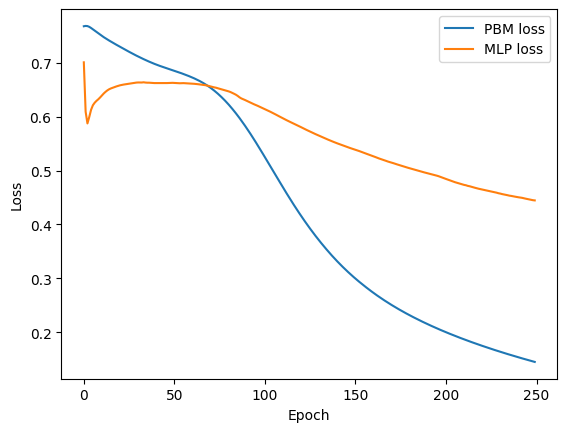

Accuracy (deep): 0.80
Epoch: 0,loss p: 0.73937, loss joint: 0.77955
Epoch: 0, acc joint: 0.40421
Epoch: 1,loss p: 0.73761, loss joint: 0.73018
Epoch: 1, acc joint: 0.51636
Epoch: 2,loss p: 0.73558, loss joint: 0.69281
Epoch: 2, acc joint: 0.50701
Epoch: 3,loss p: 0.73355, loss joint: 0.66328
Epoch: 3, acc joint: 0.55374
Epoch: 4,loss p: 0.73158, loss joint: 0.64002
Epoch: 4, acc joint: 0.58879
Epoch: 5,loss p: 0.72967, loss joint: 0.62295
Epoch: 5, acc joint: 0.61682
Epoch: 6,loss p: 0.72782, loss joint: 0.60943
Epoch: 6, acc joint: 0.62150
Epoch: 7,loss p: 0.72607, loss joint: 0.59927
Epoch: 7, acc joint: 0.63785
Epoch: 8,loss p: 0.72440, loss joint: 0.59136
Epoch: 8, acc joint: 0.64486
Epoch: 9,loss p: 0.72278, loss joint: 0.58452
Epoch: 9, acc joint: 0.64019
Epoch: 10,loss p: 0.72124, loss joint: 0.57869
Epoch: 10, acc joint: 0.64953
Epoch: 11,loss p: 0.71976, loss joint: 0.57396
Epoch: 11, acc joint: 0.64953
Epoch: 12,loss p: 0.71832, loss joint: 0.57021
Epoch: 12, acc joint: 0.649

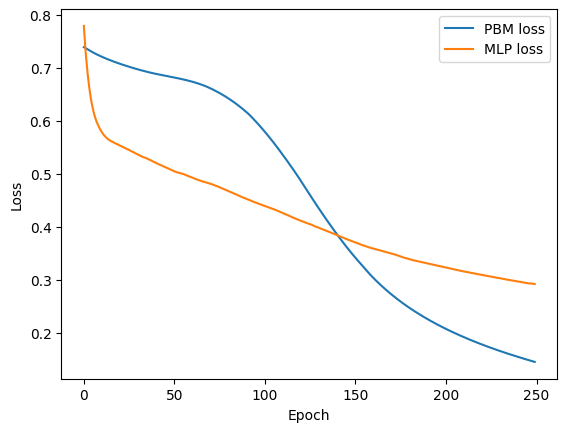

Accuracy (deep): 0.81
Joint: 80.17% (+/- 1.15%)


In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split

# train-test split: Hold out the test set for final model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
#print(y_train.shape)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores_joint = []
for train, test in kfold.split(X_train, y_train):
    # create model, train, and get accuracy
    lr_p = 0.00001
    lr_mlp = 0.00001
    alpha = 0.8
    model = Deep()
    acc = model_train(model, X_train[train], X_train[test],y_train[train], y_train[test], alpha, lr_p, lr_mlp)

    print("Accuracy (deep): %.2f" % acc)
    cv_scores_joint.append(acc)


# evaluate the model
joint_acc = np.mean(cv_scores_joint)
joint_std = np.std(cv_scores_joint)

print("Joint: %.2f%% (+/- %.2f%%)" % (joint_acc*100, joint_std*100))


Epoch: 0,loss p: 0.74043, loss joint: 0.69034
Epoch: 0, acc joint: 0.40793
Epoch: 1,loss p: 0.73846, loss joint: 0.67811
Epoch: 1, acc joint: 0.44755
Epoch: 2,loss p: 0.73630, loss joint: 0.66786
Epoch: 2, acc joint: 0.51282
Epoch: 3,loss p: 0.73415, loss joint: 0.66103
Epoch: 3, acc joint: 0.55944
Epoch: 4,loss p: 0.73207, loss joint: 0.65793
Epoch: 4, acc joint: 0.59441
Epoch: 5,loss p: 0.73005, loss joint: 0.65664
Epoch: 5, acc joint: 0.59207
Epoch: 6,loss p: 0.72809, loss joint: 0.65618
Epoch: 6, acc joint: 0.60373
Epoch: 7,loss p: 0.72622, loss joint: 0.65482
Epoch: 7, acc joint: 0.61072
Epoch: 8,loss p: 0.72442, loss joint: 0.65361
Epoch: 8, acc joint: 0.62238
Epoch: 9,loss p: 0.72268, loss joint: 0.65321
Epoch: 9, acc joint: 0.62471
Epoch: 10,loss p: 0.72102, loss joint: 0.65282
Epoch: 10, acc joint: 0.62471
Epoch: 11,loss p: 0.71940, loss joint: 0.65221
Epoch: 11, acc joint: 0.62005
Epoch: 12,loss p: 0.71783, loss joint: 0.65161
Epoch: 12, acc joint: 0.62471
Epoch: 13,loss p: 0

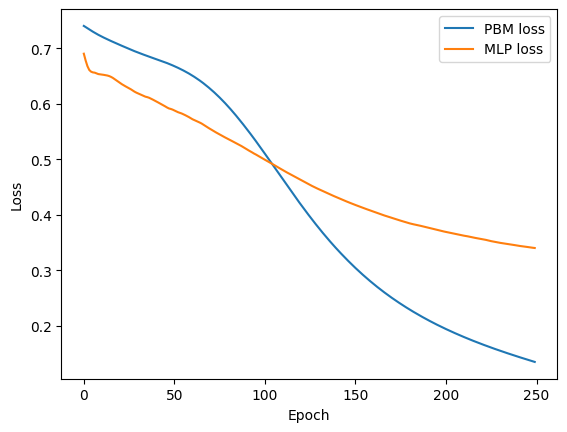

Accuracy (deep): 0.82
Epoch: 0,loss p: 0.76889, loss joint: 0.96115
Epoch: 0, acc joint: 0.49650
Epoch: 1,loss p: 0.76915, loss joint: 0.73838
Epoch: 1, acc joint: 0.49650
Epoch: 2,loss p: 0.76844, loss joint: 0.63059
Epoch: 2, acc joint: 0.52214
Epoch: 3,loss p: 0.76664, loss joint: 0.59549
Epoch: 3, acc joint: 0.51981
Epoch: 4,loss p: 0.76413, loss joint: 0.58808
Epoch: 4, acc joint: 0.56643
Epoch: 5,loss p: 0.76133, loss joint: 0.58980
Epoch: 5, acc joint: 0.60606
Epoch: 6,loss p: 0.75842, loss joint: 0.59392
Epoch: 6, acc joint: 0.65967
Epoch: 7,loss p: 0.75556, loss joint: 0.59841
Epoch: 7, acc joint: 0.66900
Epoch: 8,loss p: 0.75274, loss joint: 0.60241
Epoch: 8, acc joint: 0.66200
Epoch: 9,loss p: 0.74997, loss joint: 0.60634
Epoch: 9, acc joint: 0.65967
Epoch: 10,loss p: 0.74720, loss joint: 0.60968
Epoch: 10, acc joint: 0.67366
Epoch: 11,loss p: 0.74443, loss joint: 0.61273
Epoch: 11, acc joint: 0.67832
Epoch: 12,loss p: 0.74169, loss joint: 0.61531
Epoch: 12, acc joint: 0.694

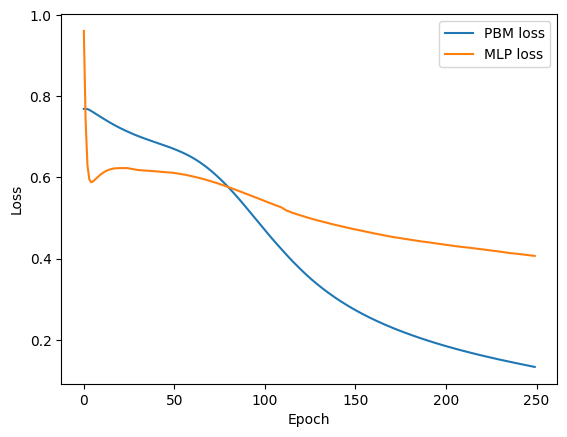

Accuracy (deep): 0.80
Epoch: 0,loss p: 0.76890, loss joint: 0.92971
Epoch: 0, acc joint: 0.49417
Epoch: 1,loss p: 0.76915, loss joint: 0.73670
Epoch: 1, acc joint: 0.49417
Epoch: 2,loss p: 0.76841, loss joint: 0.64462
Epoch: 2, acc joint: 0.52914
Epoch: 3,loss p: 0.76660, loss joint: 0.61503
Epoch: 3, acc joint: 0.53380
Epoch: 4,loss p: 0.76409, loss joint: 0.60794
Epoch: 4, acc joint: 0.58974
Epoch: 5,loss p: 0.76130, loss joint: 0.60707
Epoch: 5, acc joint: 0.61305
Epoch: 6,loss p: 0.75841, loss joint: 0.60841
Epoch: 6, acc joint: 0.65501
Epoch: 7,loss p: 0.75554, loss joint: 0.61053
Epoch: 7, acc joint: 0.66200
Epoch: 8,loss p: 0.75271, loss joint: 0.61334
Epoch: 8, acc joint: 0.66900
Epoch: 9,loss p: 0.74994, loss joint: 0.61642
Epoch: 9, acc joint: 0.66667
Epoch: 10,loss p: 0.74718, loss joint: 0.61980
Epoch: 10, acc joint: 0.68298
Epoch: 11,loss p: 0.74442, loss joint: 0.62309
Epoch: 11, acc joint: 0.70629
Epoch: 12,loss p: 0.74168, loss joint: 0.62588
Epoch: 12, acc joint: 0.706

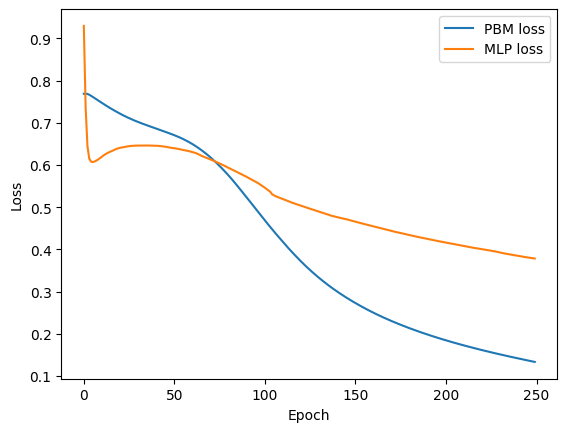

Accuracy (deep): 0.78
Epoch: 0,loss p: 0.76759, loss joint: 1.09307
Epoch: 0, acc joint: 0.49533
Epoch: 1,loss p: 0.76784, loss joint: 0.82975
Epoch: 1, acc joint: 0.49533
Epoch: 2,loss p: 0.76715, loss joint: 0.69103
Epoch: 2, acc joint: 0.52103
Epoch: 3,loss p: 0.76538, loss joint: 0.63836
Epoch: 3, acc joint: 0.51402
Epoch: 4,loss p: 0.76289, loss joint: 0.62040
Epoch: 4, acc joint: 0.56075
Epoch: 5,loss p: 0.76011, loss joint: 0.61395
Epoch: 5, acc joint: 0.61916
Epoch: 6,loss p: 0.75723, loss joint: 0.61182
Epoch: 6, acc joint: 0.63551
Epoch: 7,loss p: 0.75437, loss joint: 0.61148
Epoch: 7, acc joint: 0.64486
Epoch: 8,loss p: 0.75154, loss joint: 0.61210
Epoch: 8, acc joint: 0.64252
Epoch: 9,loss p: 0.74879, loss joint: 0.61337
Epoch: 9, acc joint: 0.63785
Epoch: 10,loss p: 0.74606, loss joint: 0.61467
Epoch: 10, acc joint: 0.65888
Epoch: 11,loss p: 0.74332, loss joint: 0.61625
Epoch: 11, acc joint: 0.67056
Epoch: 12,loss p: 0.74058, loss joint: 0.61782
Epoch: 12, acc joint: 0.684

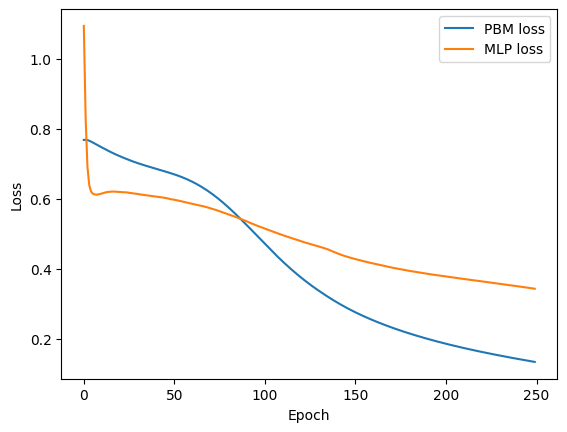

Accuracy (deep): 0.81
Epoch: 0,loss p: 0.73931, loss joint: 0.68799
Epoch: 0, acc joint: 0.42757
Epoch: 1,loss p: 0.73736, loss joint: 0.66750
Epoch: 1, acc joint: 0.48598
Epoch: 2,loss p: 0.73518, loss joint: 0.66115
Epoch: 2, acc joint: 0.58178
Epoch: 3,loss p: 0.73303, loss joint: 0.66014
Epoch: 3, acc joint: 0.62150
Epoch: 4,loss p: 0.73092, loss joint: 0.66203
Epoch: 4, acc joint: 0.64252
Epoch: 5,loss p: 0.72889, loss joint: 0.66526
Epoch: 5, acc joint: 0.64252
Epoch: 6,loss p: 0.72695, loss joint: 0.66848
Epoch: 6, acc joint: 0.64953
Epoch: 7,loss p: 0.72509, loss joint: 0.66960
Epoch: 7, acc joint: 0.66121
Epoch: 8,loss p: 0.72329, loss joint: 0.67000
Epoch: 8, acc joint: 0.65421
Epoch: 9,loss p: 0.72159, loss joint: 0.67164
Epoch: 9, acc joint: 0.65187
Epoch: 10,loss p: 0.71995, loss joint: 0.67361
Epoch: 10, acc joint: 0.66589
Epoch: 11,loss p: 0.71836, loss joint: 0.67524
Epoch: 11, acc joint: 0.67056
Epoch: 12,loss p: 0.71681, loss joint: 0.67643
Epoch: 12, acc joint: 0.679

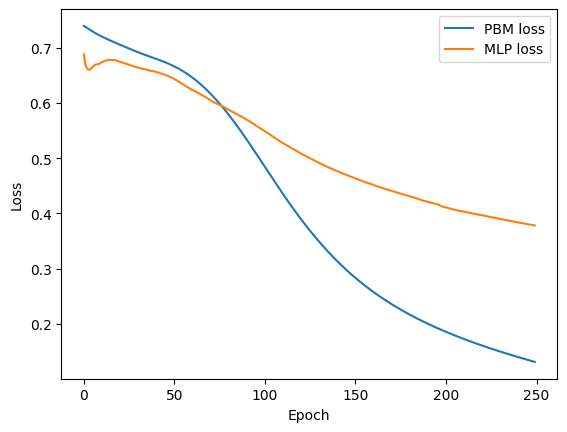

Accuracy (deep): 0.77
Joint: 79.61% (+/- 2.01%)


In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split

# train-test split: Hold out the test set for final model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
#print(y_train.shape)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores_joint = []
for train, test in kfold.split(X_train, y_train):
    # create model, train, and get accuracy
    lr_p = 0.00001
    lr_mlp = 0.00001
    alpha = 0.8
    model = Deep1()
    acc = model_train(model, X_train[train], X_train[test],y_train[train], y_train[test], alpha, lr_p, lr_mlp)

    print("Accuracy (deep): %.2f" % acc)
    cv_scores_joint.append(acc)


# evaluate the model
joint_acc = np.mean(cv_scores_joint)
joint_std = np.std(cv_scores_joint)

print("Joint: %.2f%% (+/- %.2f%%)" % (joint_acc*100, joint_std*100))


Epoch: 0,loss p: 0.76777, loss joint: 2.28115
Epoch: 0, acc joint: 0.61772
Epoch: 1,loss p: 0.76228, loss joint: 2.11476
Epoch: 1, acc joint: 0.61072
Epoch: 2,loss p: 0.75867, loss joint: 1.94581
Epoch: 2, acc joint: 0.60839
Epoch: 3,loss p: 0.75626, loss joint: 1.77312
Epoch: 3, acc joint: 0.60373
Epoch: 4,loss p: 0.75436, loss joint: 1.60060
Epoch: 4, acc joint: 0.60839
Epoch: 5,loss p: 0.75274, loss joint: 1.43760
Epoch: 5, acc joint: 0.61072
Epoch: 6,loss p: 0.75134, loss joint: 1.30108
Epoch: 6, acc joint: 0.61538
Epoch: 7,loss p: 0.75008, loss joint: 1.20238
Epoch: 7, acc joint: 0.61772
Epoch: 8,loss p: 0.74877, loss joint: 1.13404
Epoch: 8, acc joint: 0.62937
Epoch: 9,loss p: 0.74730, loss joint: 1.08288
Epoch: 9, acc joint: 0.64103
Epoch: 10,loss p: 0.74561, loss joint: 1.04026
Epoch: 10, acc joint: 0.64802
Epoch: 11,loss p: 0.74366, loss joint: 1.00354
Epoch: 11, acc joint: 0.64802
Epoch: 12,loss p: 0.74143, loss joint: 0.97274
Epoch: 12, acc joint: 0.65035
Epoch: 13,loss p: 0

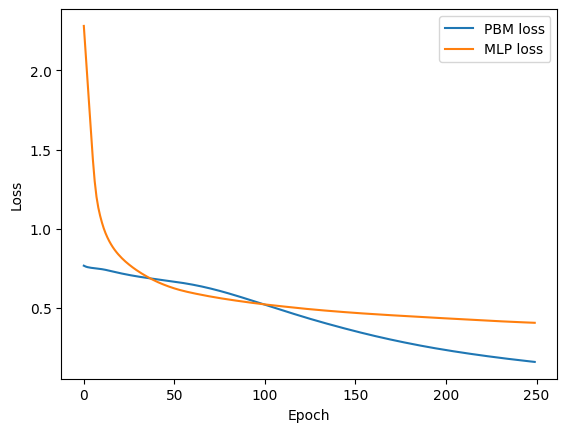

Accuracy (deep): 0.79
Epoch: 0,loss p: 0.74624, loss joint: 2.52841
Epoch: 0, acc joint: 0.37762
Epoch: 1,loss p: 0.74290, loss joint: 2.23537
Epoch: 1, acc joint: 0.36830
Epoch: 2,loss p: 0.73825, loss joint: 1.98492
Epoch: 2, acc joint: 0.39161
Epoch: 3,loss p: 0.73349, loss joint: 1.75263
Epoch: 3, acc joint: 0.38928
Epoch: 4,loss p: 0.72887, loss joint: 1.53803
Epoch: 4, acc joint: 0.38228
Epoch: 5,loss p: 0.72439, loss joint: 1.34038
Epoch: 5, acc joint: 0.40793
Epoch: 6,loss p: 0.72005, loss joint: 1.16164
Epoch: 6, acc joint: 0.43124
Epoch: 7,loss p: 0.71585, loss joint: 1.00442
Epoch: 7, acc joint: 0.44988
Epoch: 8,loss p: 0.71181, loss joint: 0.87145
Epoch: 8, acc joint: 0.47552
Epoch: 9,loss p: 0.70793, loss joint: 0.76536
Epoch: 9, acc joint: 0.48485
Epoch: 10,loss p: 0.70429, loss joint: 0.68848
Epoch: 10, acc joint: 0.51981
Epoch: 11,loss p: 0.70092, loss joint: 0.63766
Epoch: 11, acc joint: 0.57809
Epoch: 12,loss p: 0.69785, loss joint: 0.60665
Epoch: 12, acc joint: 0.613

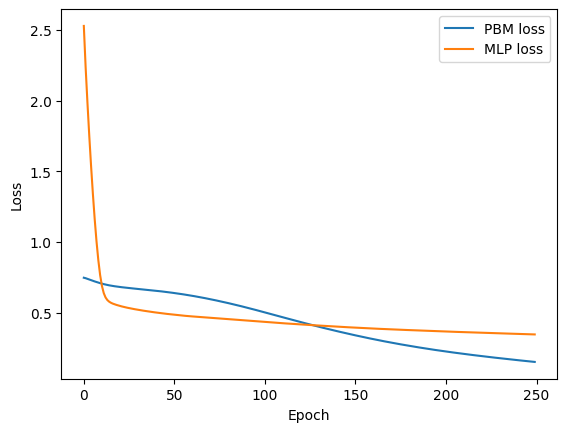

Accuracy (deep): 0.77
Epoch: 0,loss p: 0.74593, loss joint: 1.30133
Epoch: 0, acc joint: 0.37995
Epoch: 1,loss p: 0.74244, loss joint: 1.09400
Epoch: 1, acc joint: 0.36364
Epoch: 2,loss p: 0.73767, loss joint: 0.98219
Epoch: 2, acc joint: 0.37529
Epoch: 3,loss p: 0.73281, loss joint: 0.89323
Epoch: 3, acc joint: 0.38228
Epoch: 4,loss p: 0.72810, loss joint: 0.81649
Epoch: 4, acc joint: 0.38228
Epoch: 5,loss p: 0.72357, loss joint: 0.75040
Epoch: 5, acc joint: 0.38695
Epoch: 6,loss p: 0.71919, loss joint: 0.69521
Epoch: 6, acc joint: 0.41026
Epoch: 7,loss p: 0.71498, loss joint: 0.65162
Epoch: 7, acc joint: 0.43124
Epoch: 8,loss p: 0.71092, loss joint: 0.62089
Epoch: 8, acc joint: 0.43590
Epoch: 9,loss p: 0.70708, loss joint: 0.60507
Epoch: 9, acc joint: 0.47086
Epoch: 10,loss p: 0.70347, loss joint: 0.60568
Epoch: 10, acc joint: 0.49650
Epoch: 11,loss p: 0.70012, loss joint: 0.62082
Epoch: 11, acc joint: 0.54312
Epoch: 12,loss p: 0.69706, loss joint: 0.64462
Epoch: 12, acc joint: 0.571

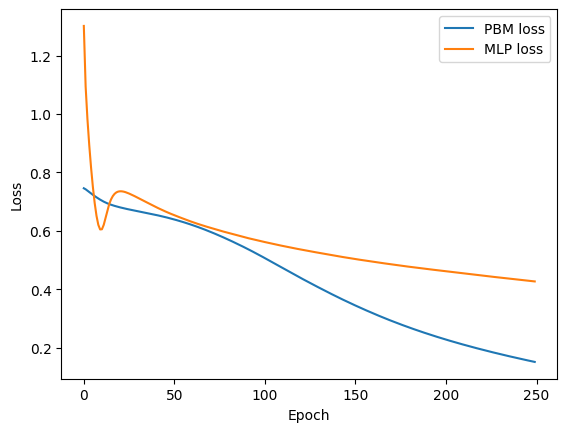

Accuracy (deep): 0.78
Epoch: 0,loss p: 0.74502, loss joint: 1.41611
Epoch: 0, acc joint: 0.33879
Epoch: 1,loss p: 0.74153, loss joint: 1.18920
Epoch: 1, acc joint: 0.32009
Epoch: 2,loss p: 0.73677, loss joint: 1.06693
Epoch: 2, acc joint: 0.33178
Epoch: 3,loss p: 0.73183, loss joint: 0.97016
Epoch: 3, acc joint: 0.34112
Epoch: 4,loss p: 0.72703, loss joint: 0.88519
Epoch: 4, acc joint: 0.33411
Epoch: 5,loss p: 0.72240, loss joint: 0.80999
Epoch: 5, acc joint: 0.35514
Epoch: 6,loss p: 0.71794, loss joint: 0.74445
Epoch: 6, acc joint: 0.36215
Epoch: 7,loss p: 0.71368, loss joint: 0.68881
Epoch: 7, acc joint: 0.37150
Epoch: 8,loss p: 0.70959, loss joint: 0.64557
Epoch: 8, acc joint: 0.38551
Epoch: 9,loss p: 0.70570, loss joint: 0.61791
Epoch: 9, acc joint: 0.40888
Epoch: 10,loss p: 0.70205, loss joint: 0.60805
Epoch: 10, acc joint: 0.43925
Epoch: 11,loss p: 0.69868, loss joint: 0.61429
Epoch: 11, acc joint: 0.46729
Epoch: 12,loss p: 0.69562, loss joint: 0.63048
Epoch: 12, acc joint: 0.532

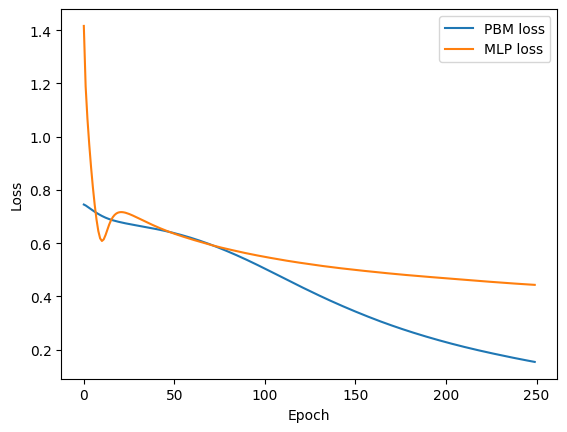

Accuracy (deep): 0.78
Epoch: 0,loss p: 0.76588, loss joint: 2.37801
Epoch: 0, acc joint: 0.63785
Epoch: 1,loss p: 0.76041, loss joint: 2.19586
Epoch: 1, acc joint: 0.64486
Epoch: 2,loss p: 0.75701, loss joint: 2.00407
Epoch: 2, acc joint: 0.62617
Epoch: 3,loss p: 0.75473, loss joint: 1.80931
Epoch: 3, acc joint: 0.62383
Epoch: 4,loss p: 0.75298, loss joint: 1.61606
Epoch: 4, acc joint: 0.62383
Epoch: 5,loss p: 0.75148, loss joint: 1.43086
Epoch: 5, acc joint: 0.62617
Epoch: 6,loss p: 0.75017, loss joint: 1.26532
Epoch: 6, acc joint: 0.63318
Epoch: 7,loss p: 0.74902, loss joint: 1.13279
Epoch: 7, acc joint: 0.62850
Epoch: 8,loss p: 0.74792, loss joint: 1.03454
Epoch: 8, acc joint: 0.64720
Epoch: 9,loss p: 0.74664, loss joint: 0.96482
Epoch: 9, acc joint: 0.64953
Epoch: 10,loss p: 0.74504, loss joint: 0.91713
Epoch: 10, acc joint: 0.64720
Epoch: 11,loss p: 0.74304, loss joint: 0.88499
Epoch: 11, acc joint: 0.64953
Epoch: 12,loss p: 0.74069, loss joint: 0.86139
Epoch: 12, acc joint: 0.647

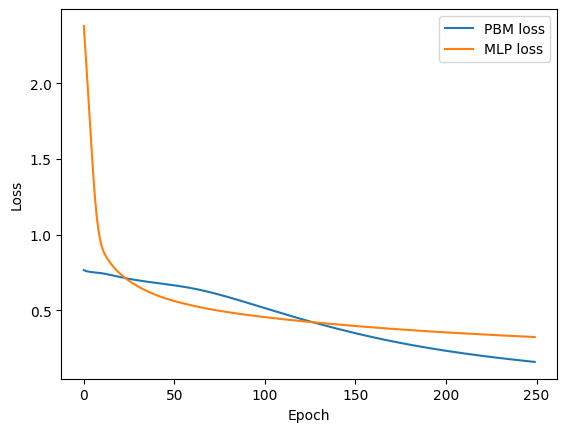

Accuracy (deep): 0.81
Joint: 78.63% (+/- 1.48%)


In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split

# train-test split: Hold out the test set for final model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
#print(y_train.shape)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores_joint = []
for train, test in kfold.split(X_train, y_train):
    # create model, train, and get accuracy
    lr_p = 0.00001
    lr_mlp = 0.00001
    alpha = 0.8
    model = Wide()
    acc = model_train(model, X_train[train], X_train[test],y_train[train], y_train[test], alpha, lr_p, lr_mlp)

    print("Accuracy (deep): %.2f" % acc)
    cv_scores_joint.append(acc)


# evaluate the model
joint_acc = np.mean(cv_scores_joint)
joint_std = np.std(cv_scores_joint)

print("Joint: %.2f%% (+/- %.2f%%)" % (joint_acc*100, joint_std*100))


In [ ]:
import pandas as pd

# Read data
data = pd.read_csv("GapSimLKLCrandsmall_20_60.csv")
print(data)
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]
print(X)
print(y)

           DV1       DV2       DV3          V         G1         G2  \
0     1.384000  0.082000 -7.928100  14.018000  49.628600  10.665400   
1     1.264000  0.112000 -7.910000  14.006000  49.505600  10.650400   
2     1.219000  0.106000 -7.916000  14.012000  49.387600  10.638400   
3     1.219000  0.085000 -7.919000  14.015000  49.266600  10.627400   
4     1.225000  0.030000 -7.919000  14.015000  49.144600  10.616400   
...        ...       ...       ...        ...        ...        ...   
4075 -0.871728  9.448800  5.599176   5.455920  10.931957  33.089393   
4076 -0.969264  9.217152  5.660136   5.620512  11.023397  32.158534   
4077 -1.054608  9.058656  5.562600   5.815584  11.126419  31.256630   
4078 -1.103376  9.015984  4.687824   5.980176  11.239805  30.364786   
4079 -1.109472  9.079992  4.593336   6.074664  11.353800  29.467454   

              G3        Dend     Carid  label_targetlane  
0     202.021600  145.774800 -1.550351                 1  
1     201.231600  147.174800 

In [ ]:
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32)
print(X.shape)
print(y.shape)

torch.Size([4080, 9])
torch.Size([4080, 1])


In [ ]:
import torch.nn as nn
class PBM(nn.Module):
    def __init__(self):
        super(PBM, self).__init__()
        
        # Define the trainable parameters
        #self.interceptfo = nn.Parameter(torch.tensor(100., requires_grad = True))
        #self.interceptlead = nn.Parameter(torch.tensor(100., requires_grad = True))
        #self.interceptlag = nn.Parameter(torch.tensor(100., requires_grad = True))
        self.betaDV1fo = nn.Parameter(torch.tensor(-1.6996, requires_grad = True))
        self.betaDV2lead = nn.Parameter(torch.tensor(0.2498, requires_grad = True))
        self.betaDV3lag = nn.Parameter(torch.tensor(-0.2024, requires_grad = True))
        self.betaV = nn.Parameter(torch.tensor(0.0178, requires_grad = True))
        self.betaG1 = nn.Parameter(torch.tensor(-0.0122, requires_grad = True))
        self.betaG2 = nn.Parameter(torch.tensor(0.0044, requires_grad = True))
        self.betaG3 = nn.Parameter(torch.tensor(0.0311, requires_grad = True))
        
        self.alphaveh = nn.Parameter(torch.tensor(1., requires_grad = True))
        self.betaD = nn.Parameter(torch.tensor(0.0024, requires_grad = True))

        

    def forward(self, X):
        # Compute the utilities
        U_fo =  self.betaDV1fo * X[:, 0] + self.betaG1 * X[:, 4] + self.betaD * X[:, 7]
        U_lead =  self.betaDV2lead * X[:, 1] + self.betaG2 * X[:, 5] + self.betaD * X[:, 7]
        U_lag =  self.betaDV3lag * X[:, 2] + self.betaG3 * X[:, 6]  + self.betaD * X[:, 7]
        
        # Compute the gaps and probabilities
        Gfo = torch.log(X[:, 4]) - U_fo
        Glead = torch.log(X[:, 5]) - U_lead
        Glag = torch.log(X[:, 6]) - U_lag
        

        Gaplead = torch.distributions.normal.Normal(loc=0, scale=self.alphaveh).cdf(Glead / self.alphaveh)
        Gaplag = torch.distributions.normal.Normal(loc=0, scale=self.alphaveh).cdf(Glag / self.alphaveh)
        Gapfo = torch.distributions.normal.Normal(loc=0, scale=self.alphaveh).cdf(Gfo / self.alphaveh)
        P_LC = Gaplead * Gaplag * Gapfo
        
        # Generate the acceptance probabilities
        #rand_num = torch.rand(X.shape[0]).to(self.device)
        #P = torch.where(rand_num > P_LC, torch.ones_like(rand_num), torch.zeros_like(rand_num))
        
        return P_LC.reshape(-1, 1)


Epoch: 0,loss p: 0.72390, loss joint: 0.84445
Epoch: 0, acc joint: 0.44755
Epoch: 1,loss p: 0.72206, loss joint: 0.80537
Epoch: 1, acc joint: 0.52797
Epoch: 2,loss p: 0.72001, loss joint: 0.77390
Epoch: 2, acc joint: 0.60315
Epoch: 3,loss p: 0.71802, loss joint: 0.74364
Epoch: 3, acc joint: 0.63287
Epoch: 4,loss p: 0.71615, loss joint: 0.71777
Epoch: 4, acc joint: 0.64685
Epoch: 5,loss p: 0.71437, loss joint: 0.69438
Epoch: 5, acc joint: 0.65734
Epoch: 6,loss p: 0.71271, loss joint: 0.67406
Epoch: 6, acc joint: 0.66783
Epoch: 7,loss p: 0.71111, loss joint: 0.65681
Epoch: 7, acc joint: 0.67133
Epoch: 8,loss p: 0.70961, loss joint: 0.64218
Epoch: 8, acc joint: 0.67133
Epoch: 9,loss p: 0.70819, loss joint: 0.62977
Epoch: 9, acc joint: 0.68182
Epoch: 10,loss p: 0.70683, loss joint: 0.61951
Epoch: 10, acc joint: 0.69406
Epoch: 11,loss p: 0.70553, loss joint: 0.61112
Epoch: 11, acc joint: 0.69755
Epoch: 12,loss p: 0.70429, loss joint: 0.60371
Epoch: 12, acc joint: 0.70455
Epoch: 13,loss p: 0

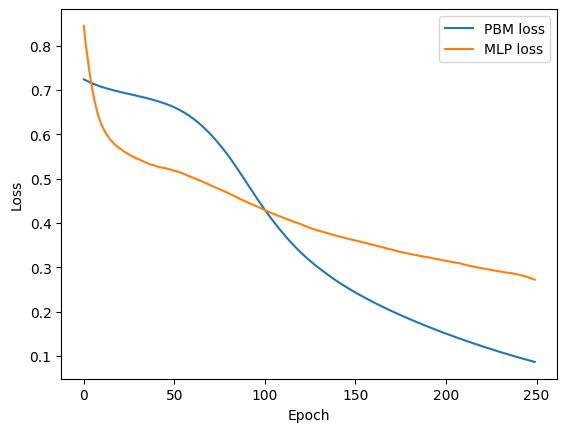

Accuracy (deep): 0.79
Epoch: 0,loss p: 0.75742, loss joint: 0.68598
Epoch: 0, acc joint: 0.51489
Epoch: 1,loss p: 0.75625, loss joint: 0.64386
Epoch: 1, acc joint: 0.56918
Epoch: 2,loss p: 0.75436, loss joint: 0.63302
Epoch: 2, acc joint: 0.60595
Epoch: 3,loss p: 0.75243, loss joint: 0.62474
Epoch: 3, acc joint: 0.63398
Epoch: 4,loss p: 0.75052, loss joint: 0.61153
Epoch: 4, acc joint: 0.63923
Epoch: 5,loss p: 0.74865, loss joint: 0.60052
Epoch: 5, acc joint: 0.64799
Epoch: 6,loss p: 0.74687, loss joint: 0.59340
Epoch: 6, acc joint: 0.64974
Epoch: 7,loss p: 0.74516, loss joint: 0.58760
Epoch: 7, acc joint: 0.65149
Epoch: 8,loss p: 0.74351, loss joint: 0.58293
Epoch: 8, acc joint: 0.65499
Epoch: 9,loss p: 0.74190, loss joint: 0.57869
Epoch: 9, acc joint: 0.65499
Epoch: 10,loss p: 0.74033, loss joint: 0.57413
Epoch: 10, acc joint: 0.65849
Epoch: 11,loss p: 0.73881, loss joint: 0.57042
Epoch: 11, acc joint: 0.66025
Epoch: 12,loss p: 0.73733, loss joint: 0.56697
Epoch: 12, acc joint: 0.662

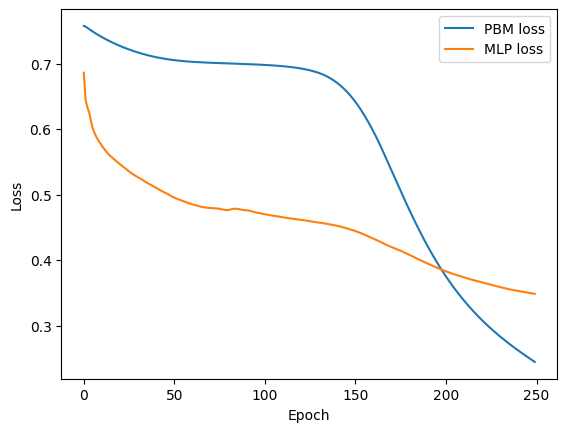

Accuracy (deep): 0.79
Epoch: 0,loss p: 0.72461, loss joint: 0.63114
Epoch: 0, acc joint: 0.48161
Epoch: 1,loss p: 0.72240, loss joint: 0.63397
Epoch: 1, acc joint: 0.57968
Epoch: 2,loss p: 0.72030, loss joint: 0.63436
Epoch: 2, acc joint: 0.61821
Epoch: 3,loss p: 0.71834, loss joint: 0.63262
Epoch: 3, acc joint: 0.64098
Epoch: 4,loss p: 0.71649, loss joint: 0.62907
Epoch: 4, acc joint: 0.65149
Epoch: 5,loss p: 0.71478, loss joint: 0.62423
Epoch: 5, acc joint: 0.66200
Epoch: 6,loss p: 0.71320, loss joint: 0.61995
Epoch: 6, acc joint: 0.66025
Epoch: 7,loss p: 0.71172, loss joint: 0.61510
Epoch: 7, acc joint: 0.66550
Epoch: 8,loss p: 0.71035, loss joint: 0.61029
Epoch: 8, acc joint: 0.66900
Epoch: 9,loss p: 0.70906, loss joint: 0.60558
Epoch: 9, acc joint: 0.67075
Epoch: 10,loss p: 0.70783, loss joint: 0.60116
Epoch: 10, acc joint: 0.67075
Epoch: 11,loss p: 0.70666, loss joint: 0.59693
Epoch: 11, acc joint: 0.67075
Epoch: 12,loss p: 0.70553, loss joint: 0.59311
Epoch: 12, acc joint: 0.672

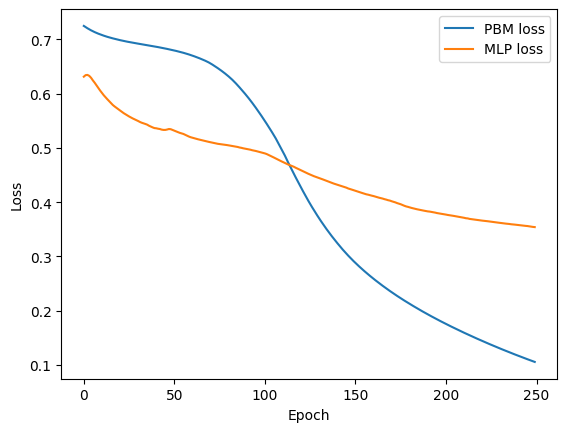

Accuracy (deep): 0.79
Epoch: 0,loss p: 0.72474, loss joint: 0.67489
Epoch: 0, acc joint: 0.50263
Epoch: 1,loss p: 0.72258, loss joint: 0.62053
Epoch: 1, acc joint: 0.60070
Epoch: 2,loss p: 0.72052, loss joint: 0.58698
Epoch: 2, acc joint: 0.67426
Epoch: 3,loss p: 0.71857, loss joint: 0.56557
Epoch: 3, acc joint: 0.68827
Epoch: 4,loss p: 0.71674, loss joint: 0.55028
Epoch: 4, acc joint: 0.68126
Epoch: 5,loss p: 0.71502, loss joint: 0.53789
Epoch: 5, acc joint: 0.67426
Epoch: 6,loss p: 0.71344, loss joint: 0.52871
Epoch: 6, acc joint: 0.67601
Epoch: 7,loss p: 0.71195, loss joint: 0.52158
Epoch: 7, acc joint: 0.67426
Epoch: 8,loss p: 0.71056, loss joint: 0.51536
Epoch: 8, acc joint: 0.67075
Epoch: 9,loss p: 0.70926, loss joint: 0.50995
Epoch: 9, acc joint: 0.67250
Epoch: 10,loss p: 0.70800, loss joint: 0.50501
Epoch: 10, acc joint: 0.66725
Epoch: 11,loss p: 0.70680, loss joint: 0.50025
Epoch: 11, acc joint: 0.67426
Epoch: 12,loss p: 0.70563, loss joint: 0.49551
Epoch: 12, acc joint: 0.679

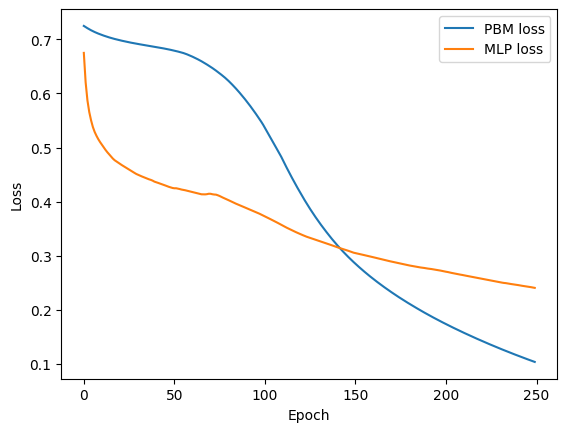

Accuracy (deep): 0.79
Epoch: 0,loss p: 0.72470, loss joint: 0.69960
Epoch: 0, acc joint: 0.50263
Epoch: 1,loss p: 0.72254, loss joint: 0.64237
Epoch: 1, acc joint: 0.59545
Epoch: 2,loss p: 0.72047, loss joint: 0.60725
Epoch: 2, acc joint: 0.66900
Epoch: 3,loss p: 0.71851, loss joint: 0.58533
Epoch: 3, acc joint: 0.70053
Epoch: 4,loss p: 0.71668, loss joint: 0.56933
Epoch: 4, acc joint: 0.69702
Epoch: 5,loss p: 0.71499, loss joint: 0.55692
Epoch: 5, acc joint: 0.70228
Epoch: 6,loss p: 0.71341, loss joint: 0.54725
Epoch: 6, acc joint: 0.70053
Epoch: 7,loss p: 0.71194, loss joint: 0.53902
Epoch: 7, acc joint: 0.70578
Epoch: 8,loss p: 0.71054, loss joint: 0.53171
Epoch: 8, acc joint: 0.70928
Epoch: 9,loss p: 0.70924, loss joint: 0.52555
Epoch: 9, acc joint: 0.70928
Epoch: 10,loss p: 0.70799, loss joint: 0.52035
Epoch: 10, acc joint: 0.71278
Epoch: 11,loss p: 0.70682, loss joint: 0.51564
Epoch: 11, acc joint: 0.71278
Epoch: 12,loss p: 0.70568, loss joint: 0.51105
Epoch: 12, acc joint: 0.714

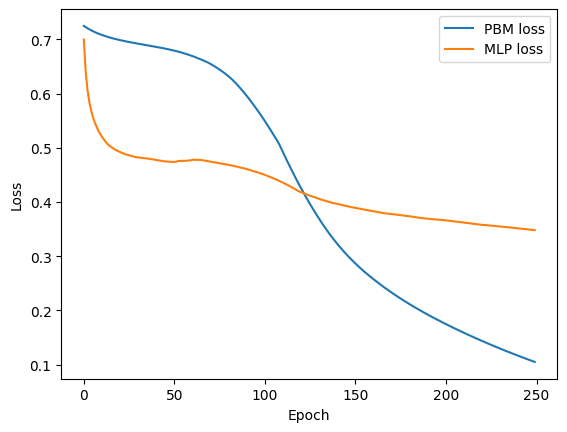

Accuracy (deep): 0.81
Joint: 79.45% (+/- 0.75%)


In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split

# train-test split: Hold out the test set for final model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
#print(y_train.shape)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores_joint = []
for train, test in kfold.split(X_train, y_train):
    # create model, train, and get accuracy
    lr_p = 0.00001
    lr_mlp = 0.00001
    alpha = 0.8
    model = Deep()
    acc = model_train(model, X_train[train], X_train[test],y_train[train], y_train[test], alpha, lr_p, lr_mlp)

    print("Accuracy (deep): %.2f" % acc)
    cv_scores_joint.append(acc)


# evaluate the model
joint_acc = np.mean(cv_scores_joint)
joint_std = np.std(cv_scores_joint)

print("Joint: %.2f%% (+/- %.2f%%)" % (joint_acc*100, joint_std*100))


Epoch: 0,loss p: 0.72450, loss joint: 0.76356
Epoch: 0, acc joint: 0.48951
Epoch: 1,loss p: 0.72197, loss joint: 0.73124
Epoch: 1, acc joint: 0.57517
Epoch: 2,loss p: 0.71960, loss joint: 0.71124
Epoch: 2, acc joint: 0.64336
Epoch: 3,loss p: 0.71743, loss joint: 0.69872
Epoch: 3, acc joint: 0.66434
Epoch: 4,loss p: 0.71543, loss joint: 0.68987
Epoch: 4, acc joint: 0.66434
Epoch: 5,loss p: 0.71361, loss joint: 0.68539
Epoch: 5, acc joint: 0.65909
Epoch: 6,loss p: 0.71194, loss joint: 0.68292
Epoch: 6, acc joint: 0.66084
Epoch: 7,loss p: 0.71036, loss joint: 0.68087
Epoch: 7, acc joint: 0.66259
Epoch: 8,loss p: 0.70883, loss joint: 0.67862
Epoch: 8, acc joint: 0.66608
Epoch: 9,loss p: 0.70735, loss joint: 0.67605
Epoch: 9, acc joint: 0.66783
Epoch: 10,loss p: 0.70598, loss joint: 0.67512
Epoch: 10, acc joint: 0.66783
Epoch: 11,loss p: 0.70465, loss joint: 0.67502
Epoch: 11, acc joint: 0.66434
Epoch: 12,loss p: 0.70333, loss joint: 0.67504
Epoch: 12, acc joint: 0.66958
Epoch: 13,loss p: 0

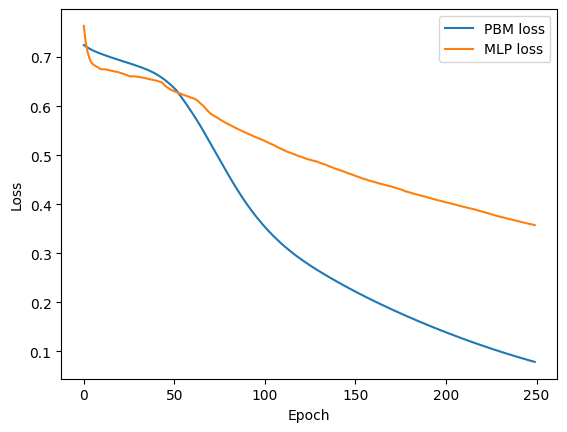

Accuracy (deep): 0.79
Epoch: 0,loss p: 0.75694, loss joint: 0.65676
Epoch: 0, acc joint: 0.53765
Epoch: 1,loss p: 0.75554, loss joint: 0.63260
Epoch: 1, acc joint: 0.57443
Epoch: 2,loss p: 0.75355, loss joint: 0.62277
Epoch: 2, acc joint: 0.61296
Epoch: 3,loss p: 0.75159, loss joint: 0.62226
Epoch: 3, acc joint: 0.63222
Epoch: 4,loss p: 0.74970, loss joint: 0.62427
Epoch: 4, acc joint: 0.63573
Epoch: 5,loss p: 0.74783, loss joint: 0.62696
Epoch: 5, acc joint: 0.63573
Epoch: 6,loss p: 0.74591, loss joint: 0.62745
Epoch: 6, acc joint: 0.63748
Epoch: 7,loss p: 0.74396, loss joint: 0.62590
Epoch: 7, acc joint: 0.64098
Epoch: 8,loss p: 0.74201, loss joint: 0.62341
Epoch: 8, acc joint: 0.64098
Epoch: 9,loss p: 0.74008, loss joint: 0.62126
Epoch: 9, acc joint: 0.64799
Epoch: 10,loss p: 0.73822, loss joint: 0.61918
Epoch: 10, acc joint: 0.64974
Epoch: 11,loss p: 0.73643, loss joint: 0.61712
Epoch: 11, acc joint: 0.65499
Epoch: 12,loss p: 0.73468, loss joint: 0.61463
Epoch: 12, acc joint: 0.658

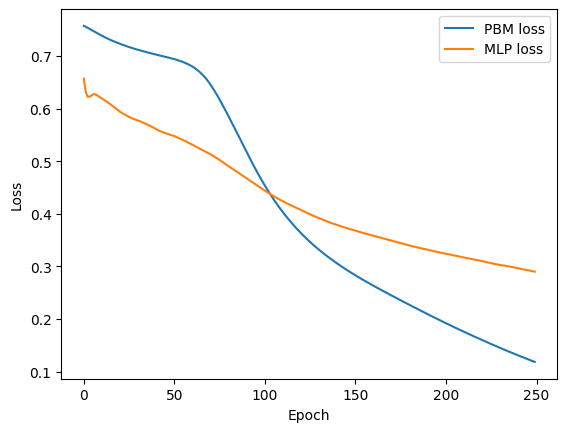

Accuracy (deep): 0.79
Epoch: 0,loss p: 0.72432, loss joint: 0.71614
Epoch: 0, acc joint: 0.49912
Epoch: 1,loss p: 0.72175, loss joint: 0.69649
Epoch: 1, acc joint: 0.60595
Epoch: 2,loss p: 0.71935, loss joint: 0.68965
Epoch: 2, acc joint: 0.66025
Epoch: 3,loss p: 0.71713, loss joint: 0.68840
Epoch: 3, acc joint: 0.68126
Epoch: 4,loss p: 0.71511, loss joint: 0.69064
Epoch: 4, acc joint: 0.68651
Epoch: 5,loss p: 0.71328, loss joint: 0.69226
Epoch: 5, acc joint: 0.69002
Epoch: 6,loss p: 0.71158, loss joint: 0.69368
Epoch: 6, acc joint: 0.69177
Epoch: 7,loss p: 0.70998, loss joint: 0.69579
Epoch: 7, acc joint: 0.69177
Epoch: 8,loss p: 0.70844, loss joint: 0.69626
Epoch: 8, acc joint: 0.69352
Epoch: 9,loss p: 0.70695, loss joint: 0.69653
Epoch: 9, acc joint: 0.69527
Epoch: 10,loss p: 0.70559, loss joint: 0.69666
Epoch: 10, acc joint: 0.69352
Epoch: 11,loss p: 0.70426, loss joint: 0.69648
Epoch: 11, acc joint: 0.69352
Epoch: 12,loss p: 0.70293, loss joint: 0.69609
Epoch: 12, acc joint: 0.693

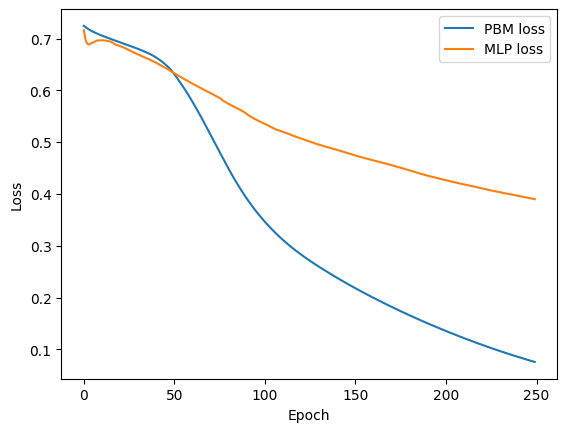

Accuracy (deep): 0.84
Epoch: 0,loss p: 0.72432, loss joint: 0.70675
Epoch: 0, acc joint: 0.47461
Epoch: 1,loss p: 0.72176, loss joint: 0.67606
Epoch: 1, acc joint: 0.56918
Epoch: 2,loss p: 0.71937, loss joint: 0.66035
Epoch: 2, acc joint: 0.62522
Epoch: 3,loss p: 0.71718, loss joint: 0.65276
Epoch: 3, acc joint: 0.65674
Epoch: 4,loss p: 0.71518, loss joint: 0.64970
Epoch: 4, acc joint: 0.66025
Epoch: 5,loss p: 0.71334, loss joint: 0.64888
Epoch: 5, acc joint: 0.66375
Epoch: 6,loss p: 0.71163, loss joint: 0.64867
Epoch: 6, acc joint: 0.66900
Epoch: 7,loss p: 0.71003, loss joint: 0.64838
Epoch: 7, acc joint: 0.67075
Epoch: 8,loss p: 0.70846, loss joint: 0.64822
Epoch: 8, acc joint: 0.67426
Epoch: 9,loss p: 0.70699, loss joint: 0.64767
Epoch: 9, acc joint: 0.67776
Epoch: 10,loss p: 0.70561, loss joint: 0.64697
Epoch: 10, acc joint: 0.67776
Epoch: 11,loss p: 0.70423, loss joint: 0.64619
Epoch: 11, acc joint: 0.67776
Epoch: 12,loss p: 0.70289, loss joint: 0.64506
Epoch: 12, acc joint: 0.676

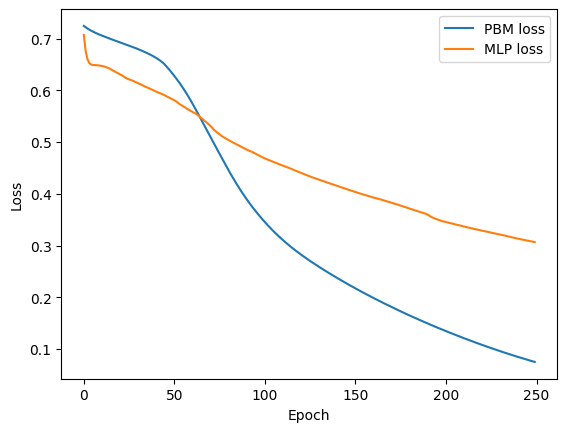

Accuracy (deep): 0.80
Epoch: 0,loss p: 0.72420, loss joint: 0.75909
Epoch: 0, acc joint: 0.48161
Epoch: 1,loss p: 0.72162, loss joint: 0.71653
Epoch: 1, acc joint: 0.59370
Epoch: 2,loss p: 0.71922, loss joint: 0.69511
Epoch: 2, acc joint: 0.66375
Epoch: 3,loss p: 0.71702, loss joint: 0.68316
Epoch: 3, acc joint: 0.67776
Epoch: 4,loss p: 0.71500, loss joint: 0.67728
Epoch: 4, acc joint: 0.68126
Epoch: 5,loss p: 0.71317, loss joint: 0.67384
Epoch: 5, acc joint: 0.68126
Epoch: 6,loss p: 0.71146, loss joint: 0.67162
Epoch: 6, acc joint: 0.68126
Epoch: 7,loss p: 0.70983, loss joint: 0.67002
Epoch: 7, acc joint: 0.68476
Epoch: 8,loss p: 0.70825, loss joint: 0.66743
Epoch: 8, acc joint: 0.68476
Epoch: 9,loss p: 0.70675, loss joint: 0.66472
Epoch: 9, acc joint: 0.68301
Epoch: 10,loss p: 0.70530, loss joint: 0.66175
Epoch: 10, acc joint: 0.68651
Epoch: 11,loss p: 0.70388, loss joint: 0.65881
Epoch: 11, acc joint: 0.68827
Epoch: 12,loss p: 0.70245, loss joint: 0.65556
Epoch: 12, acc joint: 0.686

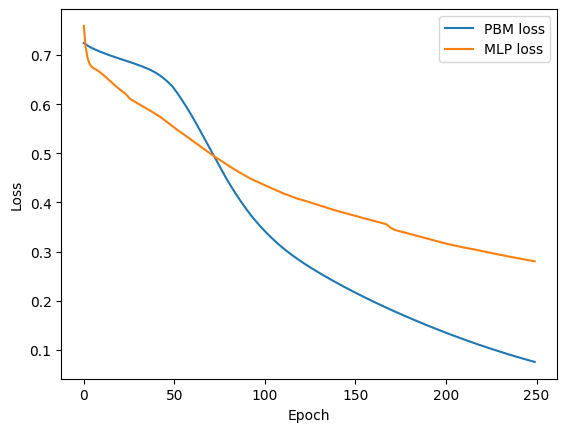

Accuracy (deep): 0.79
Joint: 80.43% (+/- 1.87%)


In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split

# train-test split: Hold out the test set for final model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
#print(y_train.shape)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores_joint = []
for train, test in kfold.split(X_train, y_train):
    # create model, train, and get accuracy
    lr_p = 0.00001
    lr_mlp = 0.00001
    alpha = 0.8
    model = Deep1()
    acc = model_train(model, X_train[train], X_train[test],y_train[train], y_train[test], alpha, lr_p, lr_mlp)

    print("Accuracy (deep): %.2f" % acc)
    cv_scores_joint.append(acc)


# evaluate the model
joint_acc = np.mean(cv_scores_joint)
joint_std = np.std(cv_scores_joint)

print("Joint: %.2f%% (+/- %.2f%%)" % (joint_acc*100, joint_std*100))


Epoch: 0,loss p: 0.75625, loss joint: 1.26798
Epoch: 0, acc joint: 0.59965
Epoch: 1,loss p: 0.75433, loss joint: 1.04242
Epoch: 1, acc joint: 0.62238
Epoch: 2,loss p: 0.75227, loss joint: 0.85774
Epoch: 2, acc joint: 0.63986
Epoch: 3,loss p: 0.75005, loss joint: 0.73524
Epoch: 3, acc joint: 0.64685
Epoch: 4,loss p: 0.74767, loss joint: 0.67108
Epoch: 4, acc joint: 0.64510
Epoch: 5,loss p: 0.74518, loss joint: 0.64049
Epoch: 5, acc joint: 0.65559
Epoch: 6,loss p: 0.74261, loss joint: 0.62458
Epoch: 6, acc joint: 0.65734
Epoch: 7,loss p: 0.74001, loss joint: 0.61366
Epoch: 7, acc joint: 0.65734
Epoch: 8,loss p: 0.73741, loss joint: 0.60499
Epoch: 8, acc joint: 0.65385
Epoch: 9,loss p: 0.73483, loss joint: 0.59774
Epoch: 9, acc joint: 0.65210
Epoch: 10,loss p: 0.73228, loss joint: 0.59199
Epoch: 10, acc joint: 0.65559
Epoch: 11,loss p: 0.72978, loss joint: 0.58725
Epoch: 11, acc joint: 0.67308
Epoch: 12,loss p: 0.72734, loss joint: 0.58270
Epoch: 12, acc joint: 0.66434
Epoch: 13,loss p: 0

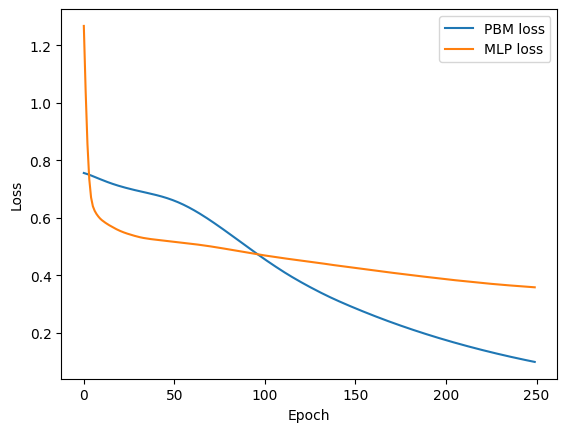

Accuracy (deep): 0.83
Epoch: 0,loss p: 0.68159, loss joint: 34.47499
Epoch: 0, acc joint: 0.47636
Epoch: 1,loss p: 0.67155, loss joint: 26.52671
Epoch: 1, acc joint: 0.47110
Epoch: 2,loss p: 0.66266, loss joint: 4.95389
Epoch: 2, acc joint: 0.45884
Epoch: 3,loss p: 0.65511, loss joint: 3.34533
Epoch: 3, acc joint: 0.49562
Epoch: 4,loss p: 0.65039, loss joint: 2.46848
Epoch: 4, acc joint: 0.55692
Epoch: 5,loss p: 0.64872, loss joint: 2.07960
Epoch: 5, acc joint: 0.57968
Epoch: 6,loss p: 0.64803, loss joint: 1.82632
Epoch: 6, acc joint: 0.57618
Epoch: 7,loss p: 0.64772, loss joint: 1.62625
Epoch: 7, acc joint: 0.55342
Epoch: 8,loss p: 0.64761, loss joint: 1.45904
Epoch: 8, acc joint: 0.56392
Epoch: 9,loss p: 0.64759, loss joint: 1.31912
Epoch: 9, acc joint: 0.57093
Epoch: 10,loss p: 0.64760, loss joint: 1.20298
Epoch: 10, acc joint: 0.57443
Epoch: 11,loss p: 0.64757, loss joint: 1.10697
Epoch: 11, acc joint: 0.57443
Epoch: 12,loss p: 0.64742, loss joint: 1.02927
Epoch: 12, acc joint: 0.5

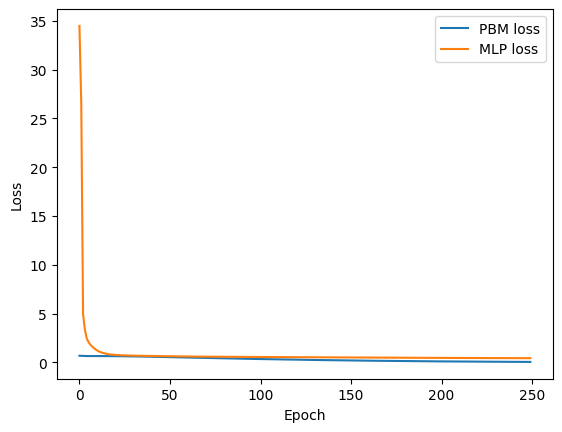

Accuracy (deep): 0.81
Epoch: 0,loss p: 0.75694, loss joint: 1.12873
Epoch: 0, acc joint: 0.63047
Epoch: 1,loss p: 0.75496, loss joint: 0.94164
Epoch: 1, acc joint: 0.64448
Epoch: 2,loss p: 0.75283, loss joint: 0.78309
Epoch: 2, acc joint: 0.63573
Epoch: 3,loss p: 0.75056, loss joint: 0.68215
Epoch: 3, acc joint: 0.62872
Epoch: 4,loss p: 0.74815, loss joint: 0.64286
Epoch: 4, acc joint: 0.66550
Epoch: 5,loss p: 0.74564, loss joint: 0.63309
Epoch: 5, acc joint: 0.66900
Epoch: 6,loss p: 0.74306, loss joint: 0.62862
Epoch: 6, acc joint: 0.68301
Epoch: 7,loss p: 0.74047, loss joint: 0.62406
Epoch: 7, acc joint: 0.68827
Epoch: 8,loss p: 0.73789, loss joint: 0.61861
Epoch: 8, acc joint: 0.69352
Epoch: 9,loss p: 0.73534, loss joint: 0.61293
Epoch: 9, acc joint: 0.69527
Epoch: 10,loss p: 0.73282, loss joint: 0.60729
Epoch: 10, acc joint: 0.69702
Epoch: 11,loss p: 0.73035, loss joint: 0.60161
Epoch: 11, acc joint: 0.70228
Epoch: 12,loss p: 0.72794, loss joint: 0.59601
Epoch: 12, acc joint: 0.704

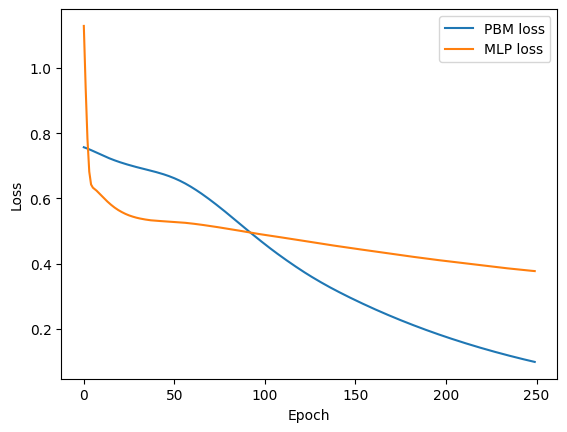

Accuracy (deep): 0.80
Epoch: 0,loss p: 0.75669, loss joint: 1.03402
Epoch: 0, acc joint: 0.62172
Epoch: 1,loss p: 0.75462, loss joint: 0.96544
Epoch: 1, acc joint: 0.63222
Epoch: 2,loss p: 0.75244, loss joint: 0.91048
Epoch: 2, acc joint: 0.63748
Epoch: 3,loss p: 0.75014, loss joint: 0.86924
Epoch: 3, acc joint: 0.63748
Epoch: 4,loss p: 0.74771, loss joint: 0.83733
Epoch: 4, acc joint: 0.65149
Epoch: 5,loss p: 0.74518, loss joint: 0.80883
Epoch: 5, acc joint: 0.64623
Epoch: 6,loss p: 0.74258, loss joint: 0.78203
Epoch: 6, acc joint: 0.65499
Epoch: 7,loss p: 0.73995, loss joint: 0.75769
Epoch: 7, acc joint: 0.66550
Epoch: 8,loss p: 0.73733, loss joint: 0.73650
Epoch: 8, acc joint: 0.66900
Epoch: 9,loss p: 0.73472, loss joint: 0.71840
Epoch: 9, acc joint: 0.67250
Epoch: 10,loss p: 0.73216, loss joint: 0.70274
Epoch: 10, acc joint: 0.66900
Epoch: 11,loss p: 0.72965, loss joint: 0.68880
Epoch: 11, acc joint: 0.67776
Epoch: 12,loss p: 0.72720, loss joint: 0.67647
Epoch: 12, acc joint: 0.681

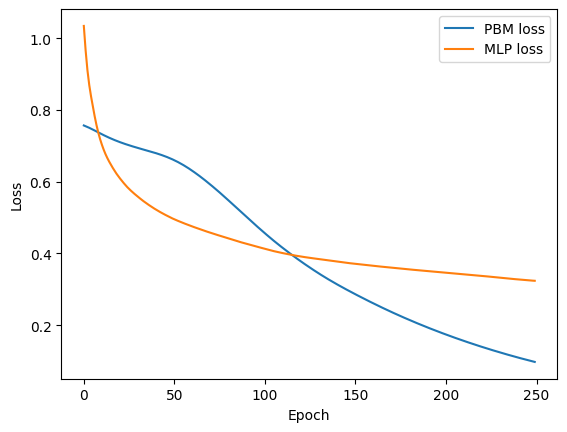

Accuracy (deep): 0.78
Epoch: 0,loss p: 0.75708, loss joint: 0.88110
Epoch: 0, acc joint: 0.61296
Epoch: 1,loss p: 0.75516, loss joint: 0.78392
Epoch: 1, acc joint: 0.62872
Epoch: 2,loss p: 0.75309, loss joint: 0.69922
Epoch: 2, acc joint: 0.63398
Epoch: 3,loss p: 0.75092, loss joint: 0.64945
Epoch: 3, acc joint: 0.65149
Epoch: 4,loss p: 0.74864, loss joint: 0.63590
Epoch: 4, acc joint: 0.64974
Epoch: 5,loss p: 0.74626, loss joint: 0.63617
Epoch: 5, acc joint: 0.64799
Epoch: 6,loss p: 0.74376, loss joint: 0.63480
Epoch: 6, acc joint: 0.65149
Epoch: 7,loss p: 0.74120, loss joint: 0.63065
Epoch: 7, acc joint: 0.65149
Epoch: 8,loss p: 0.73862, loss joint: 0.62361
Epoch: 8, acc joint: 0.64799
Epoch: 9,loss p: 0.73606, loss joint: 0.61589
Epoch: 9, acc joint: 0.65674
Epoch: 10,loss p: 0.73353, loss joint: 0.60799
Epoch: 10, acc joint: 0.67075
Epoch: 11,loss p: 0.73104, loss joint: 0.60069
Epoch: 11, acc joint: 0.67601
Epoch: 12,loss p: 0.72860, loss joint: 0.59371
Epoch: 12, acc joint: 0.683

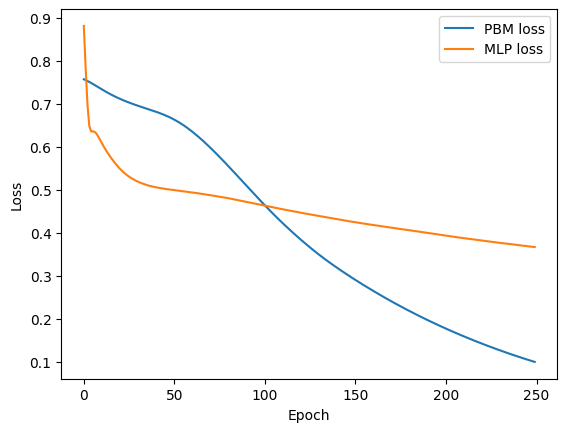

Accuracy (deep): 0.80
Joint: 80.39% (+/- 1.39%)


In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split

# train-test split: Hold out the test set for final model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
#print(y_train.shape)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores_joint = []
for train, test in kfold.split(X_train, y_train):
    # create model, train, and get accuracy
    lr_p = 0.00001
    lr_mlp = 0.00001
    alpha = 0.8
    model = Wide()
    acc = model_train(model, X_train[train], X_train[test],y_train[train], y_train[test], alpha, lr_p, lr_mlp)

    print("Accuracy (deep): %.2f" % acc)
    cv_scores_joint.append(acc)


# evaluate the model
joint_acc = np.mean(cv_scores_joint)
joint_std = np.std(cv_scores_joint)

print("Joint: %.2f%% (+/- %.2f%%)" % (joint_acc*100, joint_std*100))


In [ ]:
import pandas as pd

# Read data
data = pd.read_csv("GapSimLKLCrandsmall_20_80.csv")
print(data)
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]
print(X)
print(y)

        DV1    DV2     DV3       V       G1       G2        G3      Dend  \
0     1.384  0.082 -7.9281  14.018  49.6286  10.6654  202.0216  145.7748   
1     1.264  0.112 -7.9100  14.006  49.5056  10.6504  201.2316  147.1748   
2     1.219  0.106 -7.9160  14.012  49.3876  10.6384  200.4416  148.5748   
3     1.219  0.085 -7.9190  14.015  49.2666  10.6274  199.6416  149.9748   
4     1.225  0.030 -7.9190  14.015  49.1446  10.6164  198.8516  151.3748   
...     ...    ...     ...     ...      ...      ...       ...       ...   
5569  1.914 -1.823 -5.3431  12.957  18.4540  25.3780  183.4000  169.1348   
5570  1.805 -1.545 -5.2241  12.835  18.2680  25.5460  182.8700  170.4248   
5571  1.667 -1.308 -5.1267  12.765  18.0900  25.6810  182.3500  171.6948   
5572  1.439 -1.167 -5.1023  12.832  17.9230  25.7940  181.8500  172.9548   
5573  1.082 -1.140 -5.1629  13.042  17.7840  25.8990  181.3500  174.2448   

         Carid  label_targetlane  
0    -1.550351                 1  
1    -1.550351   

In [ ]:
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32)
print(X.shape)
print(y.shape)

torch.Size([5574, 9])
torch.Size([5574, 1])


In [ ]:
import torch.nn as nn
class PBM(nn.Module):
    def __init__(self):
        super(PBM, self).__init__()
        
        # Define the trainable parameters
        #self.interceptfo = nn.Parameter(torch.tensor(100., requires_grad = True))
        #self.interceptlead = nn.Parameter(torch.tensor(100., requires_grad = True))
        #self.interceptlag = nn.Parameter(torch.tensor(100., requires_grad = True))
        self.betaDV1fo = nn.Parameter(torch.tensor(0.0340, requires_grad = True))
        self.betaDV2lead = nn.Parameter(torch.tensor(0.0747, requires_grad = True))
        self.betaDV3lag = nn.Parameter(torch.tensor(0.1890, requires_grad = True))
        self.betaV = nn.Parameter(torch.tensor(0.0450, requires_grad = True))
        self.betaG1 = nn.Parameter(torch.tensor(0.0288, requires_grad = True))
        self.betaG2 = nn.Parameter(torch.tensor(0., requires_grad = True))
        self.betaG3 = nn.Parameter(torch.tensor(0.0023, requires_grad = True))
        
        self.alphaveh = nn.Parameter(torch.tensor(1., requires_grad = True))
        self.betaD = nn.Parameter(torch.tensor(0.0006, requires_grad = True))

        

    def forward(self, X):
        # Compute the utilities
        U_fo =  self.betaDV1fo * X[:, 0] + self.betaG1 * X[:, 4] + self.betaD * X[:, 7]
        U_lead =  self.betaDV2lead * X[:, 1] + self.betaG2 * X[:, 5] + self.betaD * X[:, 7]
        U_lag =  self.betaDV3lag * X[:, 2] + self.betaG3 * X[:, 6]  + self.betaD * X[:, 7]
        
        # Compute the gaps and probabilities
        Gfo = torch.log(X[:, 4]) - U_fo
        Glead = torch.log(X[:, 5]) - U_lead
        Glag = torch.log(X[:, 6]) - U_lag
        

        Gaplead = torch.distributions.normal.Normal(loc=0, scale=self.alphaveh).cdf(Glead / self.alphaveh)
        Gaplag = torch.distributions.normal.Normal(loc=0, scale=self.alphaveh).cdf(Glag / self.alphaveh)
        Gapfo = torch.distributions.normal.Normal(loc=0, scale=self.alphaveh).cdf(Gfo / self.alphaveh)
        P_LC = Gaplead * Gaplag * Gapfo
        
        # Generate the acceptance probabilities
        #rand_num = torch.rand(X.shape[0]).to(self.device)
        #P = torch.where(rand_num > P_LC, torch.ones_like(rand_num), torch.zeros_like(rand_num))
        
        return P_LC.reshape(-1, 1)


Epoch: 0,loss p: 0.88717, loss joint: 0.76822
Epoch: 0, acc joint: 0.52881
Epoch: 1,loss p: 0.87767, loss joint: 0.73089
Epoch: 1, acc joint: 0.60051
Epoch: 2,loss p: 0.86873, loss joint: 0.70876
Epoch: 2, acc joint: 0.62356
Epoch: 3,loss p: 0.86036, loss joint: 0.69489
Epoch: 3, acc joint: 0.63124
Epoch: 4,loss p: 0.85233, loss joint: 0.68008
Epoch: 4, acc joint: 0.64277
Epoch: 5,loss p: 0.84454, loss joint: 0.66158
Epoch: 5, acc joint: 0.66325
Epoch: 6,loss p: 0.83696, loss joint: 0.65317
Epoch: 6, acc joint: 0.66453
Epoch: 7,loss p: 0.82975, loss joint: 0.64920
Epoch: 7, acc joint: 0.66581
Epoch: 8,loss p: 0.82280, loss joint: 0.64581
Epoch: 8, acc joint: 0.67606
Epoch: 9,loss p: 0.81605, loss joint: 0.64296
Epoch: 9, acc joint: 0.67990
Epoch: 10,loss p: 0.80946, loss joint: 0.64019
Epoch: 10, acc joint: 0.67862
Epoch: 11,loss p: 0.80295, loss joint: 0.63714
Epoch: 11, acc joint: 0.67862
Epoch: 12,loss p: 0.79650, loss joint: 0.63366
Epoch: 12, acc joint: 0.68246
Epoch: 13,loss p: 0

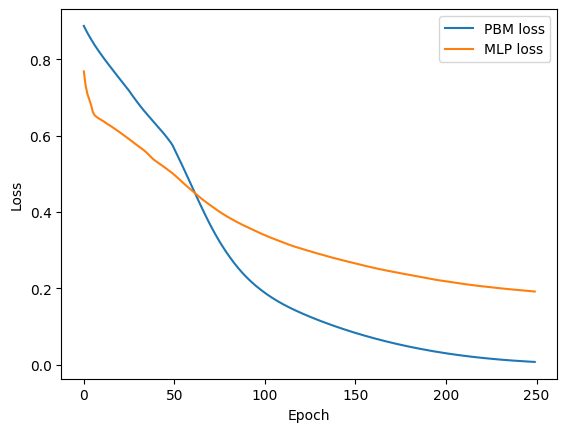

Accuracy (deep): 0.82
Epoch: 0,loss p: 0.93640, loss joint: 0.72896
Epoch: 0, acc joint: 0.70513
Epoch: 1,loss p: 0.92715, loss joint: 0.71842
Epoch: 1, acc joint: 0.70897
Epoch: 2,loss p: 0.91773, loss joint: 0.71199
Epoch: 2, acc joint: 0.71282
Epoch: 3,loss p: 0.90823, loss joint: 0.70719
Epoch: 3, acc joint: 0.71410
Epoch: 4,loss p: 0.89876, loss joint: 0.70225
Epoch: 4, acc joint: 0.71538
Epoch: 5,loss p: 0.88945, loss joint: 0.69735
Epoch: 5, acc joint: 0.71795
Epoch: 6,loss p: 0.88018, loss joint: 0.69268
Epoch: 6, acc joint: 0.71923
Epoch: 7,loss p: 0.87093, loss joint: 0.68839
Epoch: 7, acc joint: 0.71923
Epoch: 8,loss p: 0.86164, loss joint: 0.68375
Epoch: 8, acc joint: 0.71795
Epoch: 9,loss p: 0.85240, loss joint: 0.67888
Epoch: 9, acc joint: 0.72179
Epoch: 10,loss p: 0.84300, loss joint: 0.67342
Epoch: 10, acc joint: 0.72179
Epoch: 11,loss p: 0.83336, loss joint: 0.66786
Epoch: 11, acc joint: 0.72564
Epoch: 12,loss p: 0.82388, loss joint: 0.66303
Epoch: 12, acc joint: 0.726

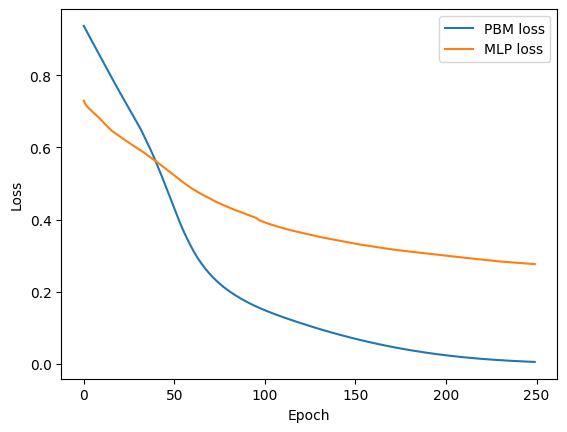

Accuracy (deep): 0.86
Epoch: 0,loss p: 0.92135, loss joint: 0.69398
Epoch: 0, acc joint: 0.52821
Epoch: 1,loss p: 0.91583, loss joint: 0.66529
Epoch: 1, acc joint: 0.66026
Epoch: 2,loss p: 0.90888, loss joint: 0.66244
Epoch: 2, acc joint: 0.67308
Epoch: 3,loss p: 0.90174, loss joint: 0.65905
Epoch: 3, acc joint: 0.67308
Epoch: 4,loss p: 0.89473, loss joint: 0.65509
Epoch: 4, acc joint: 0.67179
Epoch: 5,loss p: 0.88793, loss joint: 0.65088
Epoch: 5, acc joint: 0.67949
Epoch: 6,loss p: 0.88124, loss joint: 0.64637
Epoch: 6, acc joint: 0.68718
Epoch: 7,loss p: 0.87451, loss joint: 0.64183
Epoch: 7, acc joint: 0.68974
Epoch: 8,loss p: 0.86766, loss joint: 0.63877
Epoch: 8, acc joint: 0.69231
Epoch: 9,loss p: 0.86065, loss joint: 0.63622
Epoch: 9, acc joint: 0.69744
Epoch: 10,loss p: 0.85354, loss joint: 0.63374
Epoch: 10, acc joint: 0.70385
Epoch: 11,loss p: 0.84612, loss joint: 0.63109
Epoch: 11, acc joint: 0.70897
Epoch: 12,loss p: 0.83813, loss joint: 0.62787
Epoch: 12, acc joint: 0.710

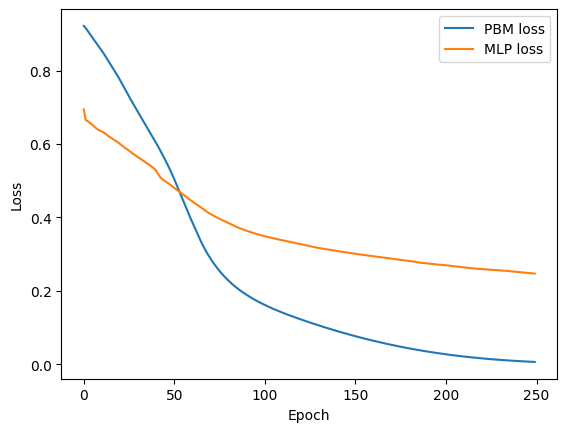

Accuracy (deep): 0.82
Epoch: 0,loss p: 0.92130, loss joint: 0.65078
Epoch: 0, acc joint: 0.54103
Epoch: 1,loss p: 0.91578, loss joint: 0.61883
Epoch: 1, acc joint: 0.67308
Epoch: 2,loss p: 0.90878, loss joint: 0.61277
Epoch: 2, acc joint: 0.68205
Epoch: 3,loss p: 0.90160, loss joint: 0.60681
Epoch: 3, acc joint: 0.68205
Epoch: 4,loss p: 0.89455, loss joint: 0.60158
Epoch: 4, acc joint: 0.68205
Epoch: 5,loss p: 0.88770, loss joint: 0.59590
Epoch: 5, acc joint: 0.68333
Epoch: 6,loss p: 0.88094, loss joint: 0.59014
Epoch: 6, acc joint: 0.68333
Epoch: 7,loss p: 0.87418, loss joint: 0.58466
Epoch: 7, acc joint: 0.68846
Epoch: 8,loss p: 0.86733, loss joint: 0.58082
Epoch: 8, acc joint: 0.69615
Epoch: 9,loss p: 0.86032, loss joint: 0.57750
Epoch: 9, acc joint: 0.69615
Epoch: 10,loss p: 0.85317, loss joint: 0.57418
Epoch: 10, acc joint: 0.69744
Epoch: 11,loss p: 0.84569, loss joint: 0.57040
Epoch: 11, acc joint: 0.70128
Epoch: 12,loss p: 0.83765, loss joint: 0.56634
Epoch: 12, acc joint: 0.705

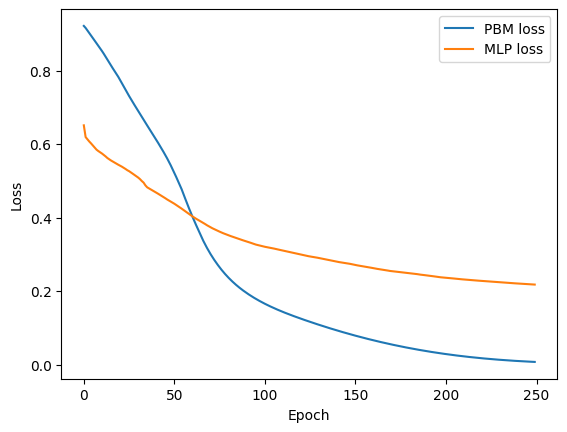

Accuracy (deep): 0.84
Epoch: 0,loss p: 0.92132, loss joint: 0.66139
Epoch: 0, acc joint: 0.52179
Epoch: 1,loss p: 0.91583, loss joint: 0.62436
Epoch: 1, acc joint: 0.64615
Epoch: 2,loss p: 0.90886, loss joint: 0.61578
Epoch: 2, acc joint: 0.65769
Epoch: 3,loss p: 0.90165, loss joint: 0.60796
Epoch: 3, acc joint: 0.66795
Epoch: 4,loss p: 0.89460, loss joint: 0.60104
Epoch: 4, acc joint: 0.67564
Epoch: 5,loss p: 0.88774, loss joint: 0.59457
Epoch: 5, acc joint: 0.68205
Epoch: 6,loss p: 0.88102, loss joint: 0.58839
Epoch: 6, acc joint: 0.69487
Epoch: 7,loss p: 0.87430, loss joint: 0.58248
Epoch: 7, acc joint: 0.70000
Epoch: 8,loss p: 0.86746, loss joint: 0.57773
Epoch: 8, acc joint: 0.70000
Epoch: 9,loss p: 0.86038, loss joint: 0.57390
Epoch: 9, acc joint: 0.70385
Epoch: 10,loss p: 0.85291, loss joint: 0.57089
Epoch: 10, acc joint: 0.70513
Epoch: 11,loss p: 0.84488, loss joint: 0.56801
Epoch: 11, acc joint: 0.70641
Epoch: 12,loss p: 0.83662, loss joint: 0.56413
Epoch: 12, acc joint: 0.716

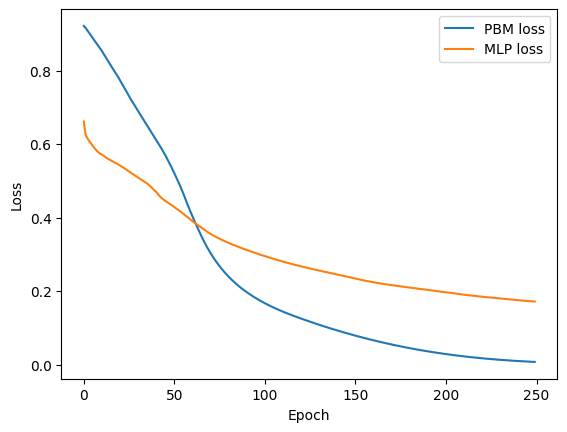

Accuracy (deep): 0.83
Joint: 83.29% (+/- 1.35%)


In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split

# train-test split: Hold out the test set for final model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
#print(y_train.shape)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores_joint = []
for train, test in kfold.split(X_train, y_train):
    # create model, train, and get accuracy
    lr_p = 0.00001
    lr_mlp = 0.00001
    alpha = 0.8
    model = Deep()
    acc = model_train(model, X_train[train], X_train[test],y_train[train], y_train[test], alpha, lr_p, lr_mlp)

    print("Accuracy (deep): %.2f" % acc)
    cv_scores_joint.append(acc)


# evaluate the model
joint_acc = np.mean(cv_scores_joint)
joint_std = np.std(cv_scores_joint)

print("Joint: %.2f%% (+/- %.2f%%)" % (joint_acc*100, joint_std*100))


Epoch: 0,loss p: 0.92081, loss joint: 0.78423
Epoch: 0, acc joint: 0.54802
Epoch: 1,loss p: 0.91480, loss joint: 0.73584
Epoch: 1, acc joint: 0.67222
Epoch: 2,loss p: 0.90686, loss joint: 0.72872
Epoch: 2, acc joint: 0.68246
Epoch: 3,loss p: 0.89881, loss joint: 0.72756
Epoch: 3, acc joint: 0.67862
Epoch: 4,loss p: 0.89096, loss joint: 0.72515
Epoch: 4, acc joint: 0.67990
Epoch: 5,loss p: 0.88310, loss joint: 0.72037
Epoch: 5, acc joint: 0.68374
Epoch: 6,loss p: 0.87516, loss joint: 0.71541
Epoch: 6, acc joint: 0.70038
Epoch: 7,loss p: 0.86680, loss joint: 0.70980
Epoch: 7, acc joint: 0.69910
Epoch: 8,loss p: 0.85816, loss joint: 0.70424
Epoch: 8, acc joint: 0.70679
Epoch: 9,loss p: 0.84957, loss joint: 0.69921
Epoch: 9, acc joint: 0.70935
Epoch: 10,loss p: 0.84086, loss joint: 0.69404
Epoch: 10, acc joint: 0.70935
Epoch: 11,loss p: 0.83212, loss joint: 0.68874
Epoch: 11, acc joint: 0.71575
Epoch: 12,loss p: 0.82347, loss joint: 0.68428
Epoch: 12, acc joint: 0.71831
Epoch: 13,loss p: 0

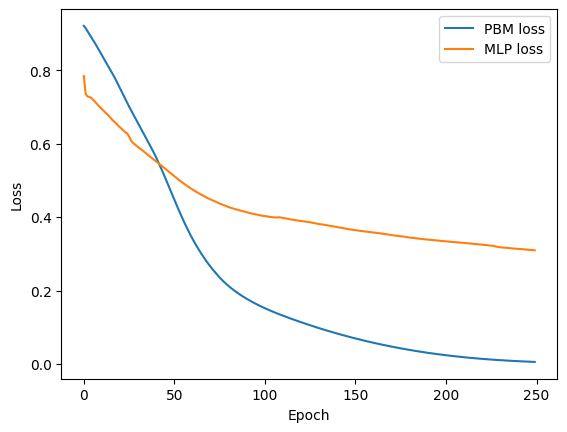

Accuracy (deep): 0.86
Epoch: 0,loss p: 0.93540, loss joint: 0.68668
Epoch: 0, acc joint: 0.69359
Epoch: 1,loss p: 0.92567, loss joint: 0.67549
Epoch: 1, acc joint: 0.70385
Epoch: 2,loss p: 0.91570, loss joint: 0.67173
Epoch: 2, acc joint: 0.71538
Epoch: 3,loss p: 0.90546, loss joint: 0.67029
Epoch: 3, acc joint: 0.71538
Epoch: 4,loss p: 0.89519, loss joint: 0.66812
Epoch: 4, acc joint: 0.71923
Epoch: 5,loss p: 0.88503, loss joint: 0.66531
Epoch: 5, acc joint: 0.72308
Epoch: 6,loss p: 0.87494, loss joint: 0.66258
Epoch: 6, acc joint: 0.72564
Epoch: 7,loss p: 0.86484, loss joint: 0.65957
Epoch: 7, acc joint: 0.72949
Epoch: 8,loss p: 0.85461, loss joint: 0.65595
Epoch: 8, acc joint: 0.72692
Epoch: 9,loss p: 0.84416, loss joint: 0.65160
Epoch: 9, acc joint: 0.73205
Epoch: 10,loss p: 0.83374, loss joint: 0.64682
Epoch: 10, acc joint: 0.73462
Epoch: 11,loss p: 0.82373, loss joint: 0.64104
Epoch: 11, acc joint: 0.73590
Epoch: 12,loss p: 0.81379, loss joint: 0.63614
Epoch: 12, acc joint: 0.737

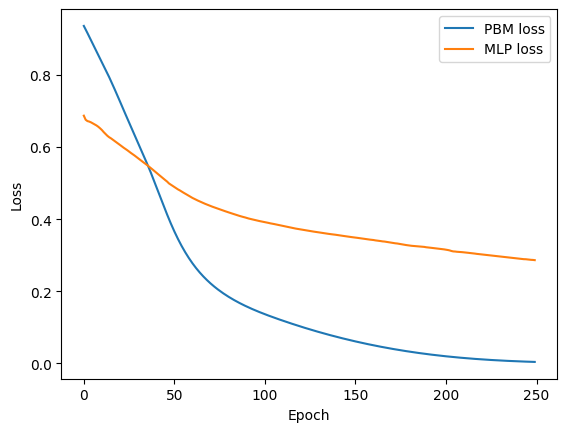

Accuracy (deep): 0.84
Epoch: 0,loss p: 0.92070, loss joint: 0.73716
Epoch: 0, acc joint: 0.52436
Epoch: 1,loss p: 0.91479, loss joint: 0.71321
Epoch: 1, acc joint: 0.67949
Epoch: 2,loss p: 0.90696, loss joint: 0.71670
Epoch: 2, acc joint: 0.68974
Epoch: 3,loss p: 0.89898, loss joint: 0.71951
Epoch: 3, acc joint: 0.69231
Epoch: 4,loss p: 0.89112, loss joint: 0.72022
Epoch: 4, acc joint: 0.69872
Epoch: 5,loss p: 0.88321, loss joint: 0.71858
Epoch: 5, acc joint: 0.69872
Epoch: 6,loss p: 0.87506, loss joint: 0.71515
Epoch: 6, acc joint: 0.69744
Epoch: 7,loss p: 0.86661, loss joint: 0.71047
Epoch: 7, acc joint: 0.70256
Epoch: 8,loss p: 0.85799, loss joint: 0.70626
Epoch: 8, acc joint: 0.70897
Epoch: 9,loss p: 0.84940, loss joint: 0.70270
Epoch: 9, acc joint: 0.71154
Epoch: 10,loss p: 0.84087, loss joint: 0.70031
Epoch: 10, acc joint: 0.71410
Epoch: 11,loss p: 0.83220, loss joint: 0.69629
Epoch: 11, acc joint: 0.71667
Epoch: 12,loss p: 0.82381, loss joint: 0.69256
Epoch: 12, acc joint: 0.724

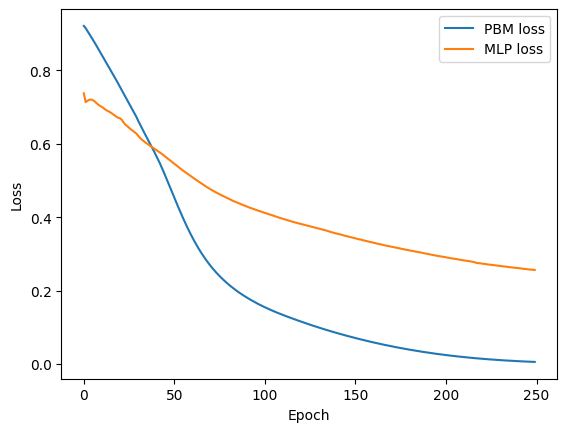

Accuracy (deep): 0.83
Epoch: 0,loss p: 0.92060, loss joint: 0.75439
Epoch: 0, acc joint: 0.51154
Epoch: 1,loss p: 0.91468, loss joint: 0.72112
Epoch: 1, acc joint: 0.60897
Epoch: 2,loss p: 0.90684, loss joint: 0.72148
Epoch: 2, acc joint: 0.63205
Epoch: 3,loss p: 0.89883, loss joint: 0.72243
Epoch: 3, acc joint: 0.63590
Epoch: 4,loss p: 0.89096, loss joint: 0.72136
Epoch: 4, acc joint: 0.63974
Epoch: 5,loss p: 0.88292, loss joint: 0.71758
Epoch: 5, acc joint: 0.63974
Epoch: 6,loss p: 0.87468, loss joint: 0.71220
Epoch: 6, acc joint: 0.62949
Epoch: 7,loss p: 0.86633, loss joint: 0.70695
Epoch: 7, acc joint: 0.63590
Epoch: 8,loss p: 0.85767, loss joint: 0.70193
Epoch: 8, acc joint: 0.63974
Epoch: 9,loss p: 0.84902, loss joint: 0.69748
Epoch: 9, acc joint: 0.64744
Epoch: 10,loss p: 0.84039, loss joint: 0.69348
Epoch: 10, acc joint: 0.64872
Epoch: 11,loss p: 0.83173, loss joint: 0.68889
Epoch: 11, acc joint: 0.65000
Epoch: 12,loss p: 0.82317, loss joint: 0.68492
Epoch: 12, acc joint: 0.657

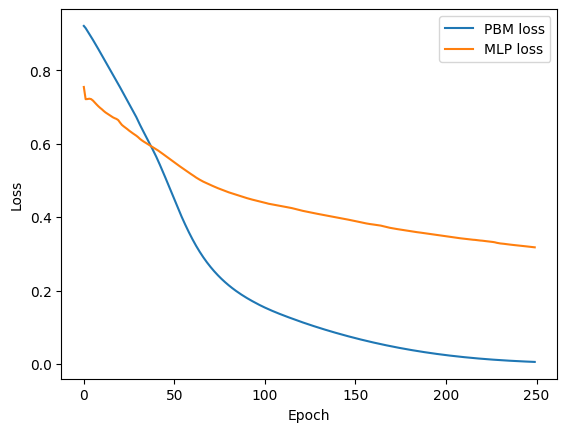

Accuracy (deep): 0.82
Epoch: 0,loss p: 0.92074, loss joint: 0.75988
Epoch: 0, acc joint: 0.51282
Epoch: 1,loss p: 0.91480, loss joint: 0.70917
Epoch: 1, acc joint: 0.64359
Epoch: 2,loss p: 0.90694, loss joint: 0.70305
Epoch: 2, acc joint: 0.63846
Epoch: 3,loss p: 0.89891, loss joint: 0.70211
Epoch: 3, acc joint: 0.63590
Epoch: 4,loss p: 0.89104, loss joint: 0.69930
Epoch: 4, acc joint: 0.63974
Epoch: 5,loss p: 0.88318, loss joint: 0.69483
Epoch: 5, acc joint: 0.65128
Epoch: 6,loss p: 0.87526, loss joint: 0.68942
Epoch: 6, acc joint: 0.65513
Epoch: 7,loss p: 0.86695, loss joint: 0.68378
Epoch: 7, acc joint: 0.66538
Epoch: 8,loss p: 0.85835, loss joint: 0.67884
Epoch: 8, acc joint: 0.66923
Epoch: 9,loss p: 0.84984, loss joint: 0.67445
Epoch: 9, acc joint: 0.67051
Epoch: 10,loss p: 0.84118, loss joint: 0.66989
Epoch: 10, acc joint: 0.67692
Epoch: 11,loss p: 0.83270, loss joint: 0.66523
Epoch: 11, acc joint: 0.67821
Epoch: 12,loss p: 0.82440, loss joint: 0.66112
Epoch: 12, acc joint: 0.679

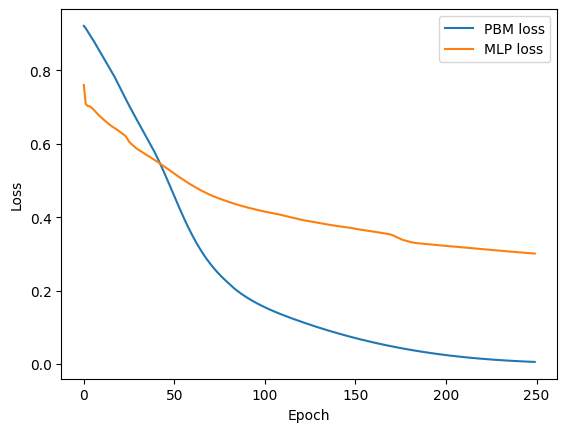

Accuracy (deep): 0.85
Joint: 83.95% (+/- 1.40%)


In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split

# train-test split: Hold out the test set for final model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
#print(y_train.shape)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores_joint = []
for train, test in kfold.split(X_train, y_train):
    # create model, train, and get accuracy
    lr_p = 0.00001
    lr_mlp = 0.00001
    alpha = 0.8
    model = Deep1()
    acc = model_train(model, X_train[train], X_train[test],y_train[train], y_train[test], alpha, lr_p, lr_mlp)

    print("Accuracy (deep): %.2f" % acc)
    cv_scores_joint.append(acc)


# evaluate the model
joint_acc = np.mean(cv_scores_joint)
joint_std = np.std(cv_scores_joint)

print("Joint: %.2f%% (+/- %.2f%%)" % (joint_acc*100, joint_std*100))


Epoch: 0,loss p: 0.99402, loss joint: 1.96980
Epoch: 0, acc joint: 0.38924
Epoch: 1,loss p: 0.97377, loss joint: 1.66388
Epoch: 1, acc joint: 0.39949
Epoch: 2,loss p: 0.95363, loss joint: 1.40537
Epoch: 2, acc joint: 0.41485
Epoch: 3,loss p: 0.93401, loss joint: 1.19928
Epoch: 3, acc joint: 0.44046
Epoch: 4,loss p: 0.91583, loss joint: 1.05110
Epoch: 4, acc joint: 0.49168
Epoch: 5,loss p: 0.89937, loss joint: 0.95409
Epoch: 5, acc joint: 0.54802
Epoch: 6,loss p: 0.88426, loss joint: 0.89227
Epoch: 6, acc joint: 0.56850
Epoch: 7,loss p: 0.86999, loss joint: 0.85091
Epoch: 7, acc joint: 0.59667
Epoch: 8,loss p: 0.85616, loss joint: 0.82029
Epoch: 8, acc joint: 0.60435
Epoch: 9,loss p: 0.84280, loss joint: 0.79567
Epoch: 9, acc joint: 0.60563
Epoch: 10,loss p: 0.82983, loss joint: 0.77487
Epoch: 10, acc joint: 0.62612
Epoch: 11,loss p: 0.81711, loss joint: 0.75654
Epoch: 11, acc joint: 0.63508
Epoch: 12,loss p: 0.80467, loss joint: 0.74020
Epoch: 12, acc joint: 0.64533
Epoch: 13,loss p: 0

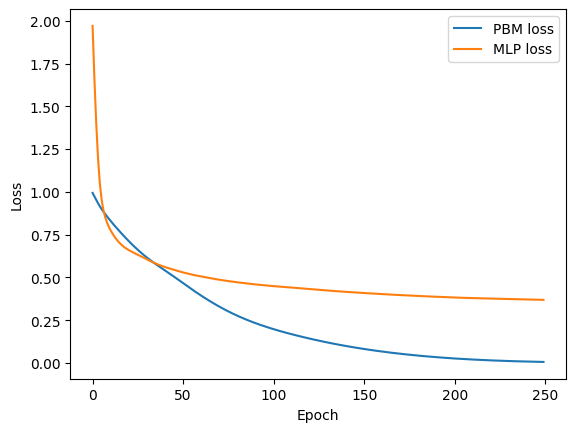

Accuracy (deep): 0.81
Epoch: 0,loss p: 0.96540, loss joint: 1.94017
Epoch: 0, acc joint: 0.41026
Epoch: 1,loss p: 0.94870, loss joint: 1.68857
Epoch: 1, acc joint: 0.42051
Epoch: 2,loss p: 0.93410, loss joint: 1.48521
Epoch: 2, acc joint: 0.42949
Epoch: 3,loss p: 0.92102, loss joint: 1.31923
Epoch: 3, acc joint: 0.45128
Epoch: 4,loss p: 0.90894, loss joint: 1.18158
Epoch: 4, acc joint: 0.46282
Epoch: 5,loss p: 0.89770, loss joint: 1.06770
Epoch: 5, acc joint: 0.47821
Epoch: 6,loss p: 0.88696, loss joint: 0.97448
Epoch: 6, acc joint: 0.49231
Epoch: 7,loss p: 0.87640, loss joint: 0.89718
Epoch: 7, acc joint: 0.48846
Epoch: 8,loss p: 0.86585, loss joint: 0.83957
Epoch: 8, acc joint: 0.49103
Epoch: 9,loss p: 0.85495, loss joint: 0.80468
Epoch: 9, acc joint: 0.50641
Epoch: 10,loss p: 0.84370, loss joint: 0.79597
Epoch: 10, acc joint: 0.52308
Epoch: 11,loss p: 0.83231, loss joint: 0.80168
Epoch: 11, acc joint: 0.56410
Epoch: 12,loss p: 0.82093, loss joint: 0.80668
Epoch: 12, acc joint: 0.585

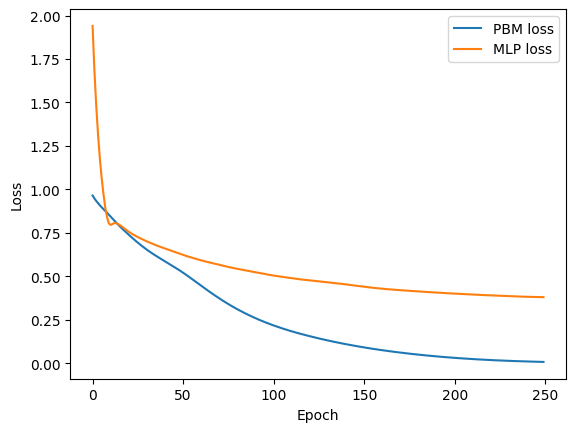

Accuracy (deep): 0.84
Epoch: 0,loss p: 0.99631, loss joint: 2.19241
Epoch: 0, acc joint: 0.39744
Epoch: 1,loss p: 0.97611, loss joint: 1.82642
Epoch: 1, acc joint: 0.41026
Epoch: 2,loss p: 0.95588, loss joint: 1.51454
Epoch: 2, acc joint: 0.42949
Epoch: 3,loss p: 0.93615, loss joint: 1.27137
Epoch: 3, acc joint: 0.42821
Epoch: 4,loss p: 0.91762, loss joint: 1.11325
Epoch: 4, acc joint: 0.47308
Epoch: 5,loss p: 0.90071, loss joint: 1.03298
Epoch: 5, acc joint: 0.52949
Epoch: 6,loss p: 0.88525, loss joint: 0.99337
Epoch: 6, acc joint: 0.55769
Epoch: 7,loss p: 0.87076, loss joint: 0.96954
Epoch: 7, acc joint: 0.57692
Epoch: 8,loss p: 0.85690, loss joint: 0.95190
Epoch: 8, acc joint: 0.58974
Epoch: 9,loss p: 0.84348, loss joint: 0.93589
Epoch: 9, acc joint: 0.59744
Epoch: 10,loss p: 0.83036, loss joint: 0.92028
Epoch: 10, acc joint: 0.62692
Epoch: 11,loss p: 0.81743, loss joint: 0.90495
Epoch: 11, acc joint: 0.63205
Epoch: 12,loss p: 0.80479, loss joint: 0.88962
Epoch: 12, acc joint: 0.635

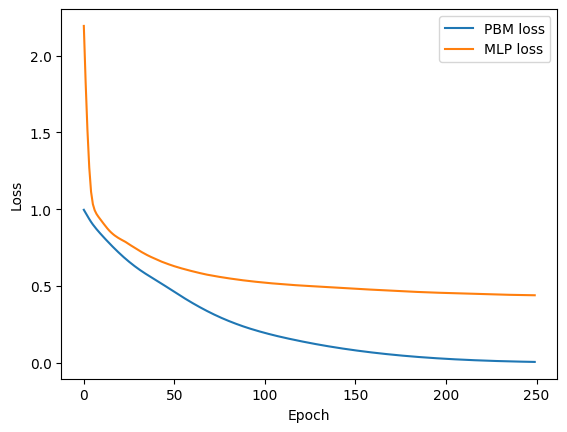

Accuracy (deep): 0.81
Epoch: 0,loss p: 0.99566, loss joint: 1.63544
Epoch: 0, acc joint: 0.41538
Epoch: 1,loss p: 0.97529, loss joint: 1.42985
Epoch: 1, acc joint: 0.42564
Epoch: 2,loss p: 0.95511, loss joint: 1.26062
Epoch: 2, acc joint: 0.43077
Epoch: 3,loss p: 0.93548, loss joint: 1.13371
Epoch: 3, acc joint: 0.44103
Epoch: 4,loss p: 0.91721, loss joint: 1.05094
Epoch: 4, acc joint: 0.48462
Epoch: 5,loss p: 0.90072, loss joint: 1.00166
Epoch: 5, acc joint: 0.54487
Epoch: 6,loss p: 0.88562, loss joint: 0.97135
Epoch: 6, acc joint: 0.57821
Epoch: 7,loss p: 0.87132, loss joint: 0.94987
Epoch: 7, acc joint: 0.60385
Epoch: 8,loss p: 0.85752, loss joint: 0.93259
Epoch: 8, acc joint: 0.61410
Epoch: 9,loss p: 0.84411, loss joint: 0.91714
Epoch: 9, acc joint: 0.62308
Epoch: 10,loss p: 0.83093, loss joint: 0.90273
Epoch: 10, acc joint: 0.63333
Epoch: 11,loss p: 0.81788, loss joint: 0.88825
Epoch: 11, acc joint: 0.65000
Epoch: 12,loss p: 0.80508, loss joint: 0.87383
Epoch: 12, acc joint: 0.652

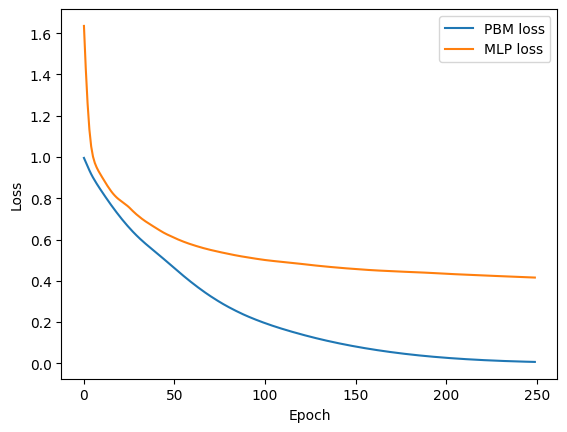

Accuracy (deep): 0.82
Epoch: 0,loss p: 0.99549, loss joint: 2.05460
Epoch: 0, acc joint: 0.42051
Epoch: 1,loss p: 0.97523, loss joint: 1.67966
Epoch: 1, acc joint: 0.43462
Epoch: 2,loss p: 0.95501, loss joint: 1.37156
Epoch: 2, acc joint: 0.45513
Epoch: 3,loss p: 0.93538, loss joint: 1.14239
Epoch: 3, acc joint: 0.48462
Epoch: 4,loss p: 0.91717, loss joint: 0.99512
Epoch: 4, acc joint: 0.50897
Epoch: 5,loss p: 0.90072, loss joint: 0.90568
Epoch: 5, acc joint: 0.54744
Epoch: 6,loss p: 0.88557, loss joint: 0.84627
Epoch: 6, acc joint: 0.57179
Epoch: 7,loss p: 0.87115, loss joint: 0.80273
Epoch: 7, acc joint: 0.60513
Epoch: 8,loss p: 0.85724, loss joint: 0.76898
Epoch: 8, acc joint: 0.61410
Epoch: 9,loss p: 0.84365, loss joint: 0.74105
Epoch: 9, acc joint: 0.60897
Epoch: 10,loss p: 0.83025, loss joint: 0.71713
Epoch: 10, acc joint: 0.62821
Epoch: 11,loss p: 0.81703, loss joint: 0.69633
Epoch: 11, acc joint: 0.63462
Epoch: 12,loss p: 0.80404, loss joint: 0.67806
Epoch: 12, acc joint: 0.637

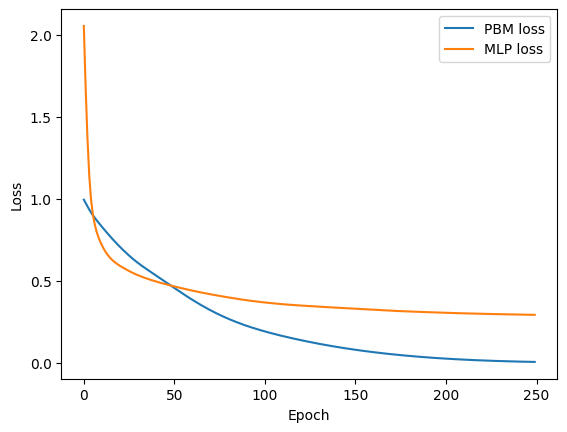

Accuracy (deep): 0.81
Joint: 81.90% (+/- 1.30%)


In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split

# train-test split: Hold out the test set for final model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
#print(y_train.shape)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores_joint = []
for train, test in kfold.split(X_train, y_train):
    # create model, train, and get accuracy
    lr_p = 0.00001
    lr_mlp = 0.00001
    alpha = 0.8
    model = Wide()
    acc = model_train(model, X_train[train], X_train[test],y_train[train], y_train[test], alpha, lr_p, lr_mlp)

    print("Accuracy (deep): %.2f" % acc)
    cv_scores_joint.append(acc)


# evaluate the model
joint_acc = np.mean(cv_scores_joint)
joint_std = np.std(cv_scores_joint)

print("Joint: %.2f%% (+/- %.2f%%)" % (joint_acc*100, joint_std*100))


In [ ]:
import pandas as pd

# Read data
data = pd.read_csv("GapSimLKLCrandsmall_20_90.csv")
print(data)
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]
print(X)
print(y)

           DV1       DV2       DV3          V         G1         G2  \
0     0.338328  5.669280  0.231648  11.999976   5.961583  40.393315   
1     0.167640  5.367528 -0.073152  12.100560   5.947258  39.836750   
2     0.088392  5.013960 -0.085344  12.146280   5.938418  39.313714   
3     0.042672  4.645152 -0.067056  12.170664   5.933237  38.833044   
4     4.349000  0.018000 -1.533000  12.180000  38.392400   5.932600   
...        ...       ...       ...        ...        ...        ...   
6147 -0.505968  2.261616 -0.646176  12.704064  12.159996  30.835397   
6148 -0.280416  2.532888 -0.505968  12.496800  12.194743  30.609540   
6149 -0.109728  2.840736 -0.271272  12.332208  12.209069  30.328819   
6150  0.024384  3.005328 -0.036576  12.234672  12.211507  30.019447   
6151  0.152400  3.044952  0.097536  12.195048  12.203582  29.711904   

              G3        Dend     Carid  label_targetlane  
0      20.260361  159.195516  0.827646                 0  
1       5.966460  160.407706 

In [ ]:
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32)
print(X.shape)
print(y.shape)

torch.Size([6152, 9])
torch.Size([6152, 1])


In [ ]:
import torch.nn as nn
class PBM(nn.Module):
    def __init__(self):
        super(PBM, self).__init__()
        
        # Define the trainable parameters
        #self.interceptfo = nn.Parameter(torch.tensor(100., requires_grad = True))
        #self.interceptlead = nn.Parameter(torch.tensor(100., requires_grad = True))
        #self.interceptlag = nn.Parameter(torch.tensor(100., requires_grad = True))
        self.betaDV1fo = nn.Parameter(torch.tensor(-0.0177, requires_grad = True))
        self.betaDV2lead = nn.Parameter(torch.tensor(-0.0123, requires_grad = True))
        self.betaDV3lag = nn.Parameter(torch.tensor(0.1247, requires_grad = True))
        self.betaV = nn.Parameter(torch.tensor(0.0246, requires_grad = True))
        self.betaG1 = nn.Parameter(torch.tensor(0.0352, requires_grad = True))
        self.betaG2 = nn.Parameter(torch.tensor(0.0252, requires_grad = True))
        self.betaG3 = nn.Parameter(torch.tensor(0.0079, requires_grad = True))
        
        self.alphaveh = nn.Parameter(torch.tensor(1., requires_grad = True))
        self.betaD = nn.Parameter(torch.tensor(-0.0008, requires_grad = True))

        

    def forward(self, X):
        # Compute the utilities
        U_fo =  self.betaDV1fo * X[:, 0] + self.betaG1 * X[:, 4] + self.betaD * X[:, 7]
        U_lead =  self.betaDV2lead * X[:, 1] + self.betaG2 * X[:, 5] + self.betaD * X[:, 7]
        U_lag =  self.betaDV3lag * X[:, 2] + self.betaG3 * X[:, 6]  + self.betaD * X[:, 7]
        
        # Compute the gaps and probabilities
        Gfo = torch.log(X[:, 4]) - U_fo
        Glead = torch.log(X[:, 5]) - U_lead
        Glag = torch.log(X[:, 6]) - U_lag
        

        Gaplead = torch.distributions.normal.Normal(loc=0, scale=self.alphaveh).cdf(Glead / self.alphaveh)
        Gaplag = torch.distributions.normal.Normal(loc=0, scale=self.alphaveh).cdf(Glag / self.alphaveh)
        Gapfo = torch.distributions.normal.Normal(loc=0, scale=self.alphaveh).cdf(Gfo / self.alphaveh)
        P_LC = Gaplead * Gaplag * Gapfo
        
        # Generate the acceptance probabilities
        #rand_num = torch.rand(X.shape[0]).to(self.device)
        #P = torch.where(rand_num > P_LC, torch.ones_like(rand_num), torch.zeros_like(rand_num))
        
        return P_LC.reshape(-1, 1)


Epoch: 0,loss p: 0.87451, loss joint: 0.70883
Epoch: 0, acc joint: 0.54872
Epoch: 1,loss p: 0.86826, loss joint: 0.63033
Epoch: 1, acc joint: 0.66821
Epoch: 2,loss p: 0.86082, loss joint: 0.61121
Epoch: 2, acc joint: 0.67169
Epoch: 3,loss p: 0.85344, loss joint: 0.60296
Epoch: 3, acc joint: 0.67749
Epoch: 4,loss p: 0.84627, loss joint: 0.59790
Epoch: 4, acc joint: 0.67865
Epoch: 5,loss p: 0.83930, loss joint: 0.59424
Epoch: 5, acc joint: 0.68097
Epoch: 6,loss p: 0.83224, loss joint: 0.59146
Epoch: 6, acc joint: 0.68445
Epoch: 7,loss p: 0.82493, loss joint: 0.58883
Epoch: 7, acc joint: 0.68329
Epoch: 8,loss p: 0.81742, loss joint: 0.58620
Epoch: 8, acc joint: 0.68445
Epoch: 9,loss p: 0.80975, loss joint: 0.58362
Epoch: 9, acc joint: 0.68329
Epoch: 10,loss p: 0.80201, loss joint: 0.58105
Epoch: 10, acc joint: 0.68445
Epoch: 11,loss p: 0.79424, loss joint: 0.57849
Epoch: 11, acc joint: 0.68561
Epoch: 12,loss p: 0.78644, loss joint: 0.57615
Epoch: 12, acc joint: 0.68794
Epoch: 13,loss p: 0

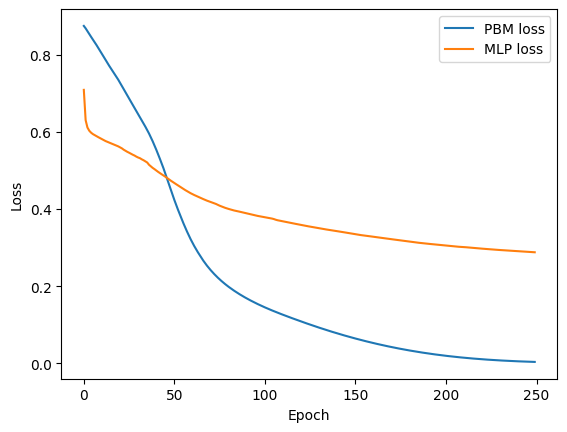

Accuracy (deep): 0.82
Epoch: 0,loss p: 0.84853, loss joint: 0.70163
Epoch: 0, acc joint: 0.50987
Epoch: 1,loss p: 0.83679, loss joint: 0.61316
Epoch: 1, acc joint: 0.64808
Epoch: 2,loss p: 0.82826, loss joint: 0.60657
Epoch: 2, acc joint: 0.67131
Epoch: 3,loss p: 0.82070, loss joint: 0.59706
Epoch: 3, acc joint: 0.67015
Epoch: 4,loss p: 0.81336, loss joint: 0.58836
Epoch: 4, acc joint: 0.67480
Epoch: 5,loss p: 0.80647, loss joint: 0.58219
Epoch: 5, acc joint: 0.67828
Epoch: 6,loss p: 0.79983, loss joint: 0.57699
Epoch: 6, acc joint: 0.68293
Epoch: 7,loss p: 0.79336, loss joint: 0.57283
Epoch: 7, acc joint: 0.68757
Epoch: 8,loss p: 0.78690, loss joint: 0.56902
Epoch: 8, acc joint: 0.69106
Epoch: 9,loss p: 0.78036, loss joint: 0.56535
Epoch: 9, acc joint: 0.69454
Epoch: 10,loss p: 0.77351, loss joint: 0.56194
Epoch: 10, acc joint: 0.69338
Epoch: 11,loss p: 0.76635, loss joint: 0.55873
Epoch: 11, acc joint: 0.69454
Epoch: 12,loss p: 0.75918, loss joint: 0.55602
Epoch: 12, acc joint: 0.696

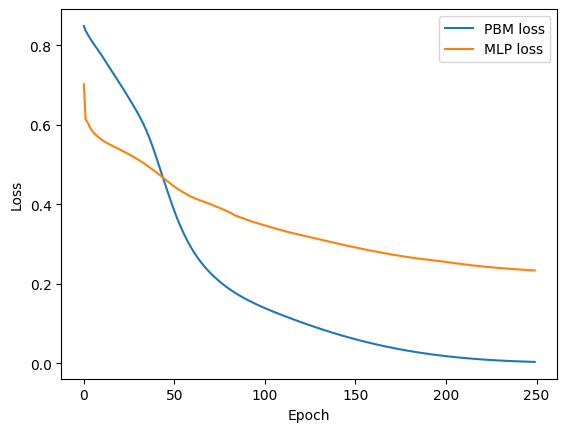

Accuracy (deep): 0.84
Epoch: 0,loss p: 0.85700, loss joint: 0.70721
Epoch: 0, acc joint: 0.66667
Epoch: 1,loss p: 0.84735, loss joint: 0.66733
Epoch: 1, acc joint: 0.66667
Epoch: 2,loss p: 0.83830, loss joint: 0.64196
Epoch: 2, acc joint: 0.66086
Epoch: 3,loss p: 0.82971, loss joint: 0.62610
Epoch: 3, acc joint: 0.65738
Epoch: 4,loss p: 0.82136, loss joint: 0.61665
Epoch: 4, acc joint: 0.66318
Epoch: 5,loss p: 0.81292, loss joint: 0.61095
Epoch: 5, acc joint: 0.66434
Epoch: 6,loss p: 0.80412, loss joint: 0.60674
Epoch: 6, acc joint: 0.67015
Epoch: 7,loss p: 0.79512, loss joint: 0.60275
Epoch: 7, acc joint: 0.67247
Epoch: 8,loss p: 0.78615, loss joint: 0.59913
Epoch: 8, acc joint: 0.68060
Epoch: 9,loss p: 0.77722, loss joint: 0.59601
Epoch: 9, acc joint: 0.68525
Epoch: 10,loss p: 0.76830, loss joint: 0.59282
Epoch: 10, acc joint: 0.68990
Epoch: 11,loss p: 0.75935, loss joint: 0.58955
Epoch: 11, acc joint: 0.69338
Epoch: 12,loss p: 0.75025, loss joint: 0.58700
Epoch: 12, acc joint: 0.693

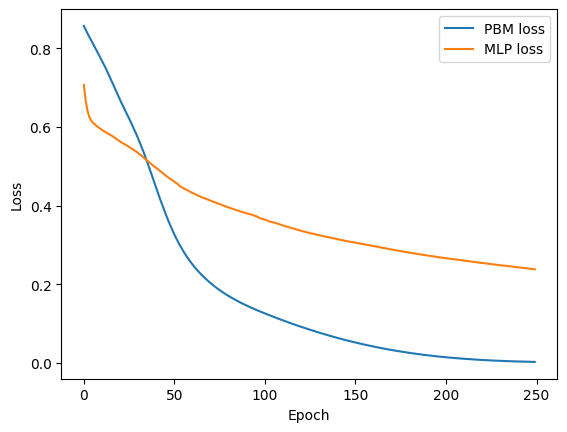

Accuracy (deep): 0.82
Epoch: 0,loss p: 0.85710, loss joint: 0.66042
Epoch: 0, acc joint: 0.69106
Epoch: 1,loss p: 0.84742, loss joint: 0.62704
Epoch: 1, acc joint: 0.69338
Epoch: 2,loss p: 0.83832, loss joint: 0.60465
Epoch: 2, acc joint: 0.69454
Epoch: 3,loss p: 0.82968, loss joint: 0.59160
Epoch: 3, acc joint: 0.68525
Epoch: 4,loss p: 0.82131, loss joint: 0.58246
Epoch: 4, acc joint: 0.68873
Epoch: 5,loss p: 0.81288, loss joint: 0.57693
Epoch: 5, acc joint: 0.69222
Epoch: 6,loss p: 0.80412, loss joint: 0.57292
Epoch: 6, acc joint: 0.69454
Epoch: 7,loss p: 0.79519, loss joint: 0.56974
Epoch: 7, acc joint: 0.69803
Epoch: 8,loss p: 0.78620, loss joint: 0.56627
Epoch: 8, acc joint: 0.69919
Epoch: 9,loss p: 0.77728, loss joint: 0.56278
Epoch: 9, acc joint: 0.70267
Epoch: 10,loss p: 0.76831, loss joint: 0.55927
Epoch: 10, acc joint: 0.70848
Epoch: 11,loss p: 0.75920, loss joint: 0.55564
Epoch: 11, acc joint: 0.71661
Epoch: 12,loss p: 0.75015, loss joint: 0.55264
Epoch: 12, acc joint: 0.720

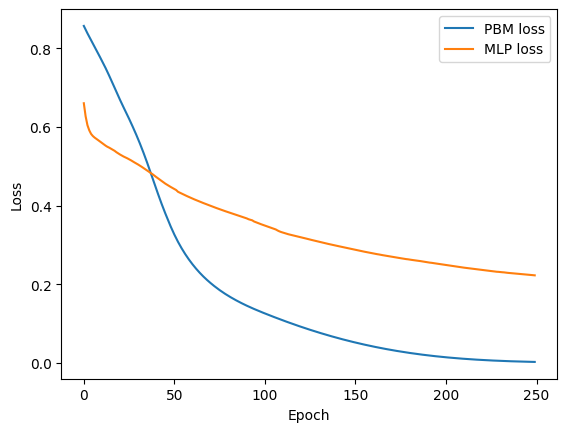

Accuracy (deep): 0.82
Epoch: 0,loss p: 0.85726, loss joint: 0.65558
Epoch: 0, acc joint: 0.67364
Epoch: 1,loss p: 0.84773, loss joint: 0.61200
Epoch: 1, acc joint: 0.66783
Epoch: 2,loss p: 0.83879, loss joint: 0.58319
Epoch: 2, acc joint: 0.67596
Epoch: 3,loss p: 0.83026, loss joint: 0.56633
Epoch: 3, acc joint: 0.67247
Epoch: 4,loss p: 0.82199, loss joint: 0.55587
Epoch: 4, acc joint: 0.67015
Epoch: 5,loss p: 0.81364, loss joint: 0.54913
Epoch: 5, acc joint: 0.66899
Epoch: 6,loss p: 0.80498, loss joint: 0.54444
Epoch: 6, acc joint: 0.67015
Epoch: 7,loss p: 0.79606, loss joint: 0.54076
Epoch: 7, acc joint: 0.67828
Epoch: 8,loss p: 0.78718, loss joint: 0.53781
Epoch: 8, acc joint: 0.68293
Epoch: 9,loss p: 0.77826, loss joint: 0.53496
Epoch: 9, acc joint: 0.69570
Epoch: 10,loss p: 0.76930, loss joint: 0.53188
Epoch: 10, acc joint: 0.70267
Epoch: 11,loss p: 0.76029, loss joint: 0.52815
Epoch: 11, acc joint: 0.70151
Epoch: 12,loss p: 0.75120, loss joint: 0.52543
Epoch: 12, acc joint: 0.704

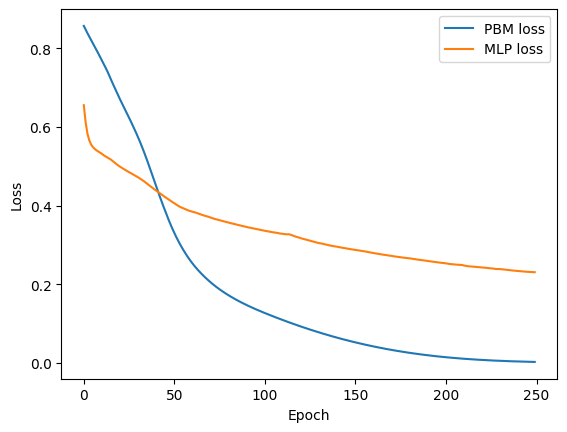

Accuracy (deep): 0.81
Joint: 82.40% (+/- 0.99%)


In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split

# train-test split: Hold out the test set for final model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
#print(y_train.shape)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores_joint = []
for train, test in kfold.split(X_train, y_train):
    # create model, train, and get accuracy
    lr_p = 0.00001
    lr_mlp = 0.00001
    alpha = 0.8
    model = Deep()
    acc = model_train(model, X_train[train], X_train[test],y_train[train], y_train[test], alpha, lr_p, lr_mlp)

    print("Accuracy (deep): %.2f" % acc)
    cv_scores_joint.append(acc)


# evaluate the model
joint_acc = np.mean(cv_scores_joint)
joint_std = np.std(cv_scores_joint)

print("Joint: %.2f%% (+/- %.2f%%)" % (joint_acc*100, joint_std*100))


Epoch: 0,loss p: 0.85993, loss joint: 0.58259
Epoch: 0, acc joint: 0.69490
Epoch: 1,loss p: 0.84974, loss joint: 0.58414
Epoch: 1, acc joint: 0.69142
Epoch: 2,loss p: 0.84015, loss joint: 0.58388
Epoch: 2, acc joint: 0.69142
Epoch: 3,loss p: 0.83078, loss joint: 0.58472
Epoch: 3, acc joint: 0.68213
Epoch: 4,loss p: 0.82132, loss joint: 0.58431
Epoch: 4, acc joint: 0.67285
Epoch: 5,loss p: 0.81133, loss joint: 0.58236
Epoch: 5, acc joint: 0.67401
Epoch: 6,loss p: 0.80117, loss joint: 0.57936
Epoch: 6, acc joint: 0.68097
Epoch: 7,loss p: 0.79081, loss joint: 0.57637
Epoch: 7, acc joint: 0.68445
Epoch: 8,loss p: 0.78027, loss joint: 0.57291
Epoch: 8, acc joint: 0.69838
Epoch: 9,loss p: 0.76963, loss joint: 0.57055
Epoch: 9, acc joint: 0.70534
Epoch: 10,loss p: 0.75857, loss joint: 0.56817
Epoch: 10, acc joint: 0.70650
Epoch: 11,loss p: 0.74739, loss joint: 0.56609
Epoch: 11, acc joint: 0.70186
Epoch: 12,loss p: 0.73616, loss joint: 0.56179
Epoch: 12, acc joint: 0.70882
Epoch: 13,loss p: 0

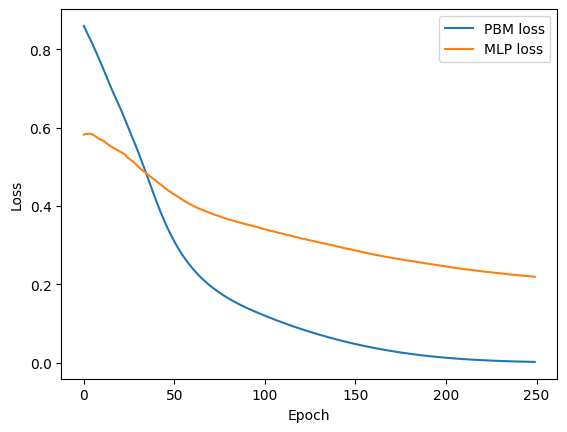

Accuracy (deep): 0.82
Epoch: 0,loss p: 0.84773, loss joint: 0.80674
Epoch: 0, acc joint: 0.50639
Epoch: 1,loss p: 0.83500, loss joint: 0.66336
Epoch: 1, acc joint: 0.65389
Epoch: 2,loss p: 0.82549, loss joint: 0.63914
Epoch: 2, acc joint: 0.66899
Epoch: 3,loss p: 0.81636, loss joint: 0.62081
Epoch: 3, acc joint: 0.68525
Epoch: 4,loss p: 0.80712, loss joint: 0.60972
Epoch: 4, acc joint: 0.68873
Epoch: 5,loss p: 0.79797, loss joint: 0.60243
Epoch: 5, acc joint: 0.69338
Epoch: 6,loss p: 0.78844, loss joint: 0.59640
Epoch: 6, acc joint: 0.69919
Epoch: 7,loss p: 0.77886, loss joint: 0.59108
Epoch: 7, acc joint: 0.70151
Epoch: 8,loss p: 0.76949, loss joint: 0.58703
Epoch: 8, acc joint: 0.70267
Epoch: 9,loss p: 0.75987, loss joint: 0.58157
Epoch: 9, acc joint: 0.71312
Epoch: 10,loss p: 0.75109, loss joint: 0.57715
Epoch: 10, acc joint: 0.71196
Epoch: 11,loss p: 0.74243, loss joint: 0.57314
Epoch: 11, acc joint: 0.71312
Epoch: 12,loss p: 0.73355, loss joint: 0.57002
Epoch: 12, acc joint: 0.715

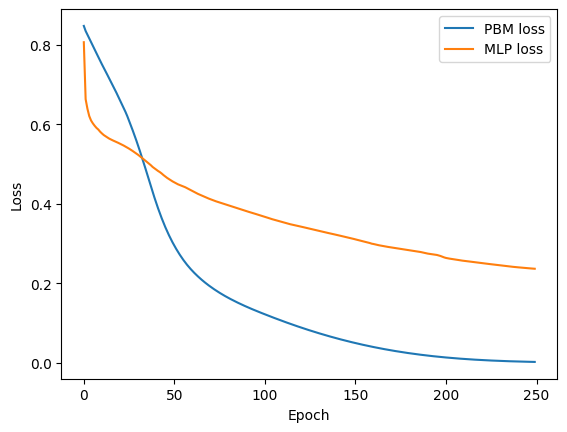

Accuracy (deep): 0.81
Epoch: 0,loss p: 0.85662, loss joint: 0.56633
Epoch: 0, acc joint: 0.65505
Epoch: 1,loss p: 0.84652, loss joint: 0.56578
Epoch: 1, acc joint: 0.65273
Epoch: 2,loss p: 0.83698, loss joint: 0.56295
Epoch: 2, acc joint: 0.65970
Epoch: 3,loss p: 0.82773, loss joint: 0.56150
Epoch: 3, acc joint: 0.66202
Epoch: 4,loss p: 0.81835, loss joint: 0.56042
Epoch: 4, acc joint: 0.65157
Epoch: 5,loss p: 0.80854, loss joint: 0.55929
Epoch: 5, acc joint: 0.64925
Epoch: 6,loss p: 0.79860, loss joint: 0.55722
Epoch: 6, acc joint: 0.65738
Epoch: 7,loss p: 0.78857, loss joint: 0.55507
Epoch: 7, acc joint: 0.66202
Epoch: 8,loss p: 0.77835, loss joint: 0.55319
Epoch: 8, acc joint: 0.67015
Epoch: 9,loss p: 0.76777, loss joint: 0.55069
Epoch: 9, acc joint: 0.67712
Epoch: 10,loss p: 0.75669, loss joint: 0.54855
Epoch: 10, acc joint: 0.67712
Epoch: 11,loss p: 0.74552, loss joint: 0.54731
Epoch: 11, acc joint: 0.67596
Epoch: 12,loss p: 0.73439, loss joint: 0.54536
Epoch: 12, acc joint: 0.677

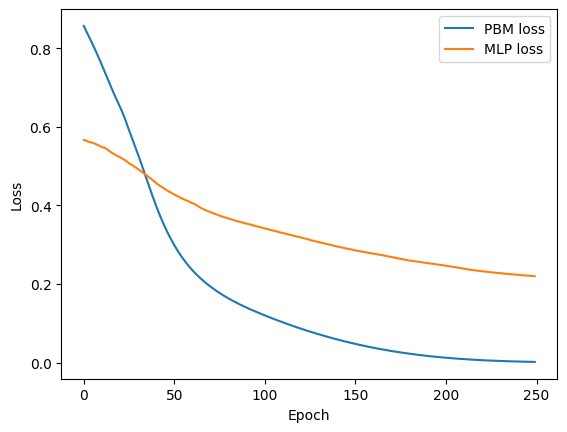

Accuracy (deep): 0.81
Epoch: 0,loss p: 0.85662, loss joint: 0.59484
Epoch: 0, acc joint: 0.65505
Epoch: 1,loss p: 0.84645, loss joint: 0.58427
Epoch: 1, acc joint: 0.65273
Epoch: 2,loss p: 0.83695, loss joint: 0.57660
Epoch: 2, acc joint: 0.65970
Epoch: 3,loss p: 0.82777, loss joint: 0.57282
Epoch: 3, acc joint: 0.65273
Epoch: 4,loss p: 0.81841, loss joint: 0.57032
Epoch: 4, acc joint: 0.65041
Epoch: 5,loss p: 0.80857, loss joint: 0.56814
Epoch: 5, acc joint: 0.64808
Epoch: 6,loss p: 0.79853, loss joint: 0.56524
Epoch: 6, acc joint: 0.65621
Epoch: 7,loss p: 0.78816, loss joint: 0.56199
Epoch: 7, acc joint: 0.65970
Epoch: 8,loss p: 0.77736, loss joint: 0.55844
Epoch: 8, acc joint: 0.66783
Epoch: 9,loss p: 0.76646, loss joint: 0.55498
Epoch: 9, acc joint: 0.67480
Epoch: 10,loss p: 0.75529, loss joint: 0.55180
Epoch: 10, acc joint: 0.67364
Epoch: 11,loss p: 0.74417, loss joint: 0.54862
Epoch: 11, acc joint: 0.67828
Epoch: 12,loss p: 0.73311, loss joint: 0.54463
Epoch: 12, acc joint: 0.677

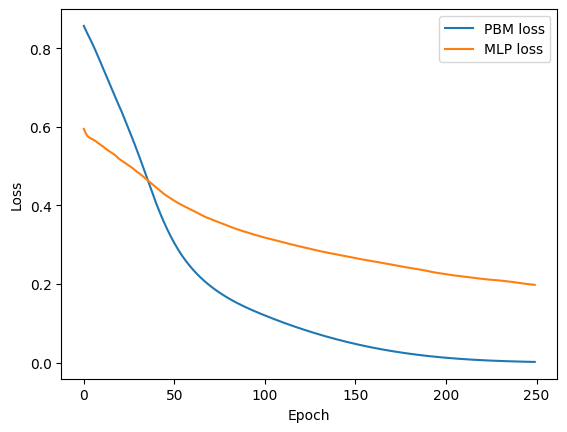

Accuracy (deep): 0.79
Epoch: 0,loss p: 0.85659, loss joint: 0.48433
Epoch: 0, acc joint: 0.68060
Epoch: 1,loss p: 0.84636, loss joint: 0.48487
Epoch: 1, acc joint: 0.67596
Epoch: 2,loss p: 0.83679, loss joint: 0.48434
Epoch: 2, acc joint: 0.68293
Epoch: 3,loss p: 0.82753, loss joint: 0.48341
Epoch: 3, acc joint: 0.67596
Epoch: 4,loss p: 0.81821, loss joint: 0.48124
Epoch: 4, acc joint: 0.67712
Epoch: 5,loss p: 0.80832, loss joint: 0.47846
Epoch: 5, acc joint: 0.68293
Epoch: 6,loss p: 0.79834, loss joint: 0.47560
Epoch: 6, acc joint: 0.68641
Epoch: 7,loss p: 0.78805, loss joint: 0.47222
Epoch: 7, acc joint: 0.69454
Epoch: 8,loss p: 0.77750, loss joint: 0.46911
Epoch: 8, acc joint: 0.69454
Epoch: 9,loss p: 0.76675, loss joint: 0.46574
Epoch: 9, acc joint: 0.69803
Epoch: 10,loss p: 0.75574, loss joint: 0.46138
Epoch: 10, acc joint: 0.69919
Epoch: 11,loss p: 0.74483, loss joint: 0.45784
Epoch: 11, acc joint: 0.70267
Epoch: 12,loss p: 0.73383, loss joint: 0.45439
Epoch: 12, acc joint: 0.703

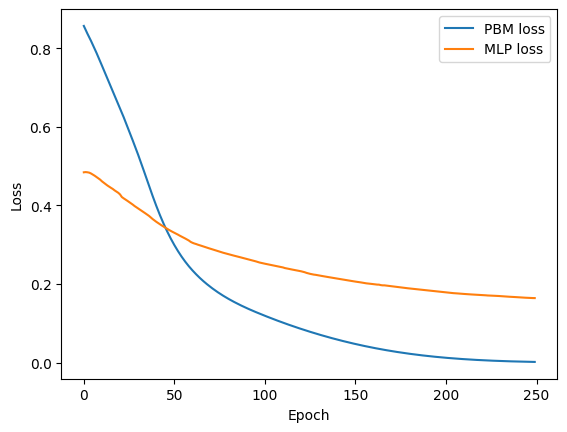

Accuracy (deep): 0.81
Joint: 80.89% (+/- 0.87%)


In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split

# train-test split: Hold out the test set for final model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
#print(y_train.shape)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores_joint = []
for train, test in kfold.split(X_train, y_train):
    # create model, train, and get accuracy
    lr_p = 0.00001
    lr_mlp = 0.00001
    alpha = 0.8
    model = Deep1()
    acc = model_train(model, X_train[train], X_train[test],y_train[train], y_train[test], alpha, lr_p, lr_mlp)

    print("Accuracy (deep): %.2f" % acc)
    cv_scores_joint.append(acc)


# evaluate the model
joint_acc = np.mean(cv_scores_joint)
joint_std = np.std(cv_scores_joint)

print("Joint: %.2f%% (+/- %.2f%%)" % (joint_acc*100, joint_std*100))


Epoch: 0,loss p: 0.91199, loss joint: 3.88996
Epoch: 0, acc joint: 0.44316
Epoch: 1,loss p: 0.92152, loss joint: 2.07383
Epoch: 1, acc joint: 0.39443
Epoch: 2,loss p: 0.91983, loss joint: 0.90363
Epoch: 2, acc joint: 0.36079
Epoch: 3,loss p: 0.88964, loss joint: 0.73877
Epoch: 3, acc joint: 0.45708
Epoch: 4,loss p: 0.86358, loss joint: 0.67707
Epoch: 4, acc joint: 0.52088
Epoch: 5,loss p: 0.84167, loss joint: 0.66800
Epoch: 5, acc joint: 0.57309
Epoch: 6,loss p: 0.82268, loss joint: 0.69433
Epoch: 6, acc joint: 0.61485
Epoch: 7,loss p: 0.80584, loss joint: 0.73426
Epoch: 7, acc joint: 0.65313
Epoch: 8,loss p: 0.79091, loss joint: 0.77307
Epoch: 8, acc joint: 0.67401
Epoch: 9,loss p: 0.77765, loss joint: 0.80354
Epoch: 9, acc joint: 0.67865
Epoch: 10,loss p: 0.76575, loss joint: 0.82421
Epoch: 10, acc joint: 0.68329
Epoch: 11,loss p: 0.75494, loss joint: 0.83618
Epoch: 11, acc joint: 0.69374
Epoch: 12,loss p: 0.74495, loss joint: 0.84063
Epoch: 12, acc joint: 0.69954
Epoch: 13,loss p: 0

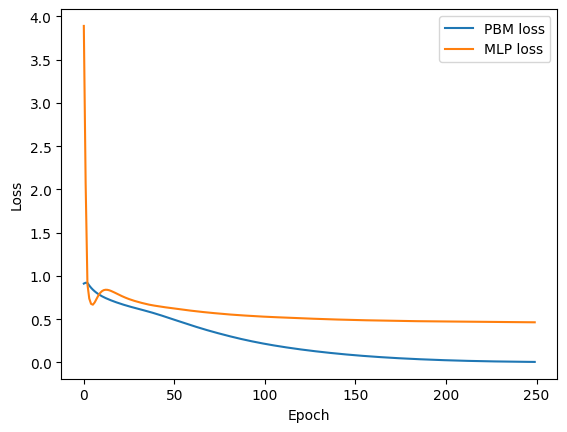

Accuracy (deep): 0.81
Epoch: 0,loss p: 0.91005, loss joint: 29.72783
Epoch: 0, acc joint: 0.51568
Epoch: 1,loss p: 0.87013, loss joint: 15.13423
Epoch: 1, acc joint: 0.51568
Epoch: 2,loss p: 0.83399, loss joint: 3.37907
Epoch: 2, acc joint: 0.48432
Epoch: 3,loss p: 0.80410, loss joint: 2.34452
Epoch: 3, acc joint: 0.43786
Epoch: 4,loss p: 0.78191, loss joint: 1.82891
Epoch: 4, acc joint: 0.41696
Epoch: 5,loss p: 0.76477, loss joint: 1.42192
Epoch: 5, acc joint: 0.42741
Epoch: 6,loss p: 0.74940, loss joint: 1.12035
Epoch: 6, acc joint: 0.48432
Epoch: 7,loss p: 0.73642, loss joint: 0.90755
Epoch: 7, acc joint: 0.52613
Epoch: 8,loss p: 0.72364, loss joint: 0.77570
Epoch: 8, acc joint: 0.57143
Epoch: 9,loss p: 0.71099, loss joint: 0.71154
Epoch: 9, acc joint: 0.61789
Epoch: 10,loss p: 0.69922, loss joint: 0.68546
Epoch: 10, acc joint: 0.64460
Epoch: 11,loss p: 0.68851, loss joint: 0.67482
Epoch: 11, acc joint: 0.65041
Epoch: 12,loss p: 0.67872, loss joint: 0.66918
Epoch: 12, acc joint: 0.6

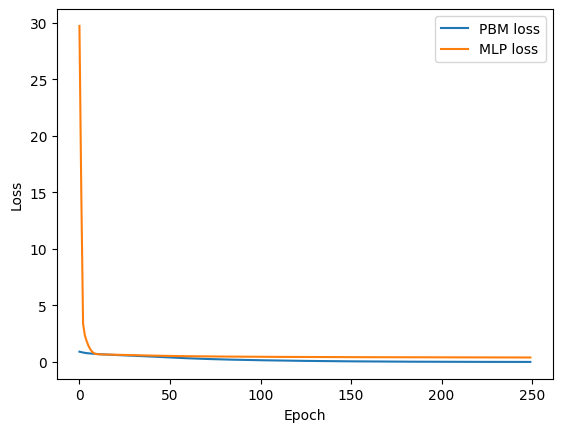

Accuracy (deep): 0.79
Epoch: 0,loss p: 0.90707, loss joint: 3.59178
Epoch: 0, acc joint: 0.43554
Epoch: 1,loss p: 0.91692, loss joint: 2.04499
Epoch: 1, acc joint: 0.40418
Epoch: 2,loss p: 0.91593, loss joint: 0.91431
Epoch: 2, acc joint: 0.36005
Epoch: 3,loss p: 0.88809, loss joint: 0.74392
Epoch: 3, acc joint: 0.45064
Epoch: 4,loss p: 0.86303, loss joint: 0.68734
Epoch: 4, acc joint: 0.50523
Epoch: 5,loss p: 0.84161, loss joint: 0.68227
Epoch: 5, acc joint: 0.54704
Epoch: 6,loss p: 0.82276, loss joint: 0.70803
Epoch: 6, acc joint: 0.57956
Epoch: 7,loss p: 0.80626, loss joint: 0.74582
Epoch: 7, acc joint: 0.61556
Epoch: 8,loss p: 0.79169, loss joint: 0.78195
Epoch: 8, acc joint: 0.63415
Epoch: 9,loss p: 0.77868, loss joint: 0.81155
Epoch: 9, acc joint: 0.64925
Epoch: 10,loss p: 0.76691, loss joint: 0.83285
Epoch: 10, acc joint: 0.65621
Epoch: 11,loss p: 0.75618, loss joint: 0.84608
Epoch: 11, acc joint: 0.65970
Epoch: 12,loss p: 0.74624, loss joint: 0.85252
Epoch: 12, acc joint: 0.673

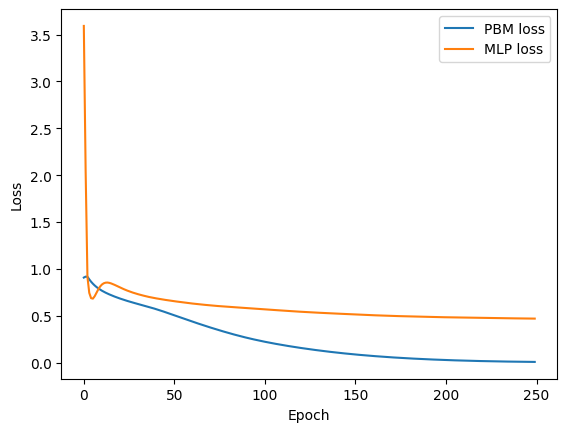

Accuracy (deep): 0.81
Epoch: 0,loss p: 0.90670, loss joint: 2.77263
Epoch: 0, acc joint: 0.44135
Epoch: 1,loss p: 0.91621, loss joint: 1.57205
Epoch: 1, acc joint: 0.39837
Epoch: 2,loss p: 0.91418, loss joint: 0.88421
Epoch: 2, acc joint: 0.39837
Epoch: 3,loss p: 0.88773, loss joint: 0.76585
Epoch: 3, acc joint: 0.48548
Epoch: 4,loss p: 0.86194, loss joint: 0.69327
Epoch: 4, acc joint: 0.52381
Epoch: 5,loss p: 0.84015, loss joint: 0.66737
Epoch: 5, acc joint: 0.57724
Epoch: 6,loss p: 0.82113, loss joint: 0.67154
Epoch: 6, acc joint: 0.63066
Epoch: 7,loss p: 0.80443, loss joint: 0.69373
Epoch: 7, acc joint: 0.66318
Epoch: 8,loss p: 0.78970, loss joint: 0.72078
Epoch: 8, acc joint: 0.68757
Epoch: 9,loss p: 0.77659, loss joint: 0.74577
Epoch: 9, acc joint: 0.67712
Epoch: 10,loss p: 0.76484, loss joint: 0.76641
Epoch: 10, acc joint: 0.68525
Epoch: 11,loss p: 0.75418, loss joint: 0.78161
Epoch: 11, acc joint: 0.69454
Epoch: 12,loss p: 0.74435, loss joint: 0.79159
Epoch: 12, acc joint: 0.714

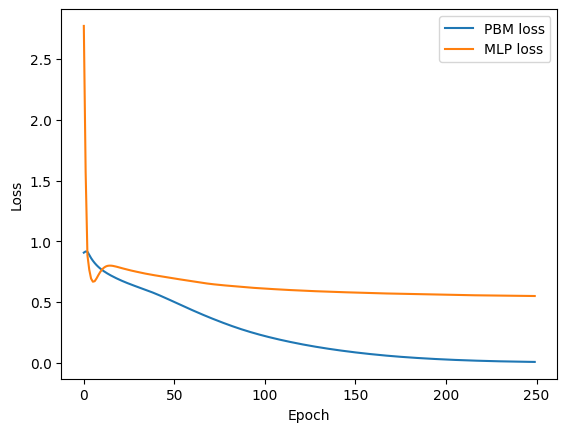

Accuracy (deep): 0.81
Epoch: 0,loss p: 0.90698, loss joint: 2.94979
Epoch: 0, acc joint: 0.43438
Epoch: 1,loss p: 0.91646, loss joint: 1.56708
Epoch: 1, acc joint: 0.40302
Epoch: 2,loss p: 0.91402, loss joint: 0.65822
Epoch: 2, acc joint: 0.38792
Epoch: 3,loss p: 0.88597, loss joint: 0.61641
Epoch: 3, acc joint: 0.45761
Epoch: 4,loss p: 0.86009, loss joint: 0.63787
Epoch: 4, acc joint: 0.52033
Epoch: 5,loss p: 0.83831, loss joint: 0.69328
Epoch: 5, acc joint: 0.55749
Epoch: 6,loss p: 0.81943, loss joint: 0.76267
Epoch: 6, acc joint: 0.58304
Epoch: 7,loss p: 0.80288, loss joint: 0.82897
Epoch: 7, acc joint: 0.61556
Epoch: 8,loss p: 0.78841, loss joint: 0.88188
Epoch: 8, acc joint: 0.64576
Epoch: 9,loss p: 0.77565, loss joint: 0.92041
Epoch: 9, acc joint: 0.65157
Epoch: 10,loss p: 0.76414, loss joint: 0.94521
Epoch: 10, acc joint: 0.65505
Epoch: 11,loss p: 0.75363, loss joint: 0.95882
Epoch: 11, acc joint: 0.67131
Epoch: 12,loss p: 0.74390, loss joint: 0.96364
Epoch: 12, acc joint: 0.682

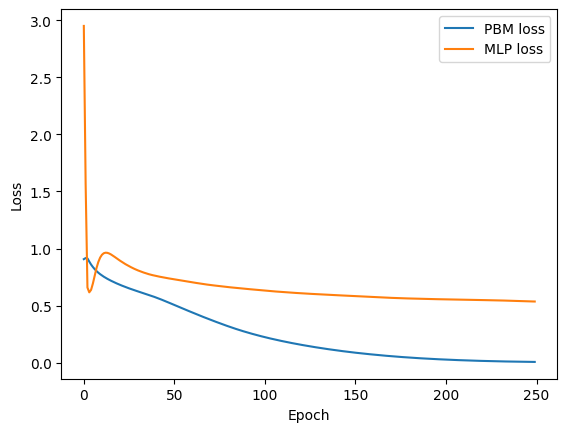

Accuracy (deep): 0.81
Joint: 80.65% (+/- 0.81%)


In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split

# train-test split: Hold out the test set for final model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
#print(y_train.shape)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores_joint = []
for train, test in kfold.split(X_train, y_train):
    # create model, train, and get accuracy
    lr_p = 0.00001
    lr_mlp = 0.00001
    alpha = 0.8
    model = Wide()
    acc = model_train(model, X_train[train], X_train[test],y_train[train], y_train[test], alpha, lr_p, lr_mlp)

    print("Accuracy (deep): %.2f" % acc)
    cv_scores_joint.append(acc)


# evaluate the model
joint_acc = np.mean(cv_scores_joint)
joint_std = np.std(cv_scores_joint)

print("Joint: %.2f%% (+/- %.2f%%)" % (joint_acc*100, joint_std*100))


In [ ]:
import pandas as pd

# Read data
data = pd.read_csv("GapSimLKLCrandsmall_20.csv")
print(data)
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]
print(X)
print(y)

           DV1       DV2       DV3          V         G1         G2  \
0     0.338328  5.669280  0.231648  11.999976   5.961583  40.393315   
1     0.167640  5.367528 -0.073152  12.100560   5.947258  39.836750   
2     0.088392  5.013960 -0.085344  12.146280   5.938418  39.313714   
3     0.042672  4.645152 -0.067056  12.170664   5.933237  38.833044   
4     4.349000  0.018000 -1.533000  12.180000  38.392400   5.932600   
...        ...       ...       ...        ...        ...        ...   
7225 -0.871728  9.448800  5.599176   5.455920  10.931957  33.089393   
7226 -0.969264  9.217152  5.660136   5.620512  11.023397  32.158534   
7227 -1.054608  9.058656  5.562600   5.815584  11.126419  31.256630   
7228 -1.103376  9.015984  4.687824   5.980176  11.239805  30.364786   
7229 -1.109472  9.079992  4.593336   6.074664  11.353800  29.467454   

              G3        Dend     Carid  label_targetlane  
0      20.260361  159.195516  0.827646                 0  
1       5.966460  160.407706 

In [ ]:
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32)
print(X.shape)
print(y.shape)

torch.Size([7230, 9])
torch.Size([7230, 1])


In [ ]:
import torch.nn as nn
class PBM(nn.Module):
    def __init__(self):
        super(PBM, self).__init__()
        
        # Define the trainable parameters
        #self.interceptfo = nn.Parameter(torch.tensor(100., requires_grad = True))
        #self.interceptlead = nn.Parameter(torch.tensor(100., requires_grad = True))
        #self.interceptlag = nn.Parameter(torch.tensor(100., requires_grad = True))
        self.betaDV1fo = nn.Parameter(torch.tensor(-0.0784, requires_grad = True))
        self.betaDV2lead = nn.Parameter(torch.tensor(-0.0289, requires_grad = True))
        self.betaDV3lag = nn.Parameter(torch.tensor(0.1461, requires_grad = True))
        self.betaV = nn.Parameter(torch.tensor(0.0225, requires_grad = True))
        self.betaG1 = nn.Parameter(torch.tensor(0.0355, requires_grad = True))
        self.betaG2 = nn.Parameter(torch.tensor(0.0189, requires_grad = True))
        self.betaG3 = nn.Parameter(torch.tensor(0.0058, requires_grad = True))
        
        self.alphaveh = nn.Parameter(torch.tensor(1., requires_grad = True))
        self.betaD = nn.Parameter(torch.tensor(-0.0003, requires_grad = True))

        

    def forward(self, X):
        # Compute the utilities
        U_fo =  self.betaDV1fo * X[:, 0] + self.betaG1 * X[:, 4] + self.betaD * X[:, 7]
        U_lead =  self.betaDV2lead * X[:, 1] + self.betaG2 * X[:, 5] + self.betaD * X[:, 7]
        U_lag =  self.betaDV3lag * X[:, 2] + self.betaG3 * X[:, 6]  + self.betaD * X[:, 7]
        
        # Compute the gaps and probabilities
        Gfo = torch.log(X[:, 4]) - U_fo
        Glead = torch.log(X[:, 5]) - U_lead
        Glag = torch.log(X[:, 6]) - U_lag
        

        Gaplead = torch.distributions.normal.Normal(loc=0, scale=self.alphaveh).cdf(Glead / self.alphaveh)
        Gaplag = torch.distributions.normal.Normal(loc=0, scale=self.alphaveh).cdf(Glag / self.alphaveh)
        Gapfo = torch.distributions.normal.Normal(loc=0, scale=self.alphaveh).cdf(Gfo / self.alphaveh)
        P_LC = Gaplead * Gaplag * Gapfo
        
        # Generate the acceptance probabilities
        #rand_num = torch.rand(X.shape[0]).to(self.device)
        #P = torch.where(rand_num > P_LC, torch.ones_like(rand_num), torch.zeros_like(rand_num))
        
        return P_LC.reshape(-1, 1)


Epoch: 0,loss p: 0.84615, loss joint: 0.63792
Epoch: 0, acc joint: 0.67720
Epoch: 1,loss p: 0.83571, loss joint: 0.58515
Epoch: 1, acc joint: 0.68806
Epoch: 2,loss p: 0.82603, loss joint: 0.55732
Epoch: 2, acc joint: 0.68707
Epoch: 3,loss p: 0.81683, loss joint: 0.54220
Epoch: 3, acc joint: 0.68115
Epoch: 4,loss p: 0.80774, loss joint: 0.53394
Epoch: 4, acc joint: 0.68509
Epoch: 5,loss p: 0.79846, loss joint: 0.52799
Epoch: 5, acc joint: 0.68904
Epoch: 6,loss p: 0.78886, loss joint: 0.52294
Epoch: 6, acc joint: 0.69299
Epoch: 7,loss p: 0.77911, loss joint: 0.51848
Epoch: 7, acc joint: 0.69398
Epoch: 8,loss p: 0.76965, loss joint: 0.51473
Epoch: 8, acc joint: 0.69398
Epoch: 9,loss p: 0.76046, loss joint: 0.51182
Epoch: 9, acc joint: 0.69694
Epoch: 10,loss p: 0.75133, loss joint: 0.50920
Epoch: 10, acc joint: 0.69694
Epoch: 11,loss p: 0.74219, loss joint: 0.50674
Epoch: 11, acc joint: 0.69793
Epoch: 12,loss p: 0.73268, loss joint: 0.50428
Epoch: 12, acc joint: 0.69891
Epoch: 13,loss p: 0

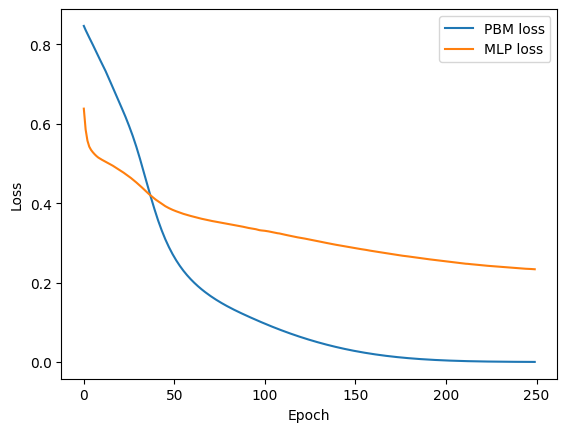

Accuracy (deep): 0.81
Epoch: 0,loss p: 0.88742, loss joint: 0.68949
Epoch: 0, acc joint: 0.62253
Epoch: 1,loss p: 0.88155, loss joint: 0.60357
Epoch: 1, acc joint: 0.67885
Epoch: 2,loss p: 0.87446, loss joint: 0.58584
Epoch: 2, acc joint: 0.70059
Epoch: 3,loss p: 0.86752, loss joint: 0.57533
Epoch: 3, acc joint: 0.70059
Epoch: 4,loss p: 0.86070, loss joint: 0.56814
Epoch: 4, acc joint: 0.69763
Epoch: 5,loss p: 0.85399, loss joint: 0.56278
Epoch: 5, acc joint: 0.70257
Epoch: 6,loss p: 0.84738, loss joint: 0.55821
Epoch: 6, acc joint: 0.70751
Epoch: 7,loss p: 0.84087, loss joint: 0.55412
Epoch: 7, acc joint: 0.70850
Epoch: 8,loss p: 0.83450, loss joint: 0.55004
Epoch: 8, acc joint: 0.70850
Epoch: 9,loss p: 0.82828, loss joint: 0.54602
Epoch: 9, acc joint: 0.70949
Epoch: 10,loss p: 0.82217, loss joint: 0.54227
Epoch: 10, acc joint: 0.71047
Epoch: 11,loss p: 0.81619, loss joint: 0.53898
Epoch: 11, acc joint: 0.70949
Epoch: 12,loss p: 0.81034, loss joint: 0.53583
Epoch: 12, acc joint: 0.718

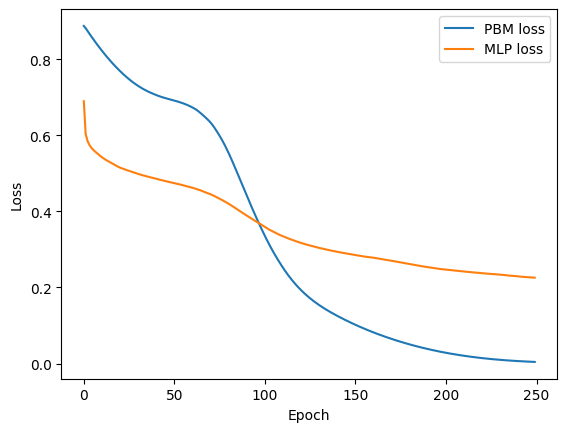

Accuracy (deep): 0.82
Epoch: 0,loss p: 0.82056, loss joint: 0.60928
Epoch: 0, acc joint: 0.69071
Epoch: 1,loss p: 0.81083, loss joint: 0.58523
Epoch: 1, acc joint: 0.69466
Epoch: 2,loss p: 0.80141, loss joint: 0.57024
Epoch: 2, acc joint: 0.70158
Epoch: 3,loss p: 0.79217, loss joint: 0.55984
Epoch: 3, acc joint: 0.70158
Epoch: 4,loss p: 0.78312, loss joint: 0.55202
Epoch: 4, acc joint: 0.69960
Epoch: 5,loss p: 0.77421, loss joint: 0.54500
Epoch: 5, acc joint: 0.69960
Epoch: 6,loss p: 0.76558, loss joint: 0.53876
Epoch: 6, acc joint: 0.69763
Epoch: 7,loss p: 0.75723, loss joint: 0.53309
Epoch: 7, acc joint: 0.69960
Epoch: 8,loss p: 0.74913, loss joint: 0.52843
Epoch: 8, acc joint: 0.70257
Epoch: 9,loss p: 0.74123, loss joint: 0.52476
Epoch: 9, acc joint: 0.70356
Epoch: 10,loss p: 0.73352, loss joint: 0.52137
Epoch: 10, acc joint: 0.70553
Epoch: 11,loss p: 0.72590, loss joint: 0.51831
Epoch: 11, acc joint: 0.70751
Epoch: 12,loss p: 0.71850, loss joint: 0.51528
Epoch: 12, acc joint: 0.710

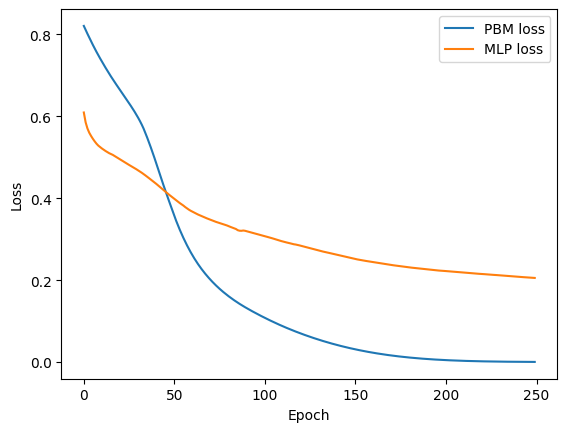

Accuracy (deep): 0.82
Epoch: 0,loss p: 0.82054, loss joint: 0.58834
Epoch: 0, acc joint: 0.69565
Epoch: 1,loss p: 0.81087, loss joint: 0.56601
Epoch: 1, acc joint: 0.69862
Epoch: 2,loss p: 0.80144, loss joint: 0.55213
Epoch: 2, acc joint: 0.71047
Epoch: 3,loss p: 0.79221, loss joint: 0.54274
Epoch: 3, acc joint: 0.71245
Epoch: 4,loss p: 0.78320, loss joint: 0.53566
Epoch: 4, acc joint: 0.71146
Epoch: 5,loss p: 0.77437, loss joint: 0.52931
Epoch: 5, acc joint: 0.70652
Epoch: 6,loss p: 0.76572, loss joint: 0.52336
Epoch: 6, acc joint: 0.70850
Epoch: 7,loss p: 0.75740, loss joint: 0.51774
Epoch: 7, acc joint: 0.71344
Epoch: 8,loss p: 0.74936, loss joint: 0.51294
Epoch: 8, acc joint: 0.72036
Epoch: 9,loss p: 0.74152, loss joint: 0.50847
Epoch: 9, acc joint: 0.72233
Epoch: 10,loss p: 0.73384, loss joint: 0.50468
Epoch: 10, acc joint: 0.71838
Epoch: 11,loss p: 0.72630, loss joint: 0.50084
Epoch: 11, acc joint: 0.72036
Epoch: 12,loss p: 0.71888, loss joint: 0.49700
Epoch: 12, acc joint: 0.723

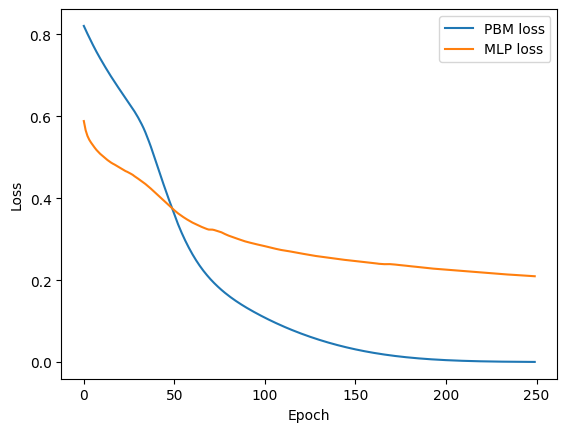

Accuracy (deep): 0.82
Epoch: 0,loss p: 0.82077, loss joint: 0.56291
Epoch: 0, acc joint: 0.70257
Epoch: 1,loss p: 0.81115, loss joint: 0.54390
Epoch: 1, acc joint: 0.70652
Epoch: 2,loss p: 0.80178, loss joint: 0.53189
Epoch: 2, acc joint: 0.71245
Epoch: 3,loss p: 0.79262, loss joint: 0.52346
Epoch: 3, acc joint: 0.71245
Epoch: 4,loss p: 0.78364, loss joint: 0.51666
Epoch: 4, acc joint: 0.71245
Epoch: 5,loss p: 0.77480, loss joint: 0.50977
Epoch: 5, acc joint: 0.71344
Epoch: 6,loss p: 0.76614, loss joint: 0.50381
Epoch: 6, acc joint: 0.71245
Epoch: 7,loss p: 0.75781, loss joint: 0.49875
Epoch: 7, acc joint: 0.71146
Epoch: 8,loss p: 0.74975, loss joint: 0.49424
Epoch: 8, acc joint: 0.71146
Epoch: 9,loss p: 0.74190, loss joint: 0.48984
Epoch: 9, acc joint: 0.71245
Epoch: 10,loss p: 0.73419, loss joint: 0.48547
Epoch: 10, acc joint: 0.71443
Epoch: 11,loss p: 0.72657, loss joint: 0.48118
Epoch: 11, acc joint: 0.71443
Epoch: 12,loss p: 0.71904, loss joint: 0.47711
Epoch: 12, acc joint: 0.714

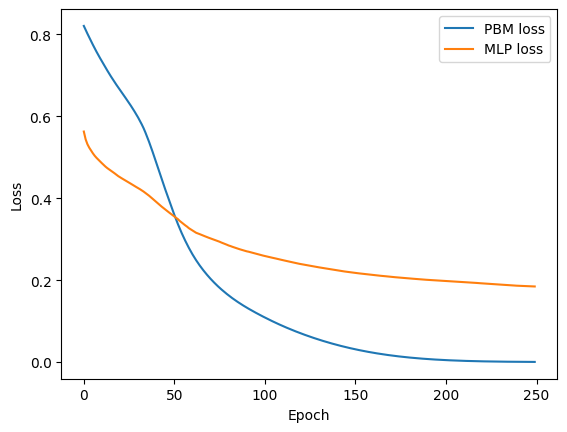

Accuracy (deep): 0.80
Joint: 81.58% (+/- 0.71%)


In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split

# train-test split: Hold out the test set for final model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
#print(y_train.shape)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores_joint = []
for train, test in kfold.split(X_train, y_train):
    # create model, train, and get accuracy
    lr_p = 0.00001
    lr_mlp = 0.00001
    alpha = 0.8
    model = Deep()
    acc = model_train(model, X_train[train], X_train[test],y_train[train], y_train[test], alpha, lr_p, lr_mlp)

    print("Accuracy (deep): %.2f" % acc)
    cv_scores_joint.append(acc)


# evaluate the model
joint_acc = np.mean(cv_scores_joint)
joint_std = np.std(cv_scores_joint)

print("Joint: %.2f%% (+/- %.2f%%)" % (joint_acc*100, joint_std*100))


Epoch: 0,loss p: 0.81960, loss joint: 0.63738
Epoch: 0, acc joint: 0.69398
Epoch: 1,loss p: 0.80949, loss joint: 0.65019
Epoch: 1, acc joint: 0.69793
Epoch: 2,loss p: 0.79975, loss joint: 0.65927
Epoch: 2, acc joint: 0.69497
Epoch: 3,loss p: 0.79020, loss joint: 0.66422
Epoch: 3, acc joint: 0.69497
Epoch: 4,loss p: 0.78088, loss joint: 0.66719
Epoch: 4, acc joint: 0.69694
Epoch: 5,loss p: 0.77196, loss joint: 0.66851
Epoch: 5, acc joint: 0.69102
Epoch: 6,loss p: 0.76337, loss joint: 0.66802
Epoch: 6, acc joint: 0.69299
Epoch: 7,loss p: 0.75503, loss joint: 0.66643
Epoch: 7, acc joint: 0.69398
Epoch: 8,loss p: 0.74684, loss joint: 0.66449
Epoch: 8, acc joint: 0.69793
Epoch: 9,loss p: 0.73877, loss joint: 0.66282
Epoch: 9, acc joint: 0.70089
Epoch: 10,loss p: 0.73086, loss joint: 0.66143
Epoch: 10, acc joint: 0.70385
Epoch: 11,loss p: 0.72311, loss joint: 0.65931
Epoch: 11, acc joint: 0.70681
Epoch: 12,loss p: 0.71557, loss joint: 0.65728
Epoch: 12, acc joint: 0.71076
Epoch: 13,loss p: 0

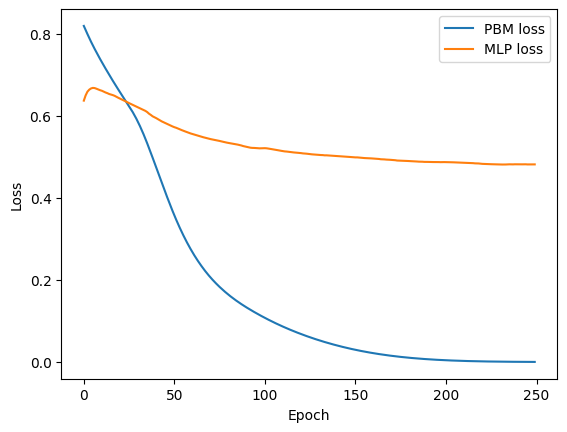

Accuracy (deep): 0.81
Epoch: 0,loss p: 0.88662, loss joint: 0.66011
Epoch: 0, acc joint: 0.62253
Epoch: 1,loss p: 0.88048, loss joint: 0.60967
Epoch: 1, acc joint: 0.62945
Epoch: 2,loss p: 0.87322, loss joint: 0.61027
Epoch: 2, acc joint: 0.66601
Epoch: 3,loss p: 0.86619, loss joint: 0.61690
Epoch: 3, acc joint: 0.66996
Epoch: 4,loss p: 0.85930, loss joint: 0.62272
Epoch: 4, acc joint: 0.66502
Epoch: 5,loss p: 0.85250, loss joint: 0.62611
Epoch: 5, acc joint: 0.66897
Epoch: 6,loss p: 0.84576, loss joint: 0.62737
Epoch: 6, acc joint: 0.66996
Epoch: 7,loss p: 0.83917, loss joint: 0.62904
Epoch: 7, acc joint: 0.67885
Epoch: 8,loss p: 0.83270, loss joint: 0.62999
Epoch: 8, acc joint: 0.68478
Epoch: 9,loss p: 0.82634, loss joint: 0.62961
Epoch: 9, acc joint: 0.68478
Epoch: 10,loss p: 0.82013, loss joint: 0.62843
Epoch: 10, acc joint: 0.68775
Epoch: 11,loss p: 0.81403, loss joint: 0.62713
Epoch: 11, acc joint: 0.69368
Epoch: 12,loss p: 0.80808, loss joint: 0.62425
Epoch: 12, acc joint: 0.695

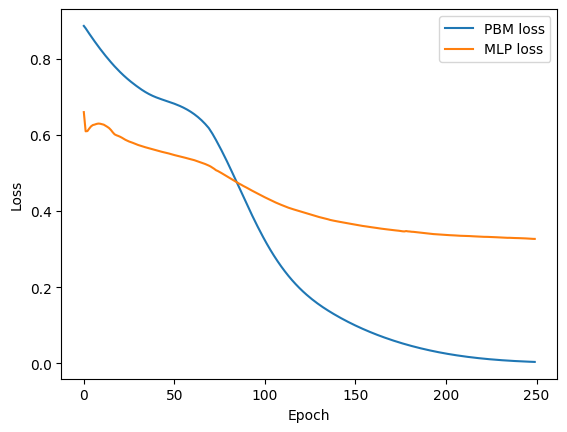

Accuracy (deep): 0.80
Epoch: 0,loss p: 0.81980, loss joint: 0.61243
Epoch: 0, acc joint: 0.68972
Epoch: 1,loss p: 0.80955, loss joint: 0.63302
Epoch: 1, acc joint: 0.70850
Epoch: 2,loss p: 0.79965, loss joint: 0.64373
Epoch: 2, acc joint: 0.70257
Epoch: 3,loss p: 0.78990, loss joint: 0.64873
Epoch: 3, acc joint: 0.70553
Epoch: 4,loss p: 0.78048, loss joint: 0.65005
Epoch: 4, acc joint: 0.70652
Epoch: 5,loss p: 0.77143, loss joint: 0.65059
Epoch: 5, acc joint: 0.70949
Epoch: 6,loss p: 0.76269, loss joint: 0.64981
Epoch: 6, acc joint: 0.71245
Epoch: 7,loss p: 0.75419, loss joint: 0.64811
Epoch: 7, acc joint: 0.71146
Epoch: 8,loss p: 0.74583, loss joint: 0.64518
Epoch: 8, acc joint: 0.71344
Epoch: 9,loss p: 0.73765, loss joint: 0.64213
Epoch: 9, acc joint: 0.71937
Epoch: 10,loss p: 0.72966, loss joint: 0.63880
Epoch: 10, acc joint: 0.72431
Epoch: 11,loss p: 0.72170, loss joint: 0.63627
Epoch: 11, acc joint: 0.72727
Epoch: 12,loss p: 0.71379, loss joint: 0.63419
Epoch: 12, acc joint: 0.728

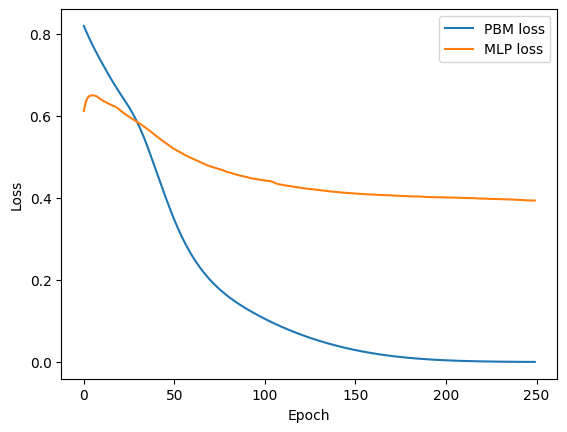

Accuracy (deep): 0.81
Epoch: 0,loss p: 0.81969, loss joint: 0.61942
Epoch: 0, acc joint: 0.71047
Epoch: 1,loss p: 0.80934, loss joint: 0.62254
Epoch: 1, acc joint: 0.72036
Epoch: 2,loss p: 0.79938, loss joint: 0.62384
Epoch: 2, acc joint: 0.72036
Epoch: 3,loss p: 0.78959, loss joint: 0.62292
Epoch: 3, acc joint: 0.71937
Epoch: 4,loss p: 0.78013, loss joint: 0.62153
Epoch: 4, acc joint: 0.72233
Epoch: 5,loss p: 0.77100, loss joint: 0.61937
Epoch: 5, acc joint: 0.72431
Epoch: 6,loss p: 0.76220, loss joint: 0.61691
Epoch: 6, acc joint: 0.72332
Epoch: 7,loss p: 0.75362, loss joint: 0.61431
Epoch: 7, acc joint: 0.72134
Epoch: 8,loss p: 0.74519, loss joint: 0.61150
Epoch: 8, acc joint: 0.72431
Epoch: 9,loss p: 0.73691, loss joint: 0.60843
Epoch: 9, acc joint: 0.72530
Epoch: 10,loss p: 0.72869, loss joint: 0.60561
Epoch: 10, acc joint: 0.72530
Epoch: 11,loss p: 0.72072, loss joint: 0.60328
Epoch: 11, acc joint: 0.73024
Epoch: 12,loss p: 0.71289, loss joint: 0.60098
Epoch: 12, acc joint: 0.730

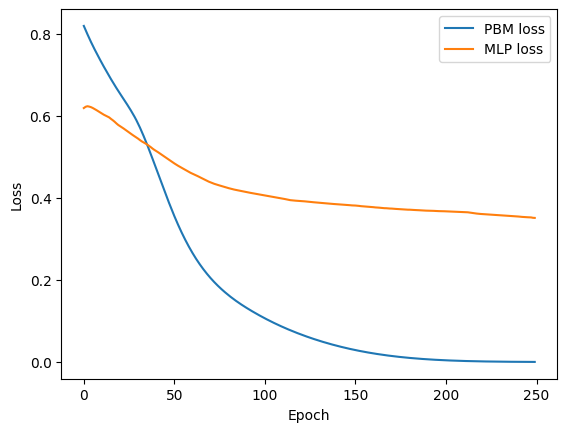

Accuracy (deep): 0.82
Epoch: 0,loss p: 0.81999, loss joint: 0.62332
Epoch: 0, acc joint: 0.69368
Epoch: 1,loss p: 0.80975, loss joint: 0.63032
Epoch: 1, acc joint: 0.70553
Epoch: 2,loss p: 0.79994, loss joint: 0.63397
Epoch: 2, acc joint: 0.70356
Epoch: 3,loss p: 0.79025, loss joint: 0.63507
Epoch: 3, acc joint: 0.70257
Epoch: 4,loss p: 0.78081, loss joint: 0.63481
Epoch: 4, acc joint: 0.70158
Epoch: 5,loss p: 0.77175, loss joint: 0.63384
Epoch: 5, acc joint: 0.70257
Epoch: 6,loss p: 0.76304, loss joint: 0.63187
Epoch: 6, acc joint: 0.70158
Epoch: 7,loss p: 0.75449, loss joint: 0.62928
Epoch: 7, acc joint: 0.70455
Epoch: 8,loss p: 0.74608, loss joint: 0.62632
Epoch: 8, acc joint: 0.70553
Epoch: 9,loss p: 0.73784, loss joint: 0.62299
Epoch: 9, acc joint: 0.70455
Epoch: 10,loss p: 0.72978, loss joint: 0.62011
Epoch: 10, acc joint: 0.70850
Epoch: 11,loss p: 0.72178, loss joint: 0.61848
Epoch: 11, acc joint: 0.70949
Epoch: 12,loss p: 0.71388, loss joint: 0.61723
Epoch: 12, acc joint: 0.708

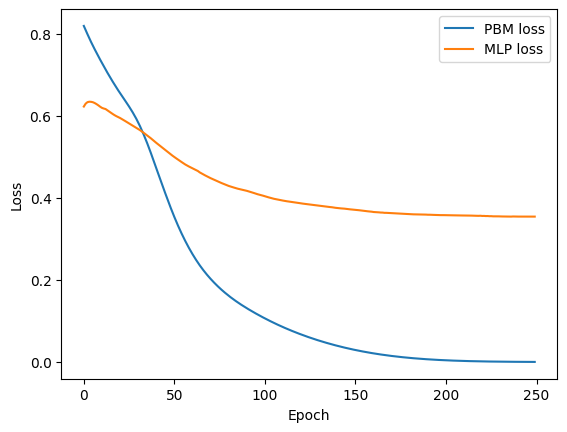

Accuracy (deep): 0.81
Joint: 80.89% (+/- 0.68%)


In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split

# train-test split: Hold out the test set for final model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
#print(y_train.shape)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores_joint = []
for train, test in kfold.split(X_train, y_train):
    # create model, train, and get accuracy
    lr_p = 0.00001
    lr_mlp = 0.00001
    alpha = 0.8
    model = Deep1()
    acc = model_train(model, X_train[train], X_train[test],y_train[train], y_train[test], alpha, lr_p, lr_mlp)

    print("Accuracy (deep): %.2f" % acc)
    cv_scores_joint.append(acc)


# evaluate the model
joint_acc = np.mean(cv_scores_joint)
joint_std = np.std(cv_scores_joint)

print("Joint: %.2f%% (+/- %.2f%%)" % (joint_acc*100, joint_std*100))


Epoch: 0,loss p: 0.83171, loss joint: 1.52665
Epoch: 0, acc joint: 0.47088
Epoch: 1,loss p: 0.80560, loss joint: 1.21802
Epoch: 1, acc joint: 0.45015
Epoch: 2,loss p: 0.78210, loss joint: 1.04821
Epoch: 2, acc joint: 0.43435
Epoch: 3,loss p: 0.76257, loss joint: 0.98441
Epoch: 3, acc joint: 0.47878
Epoch: 4,loss p: 0.74719, loss joint: 0.90494
Epoch: 4, acc joint: 0.58243
Epoch: 5,loss p: 0.73473, loss joint: 0.83743
Epoch: 5, acc joint: 0.63277
Epoch: 6,loss p: 0.72395, loss joint: 0.78936
Epoch: 6, acc joint: 0.66041
Epoch: 7,loss p: 0.71423, loss joint: 0.75500
Epoch: 7, acc joint: 0.67621
Epoch: 8,loss p: 0.70527, loss joint: 0.72946
Epoch: 8, acc joint: 0.68411
Epoch: 9,loss p: 0.69690, loss joint: 0.70989
Epoch: 9, acc joint: 0.68904
Epoch: 10,loss p: 0.68900, loss joint: 0.69446
Epoch: 10, acc joint: 0.69200
Epoch: 11,loss p: 0.68143, loss joint: 0.68175
Epoch: 11, acc joint: 0.69102
Epoch: 12,loss p: 0.67411, loss joint: 0.67104
Epoch: 12, acc joint: 0.69200
Epoch: 13,loss p: 0

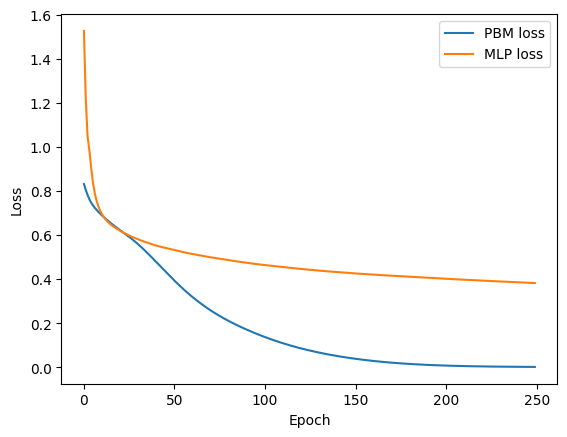

Accuracy (deep): 0.77
Epoch: 0,loss p: 1.00156, loss joint: 37.23718
Epoch: 0, acc joint: 0.50494
Epoch: 1,loss p: 0.94260, loss joint: 25.63000
Epoch: 1, acc joint: 0.51581
Epoch: 2,loss p: 0.88081, loss joint: 21.79388
Epoch: 2, acc joint: 0.55929
Epoch: 3,loss p: 0.82430, loss joint: 2.58140
Epoch: 3, acc joint: 0.61957
Epoch: 4,loss p: 0.78787, loss joint: 0.86262
Epoch: 4, acc joint: 0.61067
Epoch: 5,loss p: 0.77905, loss joint: 0.82066
Epoch: 5, acc joint: 0.61759
Epoch: 6,loss p: 0.77099, loss joint: 0.78935
Epoch: 6, acc joint: 0.62945
Epoch: 7,loss p: 0.76373, loss joint: 0.76353
Epoch: 7, acc joint: 0.64229
Epoch: 8,loss p: 0.75712, loss joint: 0.74176
Epoch: 8, acc joint: 0.64229
Epoch: 9,loss p: 0.75103, loss joint: 0.72327
Epoch: 9, acc joint: 0.64328
Epoch: 10,loss p: 0.74534, loss joint: 0.70710
Epoch: 10, acc joint: 0.64822
Epoch: 11,loss p: 0.73997, loss joint: 0.69337
Epoch: 11, acc joint: 0.65119
Epoch: 12,loss p: 0.73479, loss joint: 0.68178
Epoch: 12, acc joint: 0.

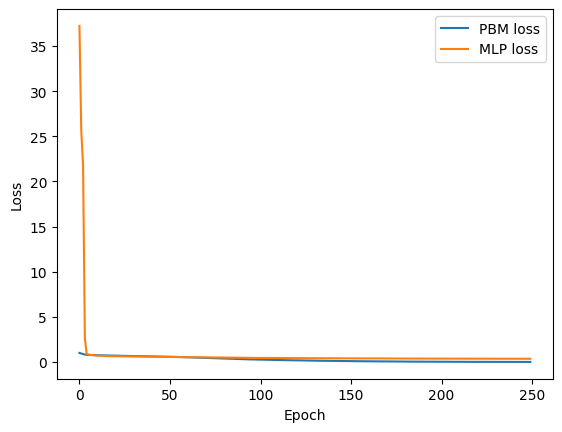

Accuracy (deep): 0.79
Epoch: 0,loss p: 0.98023, loss joint: 0.85459
Epoch: 0, acc joint: 0.43478
Epoch: 1,loss p: 0.95668, loss joint: 0.83231
Epoch: 1, acc joint: 0.53360
Epoch: 2,loss p: 0.94083, loss joint: 0.79570
Epoch: 2, acc joint: 0.56522
Epoch: 3,loss p: 0.92690, loss joint: 0.75338
Epoch: 3, acc joint: 0.59190
Epoch: 4,loss p: 0.91375, loss joint: 0.72239
Epoch: 4, acc joint: 0.60474
Epoch: 5,loss p: 0.90110, loss joint: 0.70042
Epoch: 5, acc joint: 0.62055
Epoch: 6,loss p: 0.88887, loss joint: 0.68435
Epoch: 6, acc joint: 0.63142
Epoch: 7,loss p: 0.87697, loss joint: 0.67204
Epoch: 7, acc joint: 0.64229
Epoch: 8,loss p: 0.86544, loss joint: 0.66187
Epoch: 8, acc joint: 0.66008
Epoch: 9,loss p: 0.85428, loss joint: 0.65304
Epoch: 9, acc joint: 0.66798
Epoch: 10,loss p: 0.84350, loss joint: 0.64534
Epoch: 10, acc joint: 0.67589
Epoch: 11,loss p: 0.83310, loss joint: 0.63817
Epoch: 11, acc joint: 0.68281
Epoch: 12,loss p: 0.82308, loss joint: 0.63151
Epoch: 12, acc joint: 0.690

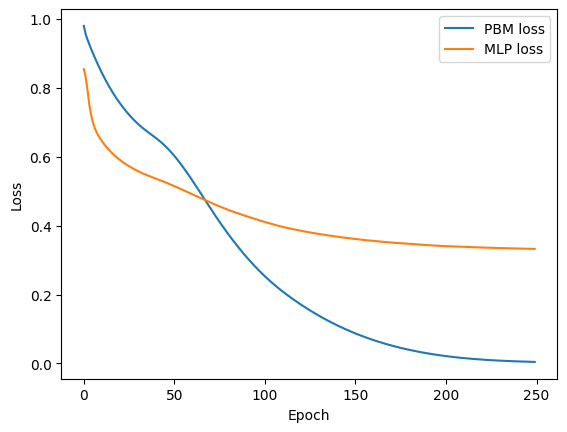

Accuracy (deep): 0.80
Epoch: 0,loss p: 0.97970, loss joint: 1.07601
Epoch: 0, acc joint: 0.44565
Epoch: 1,loss p: 0.95696, loss joint: 0.94462
Epoch: 1, acc joint: 0.53162
Epoch: 2,loss p: 0.94157, loss joint: 0.87006
Epoch: 2, acc joint: 0.55138
Epoch: 3,loss p: 0.92805, loss joint: 0.80641
Epoch: 3, acc joint: 0.58399
Epoch: 4,loss p: 0.91530, loss joint: 0.75690
Epoch: 4, acc joint: 0.60079
Epoch: 5,loss p: 0.90299, loss joint: 0.71948
Epoch: 5, acc joint: 0.63241
Epoch: 6,loss p: 0.89103, loss joint: 0.69052
Epoch: 6, acc joint: 0.64921
Epoch: 7,loss p: 0.87938, loss joint: 0.66791
Epoch: 7, acc joint: 0.65909
Epoch: 8,loss p: 0.86805, loss joint: 0.64982
Epoch: 8, acc joint: 0.66403
Epoch: 9,loss p: 0.85705, loss joint: 0.63503
Epoch: 9, acc joint: 0.67095
Epoch: 10,loss p: 0.84640, loss joint: 0.62267
Epoch: 10, acc joint: 0.67885
Epoch: 11,loss p: 0.83609, loss joint: 0.61190
Epoch: 11, acc joint: 0.68182
Epoch: 12,loss p: 0.82613, loss joint: 0.60266
Epoch: 12, acc joint: 0.686

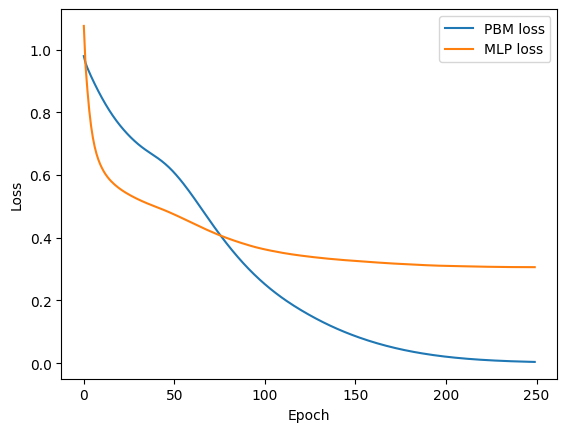

Accuracy (deep): 0.79
Epoch: 0,loss p: 0.97973, loss joint: 0.95265
Epoch: 0, acc joint: 0.40119
Epoch: 1,loss p: 0.95707, loss joint: 0.86286
Epoch: 1, acc joint: 0.48320
Epoch: 2,loss p: 0.94134, loss joint: 0.80719
Epoch: 2, acc joint: 0.52174
Epoch: 3,loss p: 0.92754, loss joint: 0.75448
Epoch: 3, acc joint: 0.58004
Epoch: 4,loss p: 0.91454, loss joint: 0.71513
Epoch: 4, acc joint: 0.61364
Epoch: 5,loss p: 0.90206, loss joint: 0.68626
Epoch: 5, acc joint: 0.64032
Epoch: 6,loss p: 0.88995, loss joint: 0.66413
Epoch: 6, acc joint: 0.65119
Epoch: 7,loss p: 0.87816, loss joint: 0.64682
Epoch: 7, acc joint: 0.66008
Epoch: 8,loss p: 0.86671, loss joint: 0.63279
Epoch: 8, acc joint: 0.67194
Epoch: 9,loss p: 0.85560, loss joint: 0.62120
Epoch: 9, acc joint: 0.68083
Epoch: 10,loss p: 0.84483, loss joint: 0.61128
Epoch: 10, acc joint: 0.69466
Epoch: 11,loss p: 0.83443, loss joint: 0.60247
Epoch: 11, acc joint: 0.69862
Epoch: 12,loss p: 0.82439, loss joint: 0.59464
Epoch: 12, acc joint: 0.705

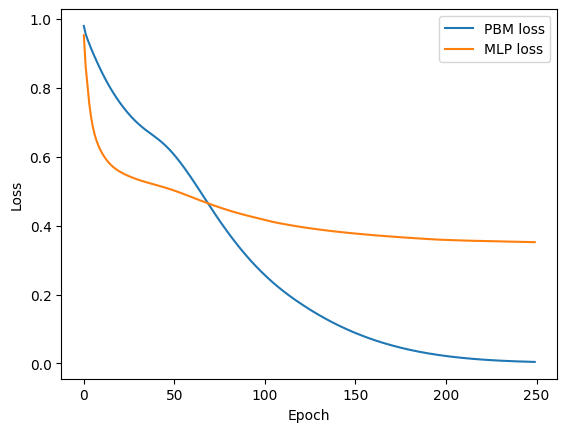

Accuracy (deep): 0.81
Joint: 79.31% (+/- 1.32%)


In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split

# train-test split: Hold out the test set for final model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
#print(y_train.shape)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores_joint = []
for train, test in kfold.split(X_train, y_train):
    # create model, train, and get accuracy
    lr_p = 0.00001
    lr_mlp = 0.00001
    alpha = 0.8
    model = Wide()
    acc = model_train(model, X_train[train], X_train[test],y_train[train], y_train[test], alpha, lr_p, lr_mlp)

    print("Accuracy (deep): %.2f" % acc)
    cv_scores_joint.append(acc)


# evaluate the model
joint_acc = np.mean(cv_scores_joint)
joint_std = np.std(cv_scores_joint)

print("Joint: %.2f%% (+/- %.2f%%)" % (joint_acc*100, joint_std*100))
